In [1]:
import sys
import os
import itertools
current_dir = os.getcwd()
print(current_dir)

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all


In [2]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['../../../../UCB-USACE-LSTMs', '/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all', '/Users/canruso/Desktop', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python310.zip', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/lib-dynload', '', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/site-packages', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/site-packages/setuptools/_vendor']


In [3]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot

In [4]:
# Dynamically find the repo root from the current working directory
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

# Construct the target path
target_path = os.path.join(library_path, 'UCB_training', 'models', 'hopland_all')

# Verify if the directory exists before changing
if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("hopland")) #each basin has its own train basin file, so change for different basins e.g "guerneville", etc.
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all
Train Basin File Exists: True


In [5]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("hopland_gage_nlayers.yaml") #update the yaml file for different basins
path_to_physics_data = Path(library_path + "/russian_river_data/Hopland_daily.csv")

In [6]:
features_with_physics = [
    #from daily.csv
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    #from hopland.csv
    'Hopland Gage FLOW',
    'Russian 60 ET-POTENTIAL',
    'Russian 60 FLOW',
    'Russian 60 FLOW-BASE',
    'Russian 60 INFILTRATION',
    'Russian 60 PERC-SOIL',
    'Russian 60 SATURATION FRACTION',
    'Russian 70 ET-POTENTIAL',
    'Russian 70 FLOW',
    'Russian 70 FLOW-BASE',
    'Russian 70 INFILTRATION',
    'Russian 70 PERC-SOIL',
    'Russian 70 SATURATION FRACTION',
    'WF Russian ET-POTENTIAL',
    'WF Russian FLOW',
    'WF Russian FLOW-BASE',
    'WF Russian INFILTRATION',
    'WF Russian PERC-SOIL',
    'WF Russian SATURATION FRACTION',
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    #"Lake Mendocino Storage",    
]

In [7]:
hyperparam_space = {
    "hidden_size": [128, 256],
    "seq_length": [90, 180],
    "num_layers": [1, 2],
    "epochs": [16, 32]
}
fixed_dropout = 0.4
no_physics_results = []
physics_results = []

NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:04:28,819: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210428/output.log initialized.
2025-02-12 21:04:28,822: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210428
2025-02-12 21:04:28,822: ### Run configurations for testing_run
2025-02-12 21:04:28,822: experiment_name: testing_run
2025-02-12 21:04:28,823: train_basin_file: hopland
2025-02-12 21:04:28,823: validation_basin_file: hopland
2025-02-12 21:04:28,823: test_basin_file: hopland
2025-02-12 21:04:28,824: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:04:28,824: train_end_date: 2002-09-30 00:00:00
2025-02-12 21:04:28,824: validation_start_date: 2002-10-01 00:00:00
2025-02-12 21:04:28,824: validation_end_date: 2005-09-30 00:00:00
2025-02-12 21:04:28,

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]
2025-02-12 21:04:56,046: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210428/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:04:56,047: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210428/validation/model_epoch016/validation_results.p
got predictions


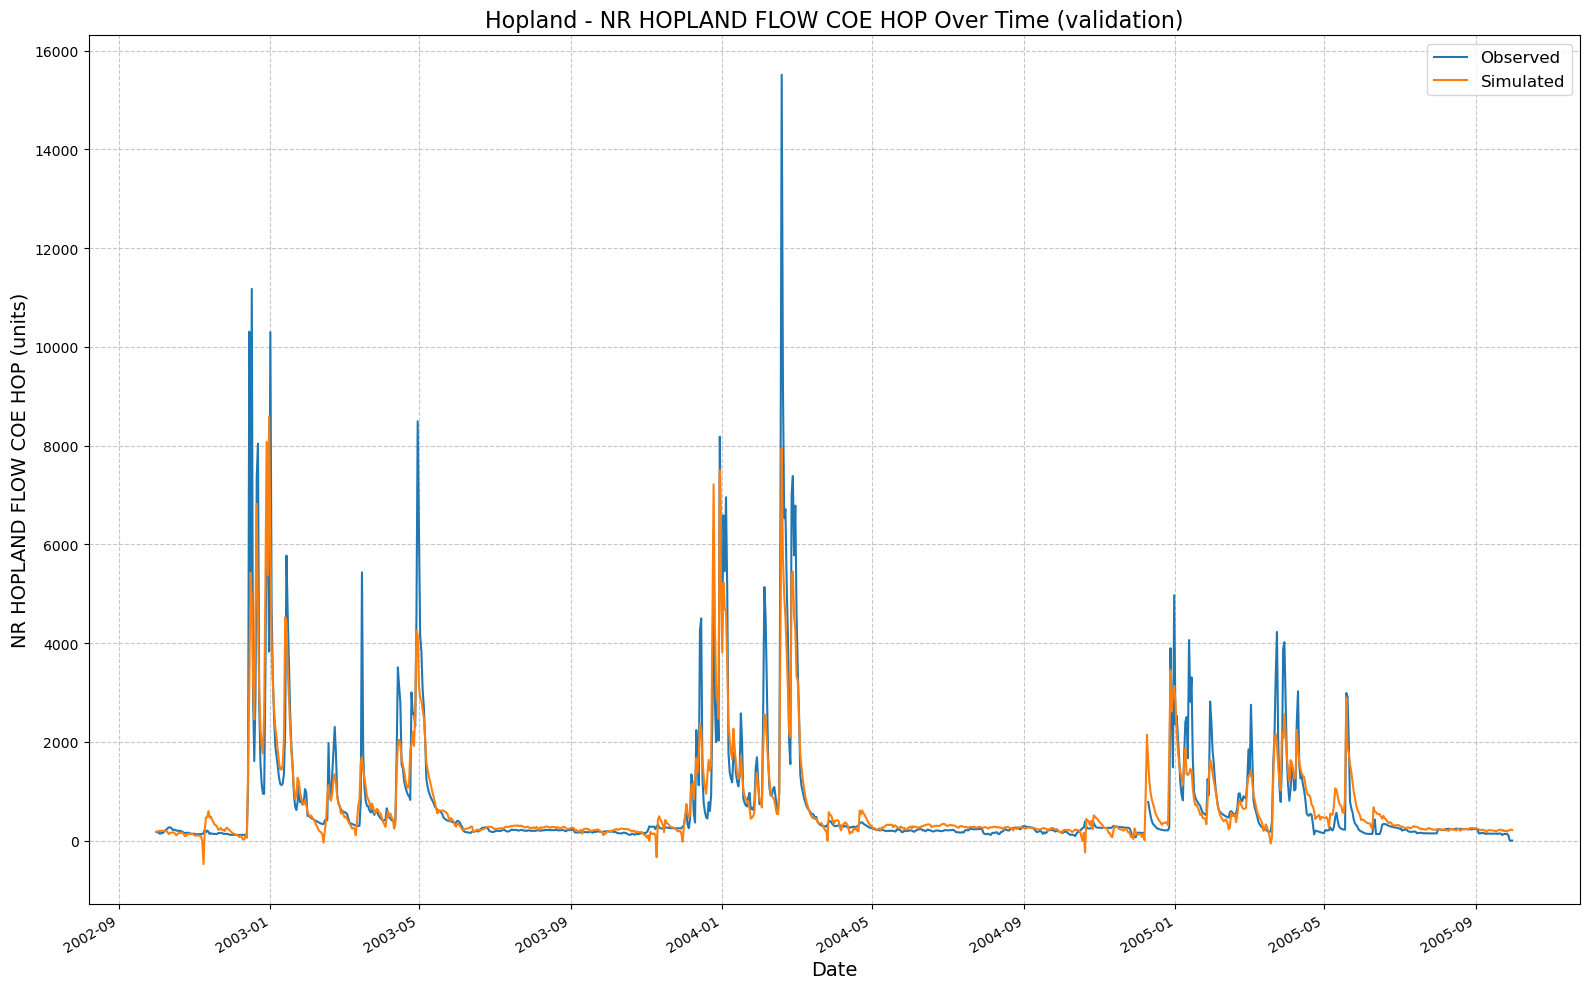

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210428/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:04:56,301: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210456/output.log initialized.
2025-02-12 21:04:56,301: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210456
2025-02-12 21:04:56,301: ### Run configurations for testing_run
2025-02-12 21:04:56,302: experiment_name: testing_run
2025-02-12 21:04:56,302: train_basin_file: hopland
2025-02-12 21:04:56,302: validation_basin_file: hopland
2025-02-12 21:04:56,303: test_basin_file: hopland
2025-02-12 21:04:56,303: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:04:56,304: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  9.55it/s]
2025-02-12 21:04:56,439: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 990.16it/s]
2025-02-12 21:04:56,446: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.23it/s, Loss: 0.0000]
2025-02-12 21:04:58,390: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  8.36it/s, Loss: 0.0000]
2025-02-12 21:04:59,712: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  8.58it/s, Loss: 0.0000]
2025-02-12 21:05:00,997: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  8.64it/s, Loss: 0.0000]
2025-02-12 21:05:02,273: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  8.06it/s, Loss: 0.0000]
2025-02-12 21:05:03,642: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]
2025-02-12 21:05:42,459: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210456/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:05:42,460: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210456/validation/model_epoch032/validation_results.p
got predictions


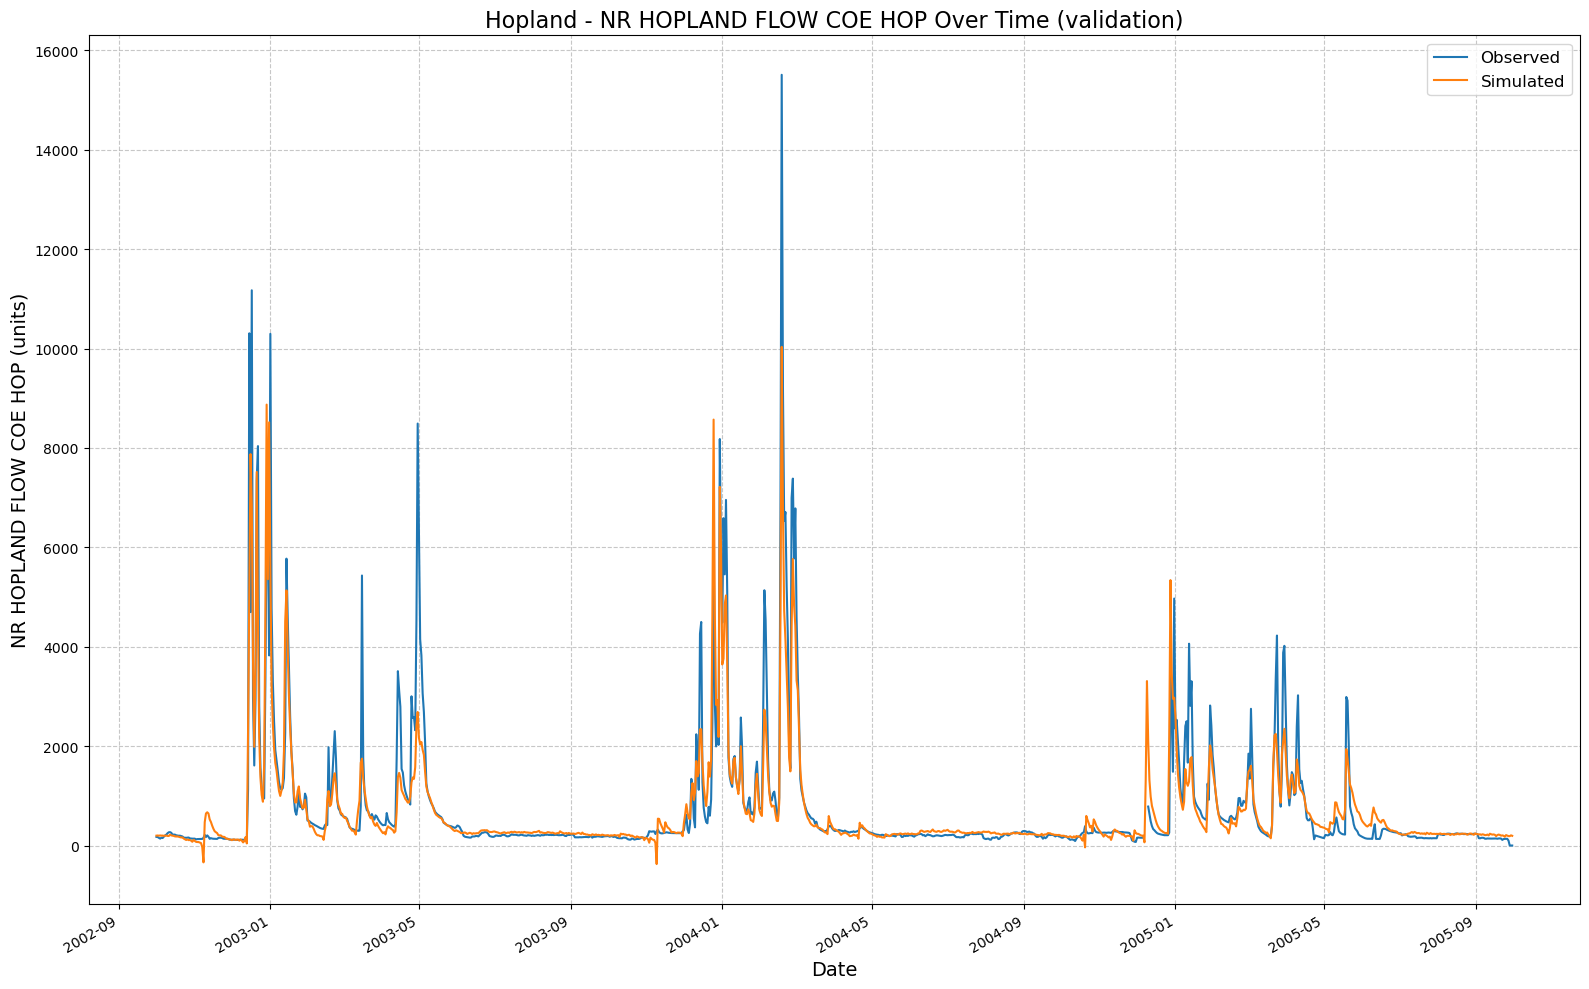

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210456/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:05:42,702: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210542/output.log initialized.
2025-02-12 21:05:42,702: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210542
2025-02-12 21:05:42,702: ### Run configurations for testing_run
2025-02-12 21:05:42,703: experiment_name: testing_run
2025-02-12 21:05:42,703: train_basin_file: hopland
2025-02-12 21:05:42,703: validation_basin_file: hopland
2025-02-12 21:05:42,704: test_basin_file: hopland
2025-02-12 21:05:42,705: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:05:42,706: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.14it/s]
2025-02-12 21:05:42,821: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1255.03it/s]
2025-02-12 21:05:42,826: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  8.79it/s, Loss: 0.0000]
2025-02-12 21:05:44,208: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  8.70it/s, Loss: 0.0000]
2025-02-12 21:05:45,474: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.96it/s, Loss: 0.0000]
2025-02-12 21:05:47,057: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  8.53it/s, Loss: 0.0000]
2025-02-12 21:05:48,349: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 12.80it/s, Loss: 0.0000]
2025-02-12 21:05:49,210: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]
2025-02-12 21:06:00,880: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210542/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:06:00,881: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210542/validation/model_epoch016/validation_results.p
got predictions


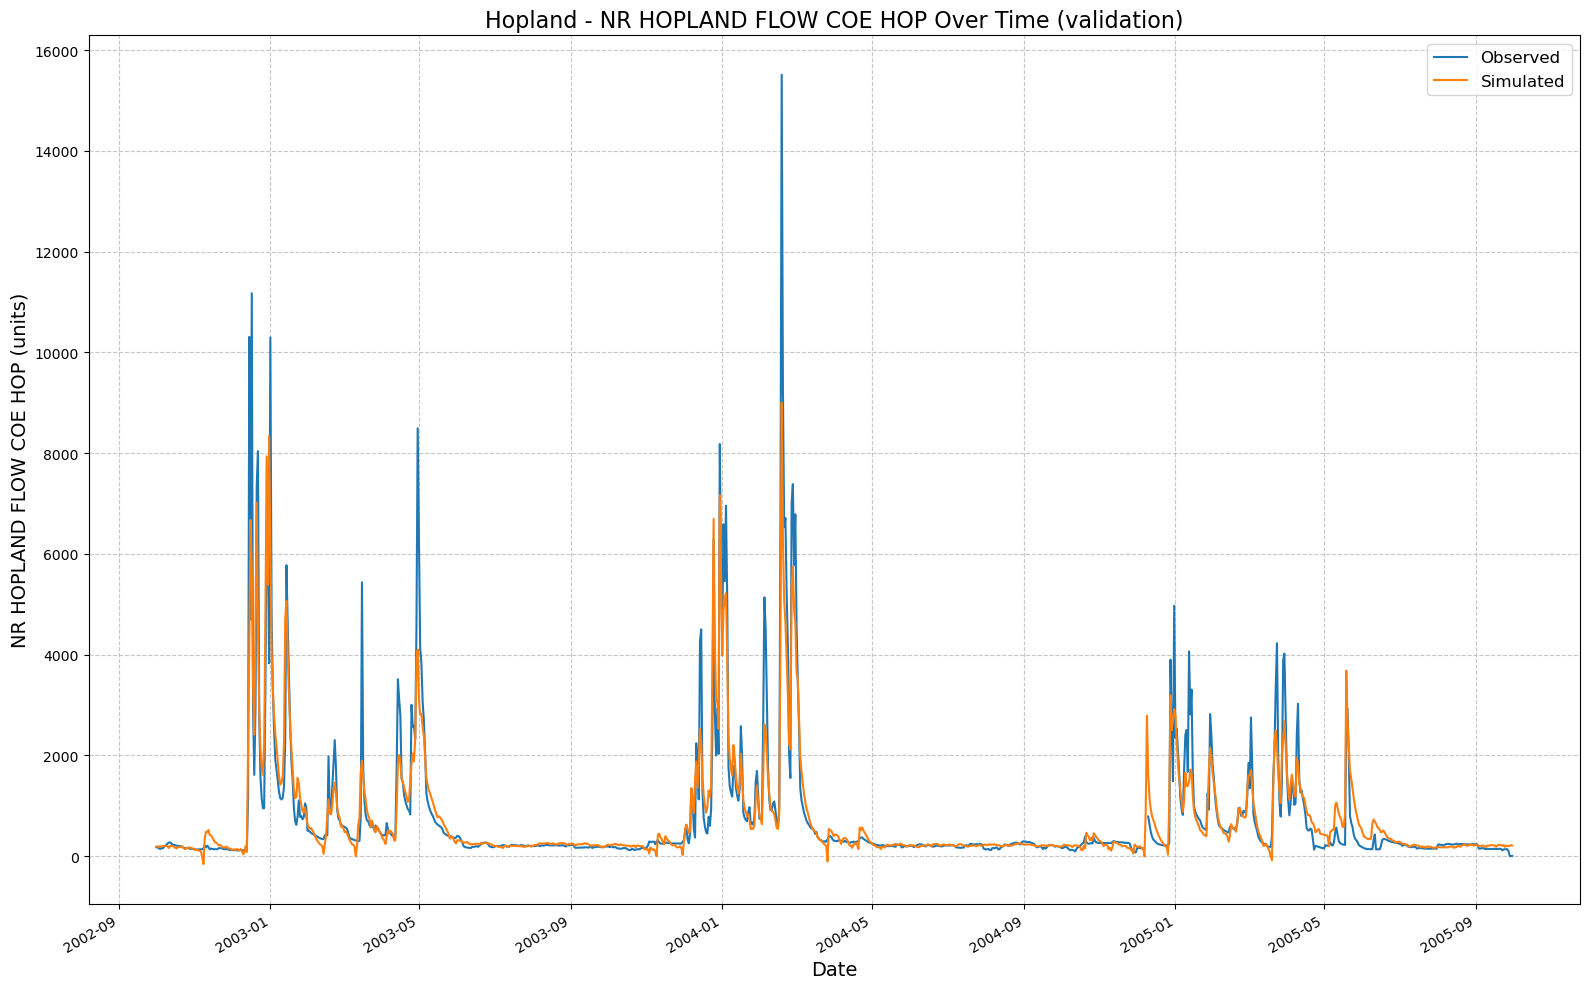

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210542/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:06:01,080: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210601/output.log initialized.
2025-02-12 21:06:01,080: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210601
2025-02-12 21:06:01,080: ### Run configurations for testing_run
2025-02-12 21:06:01,081: experiment_name: testing_run
2025-02-12 21:06:01,081: train_basin_file: hopland
2025-02-12 21:06:01,081: validation_basin_file: hopland
2025-02-12 21:06:01,081: test_basin_file: hopland
2025-02-12 21:06:01,082: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:06:01,082: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 12.47it/s]
2025-02-12 21:06:01,178: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1253.53it/s]
2025-02-12 21:06:01,182: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 12.70it/s, Loss: 0.0000]
2025-02-12 21:06:02,139: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00, 10.73it/s, Loss: 0.0000]
2025-02-12 21:06:03,167: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 11.62it/s, Loss: 0.0000]
2025-02-12 21:06:04,115: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00, 10.98it/s, Loss: 0.0000]
2025-02-12 21:06:05,120: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 12.14it/s, Loss: 0.0000]
2025-02-12 21:06:06,028: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]
2025-02-12 21:06:36,659: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210601/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:06:36,659: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210601/validation/model_epoch032/validation_results.p
got predictions


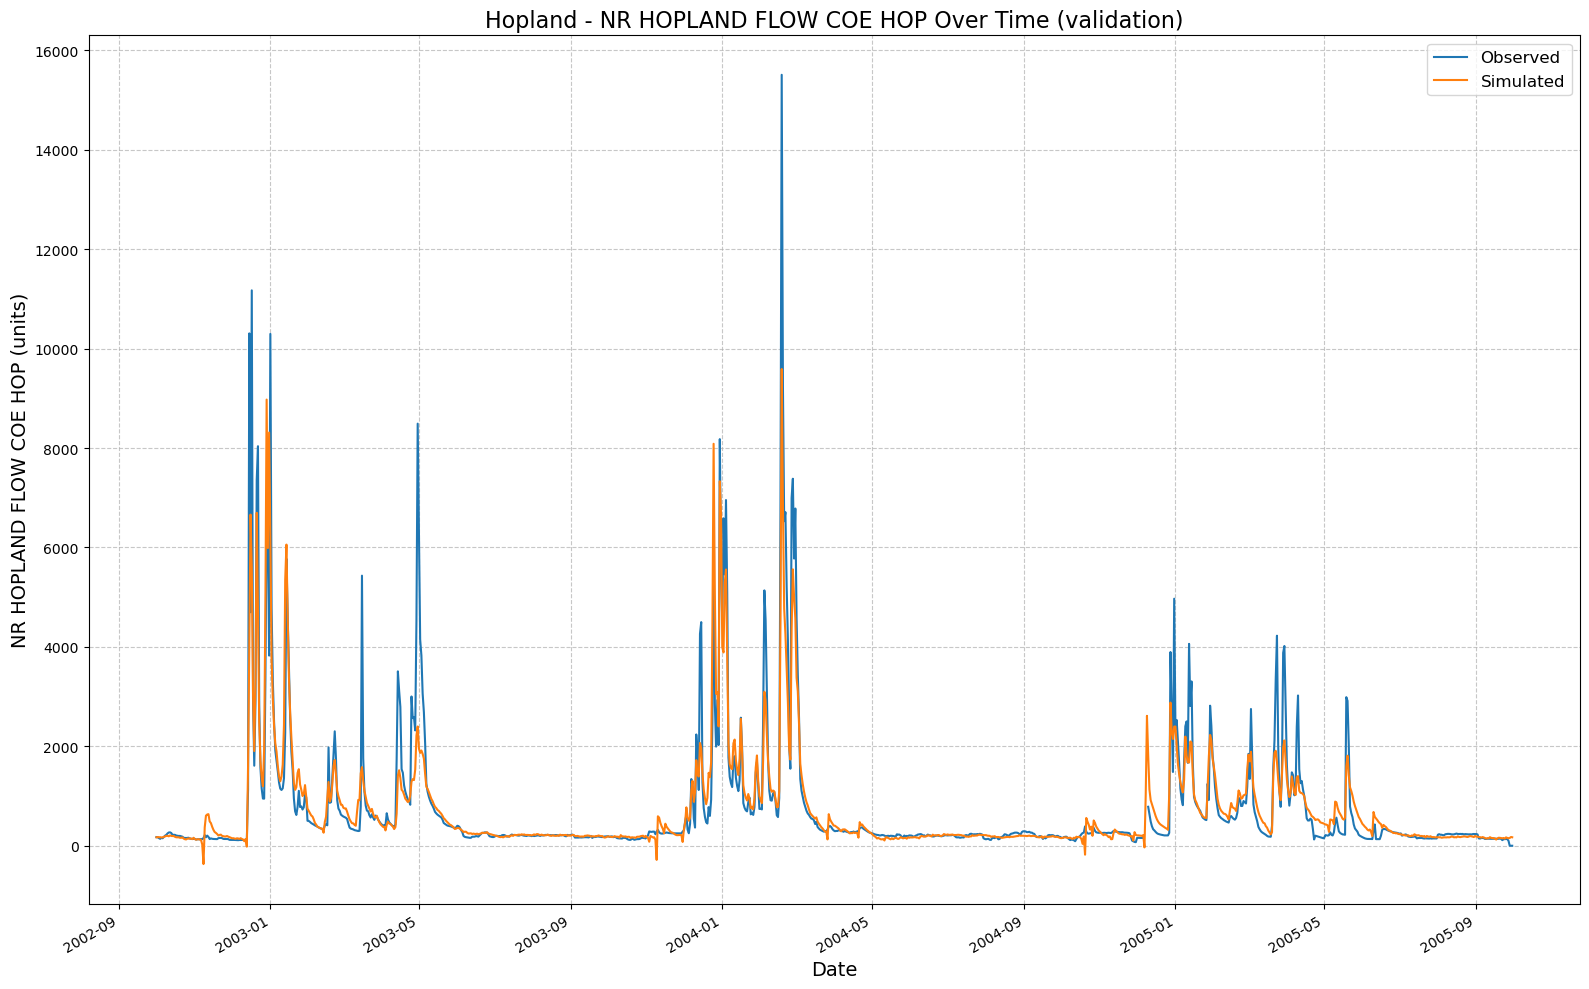

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210601/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:06:37,006: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210637/output.log initialized.
2025-02-12 21:06:37,006: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210637
2025-02-12 21:06:37,007: ### Run configurations for testing_run
2025-02-12 21:06:37,007: experiment_name: testing_run
2025-02-12 21:06:37,007: train_basin_file: hopland
2025-02-12 21:06:37,007: validation_basin_file: hopland
2025-02-12 21:06:37,007: test_basin_file: hopland
2025-02-12 21:06:37,008: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:06:37,008: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 13.07it/s]
2025-02-12 21:06:37,098: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1645.47it/s]
2025-02-12 21:06:37,103: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.14it/s, Loss: 0.0000]
2025-02-12 21:06:39,010: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.52it/s, Loss: 0.0000]
2025-02-12 21:06:40,699: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.62it/s, Loss: 0.0000]
2025-02-12 21:06:42,363: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  7.00it/s, Loss: 0.0000]
2025-02-12 21:06:43,937: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  7.04it/s, Loss: 0.0000]
2025-02-12 21:06:45,502: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]
2025-02-12 21:07:06,649: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210637/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:07:06,649: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210637/validation/model_epoch016/validation_results.p
got predictions


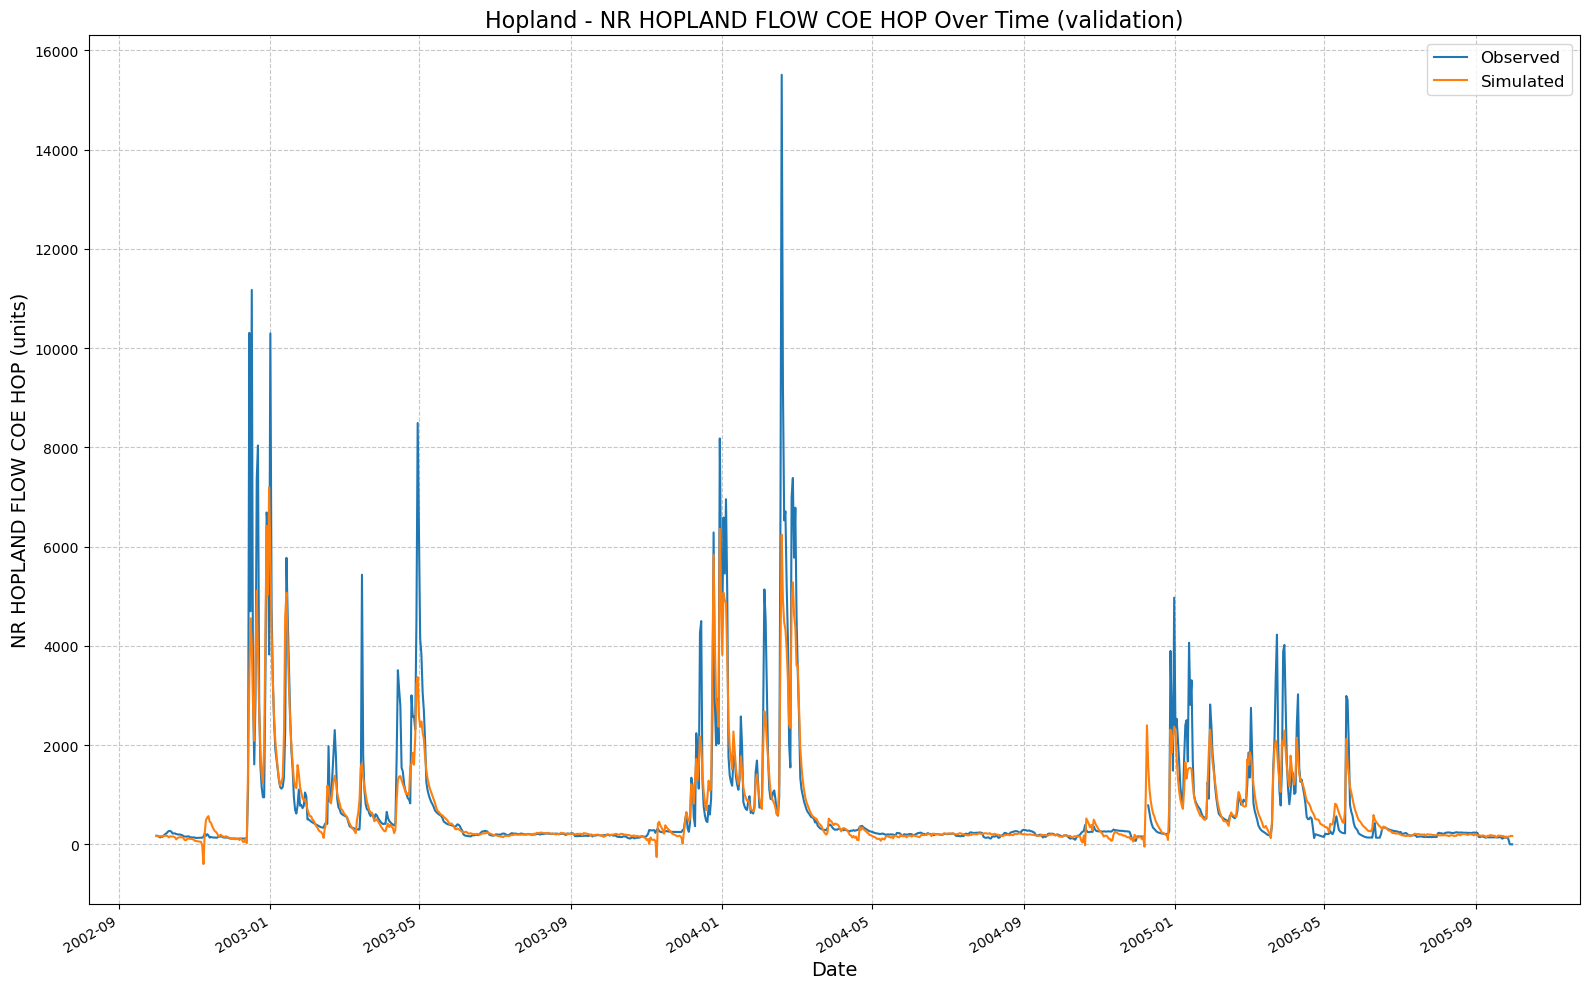

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210637/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:07:06,833: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210706/output.log initialized.
2025-02-12 21:07:06,833: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210706
2025-02-12 21:07:06,834: ### Run configurations for testing_run
2025-02-12 21:07:06,834: experiment_name: testing_run
2025-02-12 21:07:06,834: train_basin_file: hopland
2025-02-12 21:07:06,834: validation_basin_file: hopland
2025-02-12 21:07:06,835: test_basin_file: hopland
2025-02-12 21:07:06,835: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:07:06,835: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 11.01it/s]
2025-02-12 21:07:06,946: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 638.99it/s]
2025-02-12 21:07:06,953: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.69it/s, Loss: 0.0000]
2025-02-12 21:07:08,738: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  7.07it/s, Loss: 0.0000]
2025-02-12 21:07:10,296: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.75it/s, Loss: 0.0000]
2025-02-12 21:07:11,927: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  7.03it/s, Loss: 0.0000]
2025-02-12 21:07:13,495: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.43it/s, Loss: 0.0000]
2025-02-12 21:07:15,208: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]
2025-02-12 21:08:02,329: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210706/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:08:02,330: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210706/validation/model_epoch032/validation_results.p
got predictions


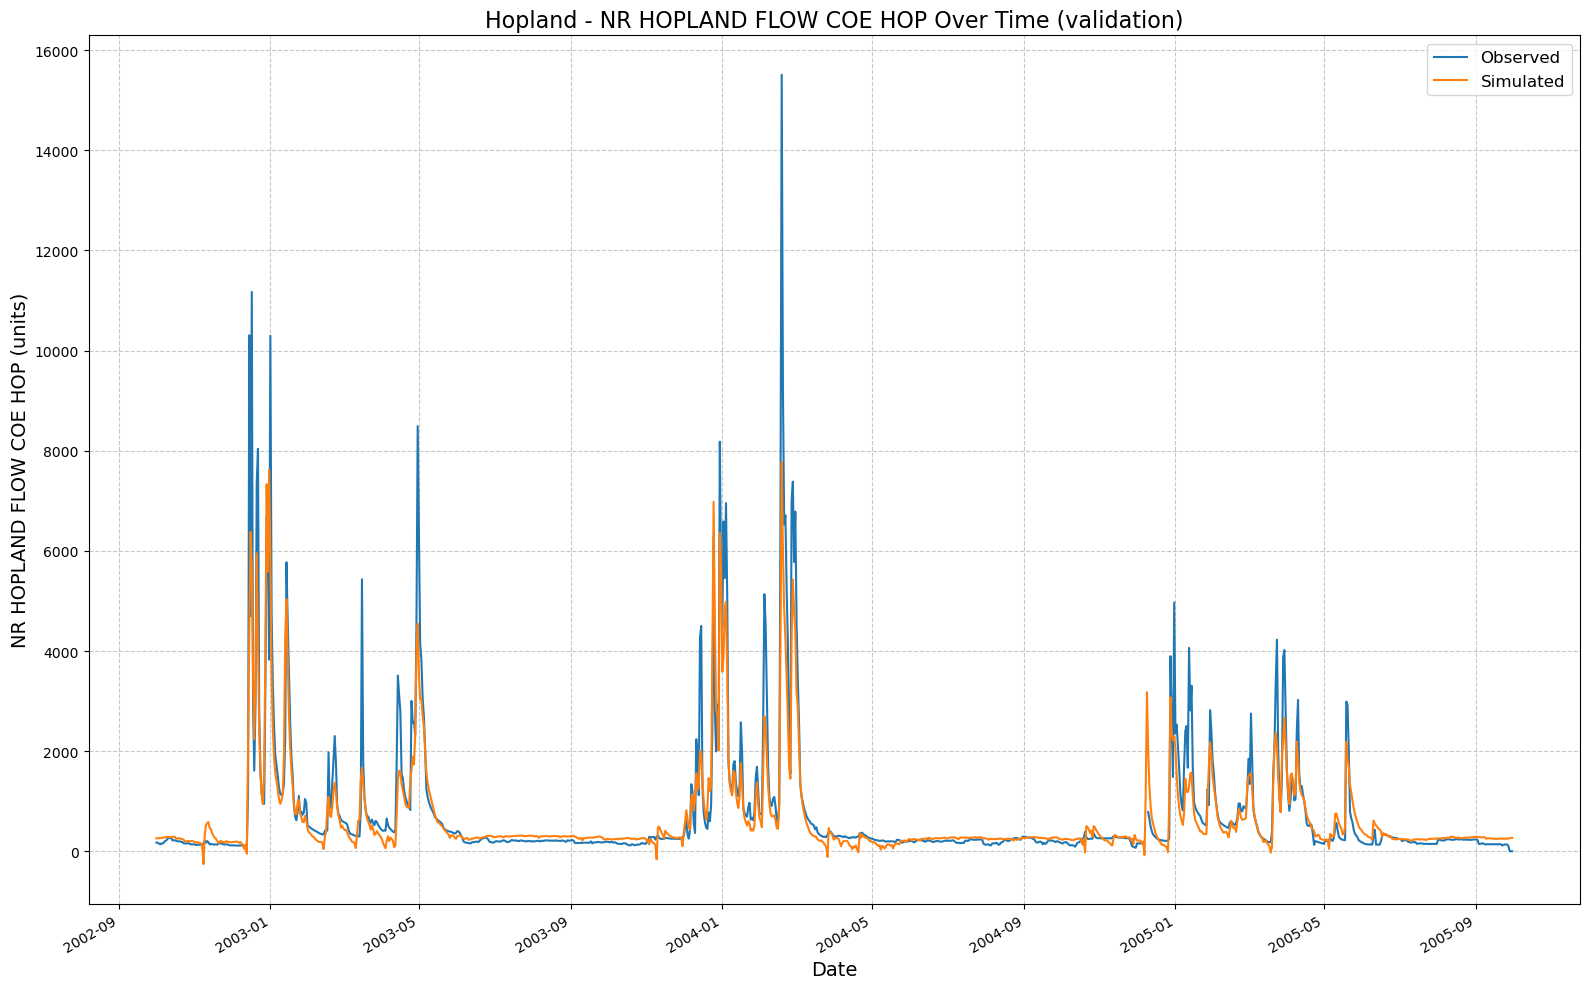

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210706/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:08:02,520: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210802/output.log initialized.
2025-02-12 21:08:02,521: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210802
2025-02-12 21:08:02,521: ### Run configurations for testing_run
2025-02-12 21:08:02,521: experiment_name: testing_run
2025-02-12 21:08:02,522: train_basin_file: hopland
2025-02-12 21:08:02,522: validation_basin_file: hopland
2025-02-12 21:08:02,523: test_basin_file: hopland
2025-02-12 21:08:02,523: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:08:02,523: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 11.96it/s]
2025-02-12 21:08:02,628: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1792.44it/s]
2025-02-12 21:08:02,632: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.60it/s, Loss: 0.0000]
2025-02-12 21:08:04,406: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.90it/s, Loss: 0.0000]
2025-02-12 21:08:06,001: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  7.07it/s, Loss: 0.0000]
2025-02-12 21:08:07,559: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  7.05it/s, Loss: 0.0000]
2025-02-12 21:08:09,121: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.77it/s, Loss: 0.0000]
2025-02-12 21:08:10,747: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]
2025-02-12 21:08:30,612: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210802/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:08:30,613: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210802/validation/model_epoch016/validation_results.p
got predictions


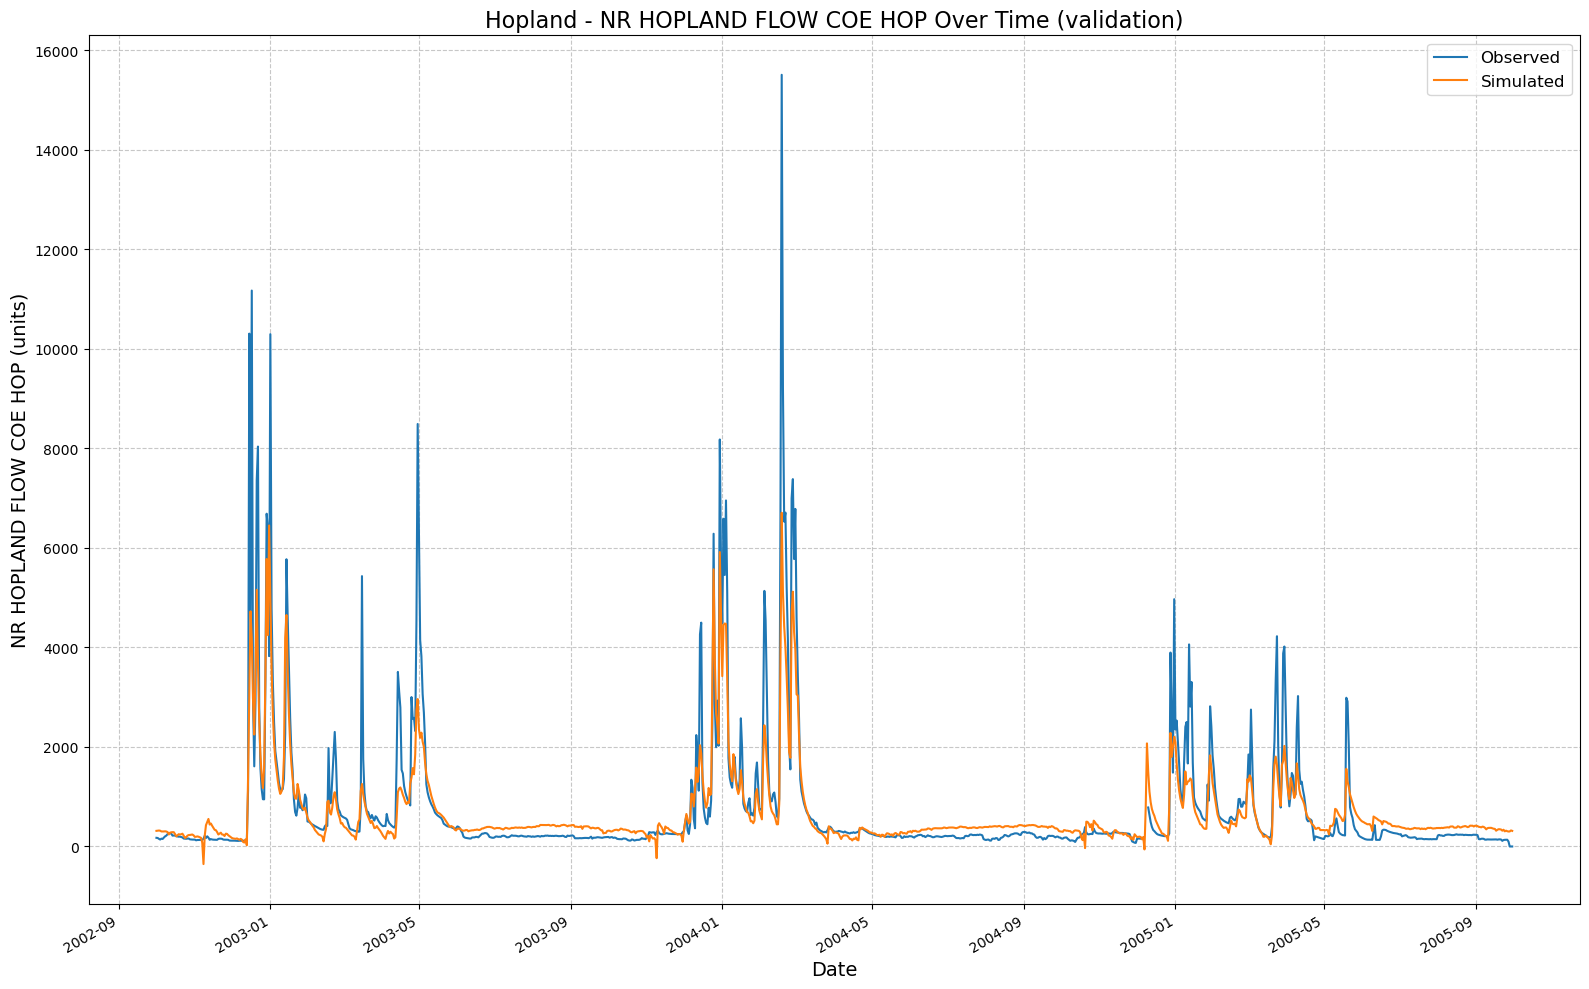

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210802/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:08:30,795: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210830/output.log initialized.
2025-02-12 21:08:30,795: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210830
2025-02-12 21:08:30,796: ### Run configurations for testing_run
2025-02-12 21:08:30,796: experiment_name: testing_run
2025-02-12 21:08:30,796: train_basin_file: hopland
2025-02-12 21:08:30,797: validation_basin_file: hopland
2025-02-12 21:08:30,797: test_basin_file: hopland
2025-02-12 21:08:30,797: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:08:30,798: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 13.22it/s]
2025-02-12 21:08:30,889: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1501.18it/s]
2025-02-12 21:08:30,893: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.87it/s, Loss: 0.0000]
2025-02-12 21:08:32,596: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.97it/s, Loss: 0.0000]
2025-02-12 21:08:34,176: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.99it/s, Loss: 0.0000]
2025-02-12 21:08:35,753: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  7.05it/s, Loss: 0.0000]
2025-02-12 21:08:37,316: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  7.00it/s, Loss: 0.0000]
2025-02-12 21:08:38,889: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]
2025-02-12 21:09:26,285: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210830/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:09:26,286: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210830/validation/model_epoch032/validation_results.p
got predictions


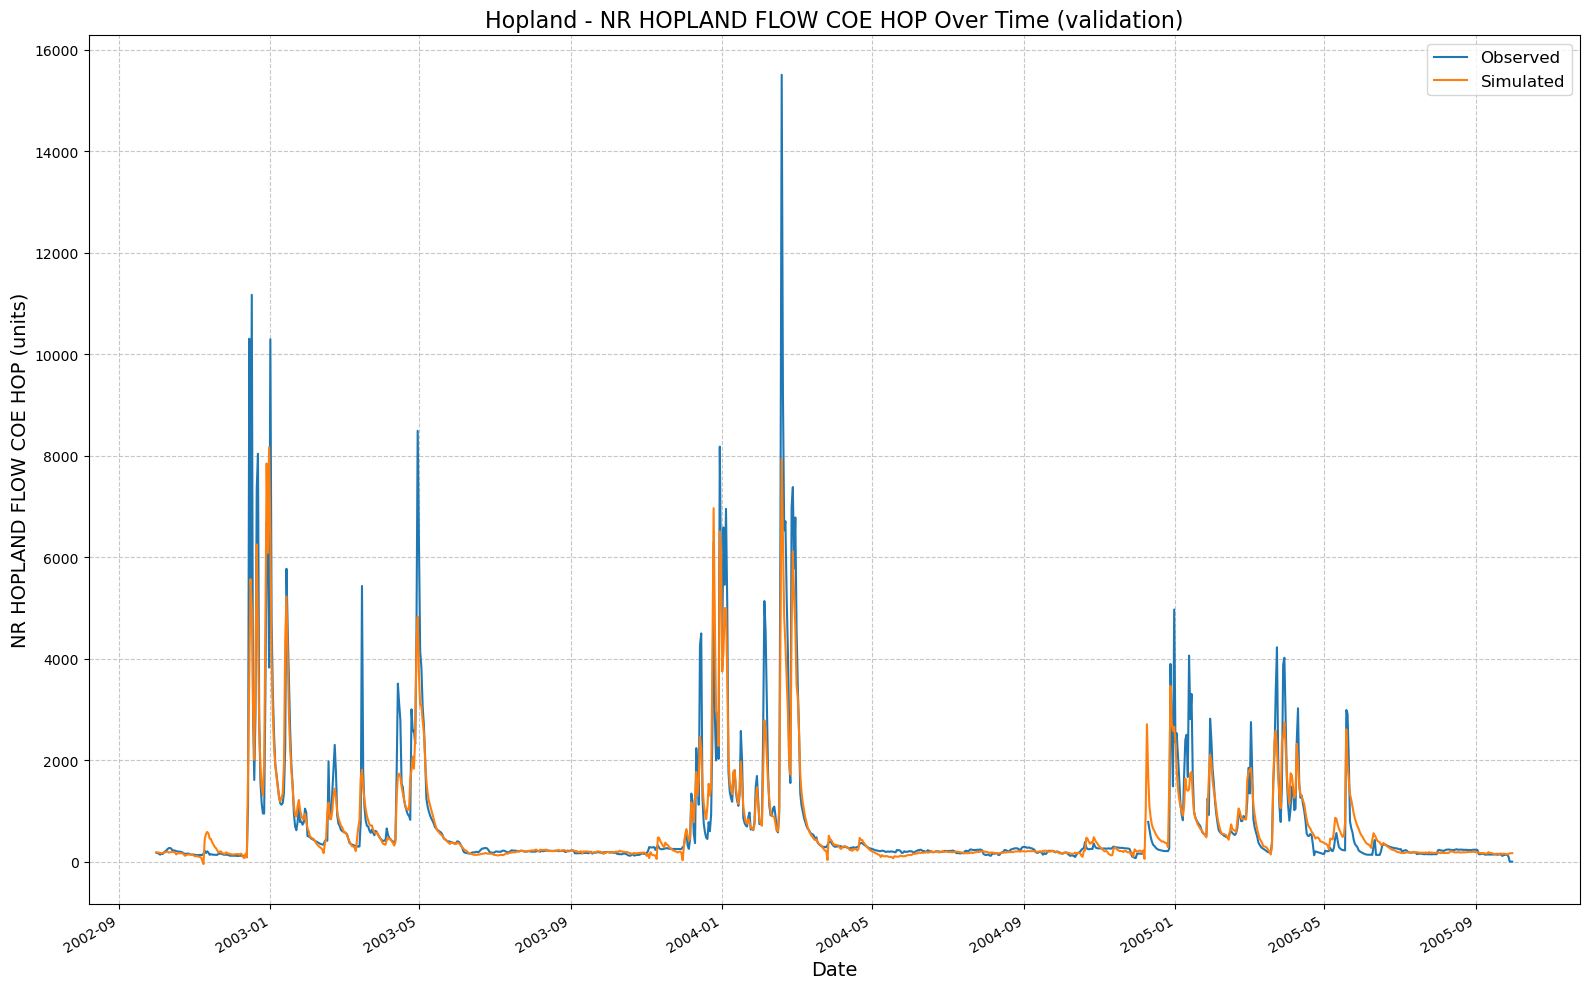

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210830/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:09:26,466: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210926/output.log initialized.
2025-02-12 21:09:26,466: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210926
2025-02-12 21:09:26,466: ### Run configurations for testing_run
2025-02-12 21:09:26,467: experiment_name: testing_run
2025-02-12 21:09:26,467: train_basin_file: hopland
2025-02-12 21:09:26,467: validation_basin_file: hopland
2025-02-12 21:09:26,467: test_basin_file: hopland
2025-02-12 21:09:26,468: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:09:26,468: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 13.28it/s]
2025-02-12 21:09:26,560: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1321.04it/s]
2025-02-12 21:09:26,564: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.53it/s, Loss: 0.0000]
2025-02-12 21:09:28,340: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.69it/s, Loss: 0.0000]
2025-02-12 21:09:29,986: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s, Loss: 0.0000]
2025-02-12 21:09:31,678: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.72it/s, Loss: 0.0000]
2025-02-12 21:09:33,319: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.70it/s, Loss: 0.0000]
2025-02-12 21:09:34,964: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]
2025-02-12 21:09:55,496: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210926/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:09:55,497: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210926/validation/model_epoch016/validation_results.p
got predictions


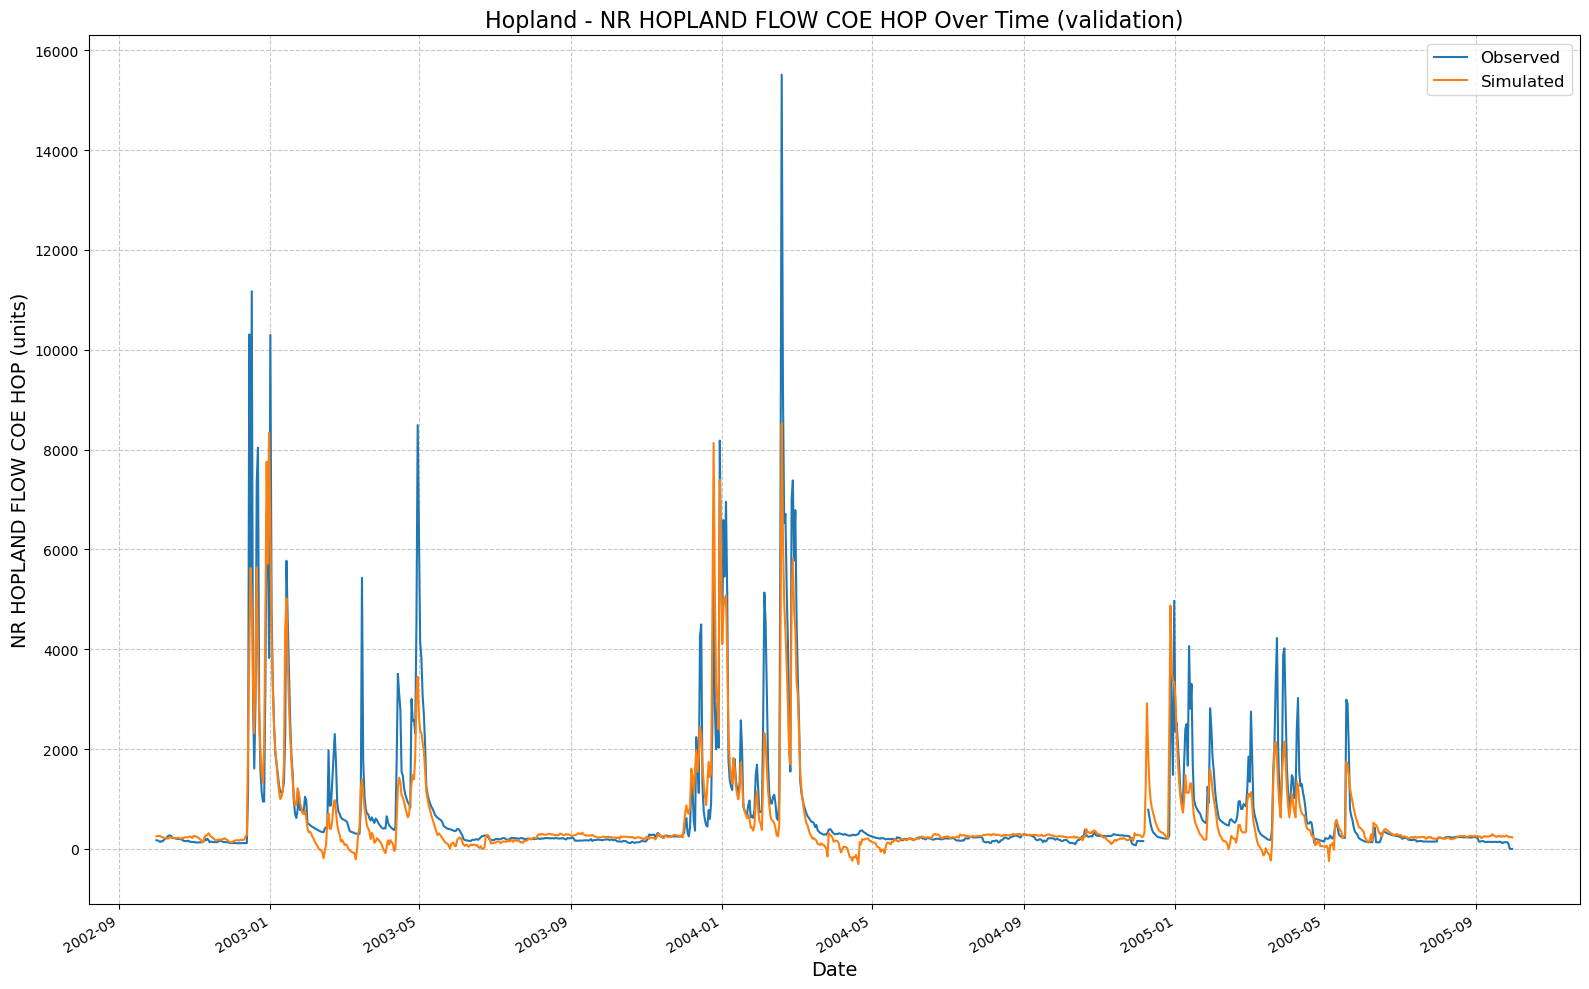

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210926/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:09:55,727: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210955/output.log initialized.
2025-02-12 21:09:55,728: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210955
2025-02-12 21:09:55,728: ### Run configurations for testing_run
2025-02-12 21:09:55,729: experiment_name: testing_run
2025-02-12 21:09:55,729: train_basin_file: hopland
2025-02-12 21:09:55,730: validation_basin_file: hopland
2025-02-12 21:09:55,730: test_basin_file: hopland
2025-02-12 21:09:55,731: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:09:55,731: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 12.14it/s]
2025-02-12 21:09:55,844: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 696.84it/s]
2025-02-12 21:09:55,854: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.42it/s, Loss: 0.0000]
2025-02-12 21:09:57,720: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.81it/s, Loss: 0.0000]
2025-02-12 21:09:59,337: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.78it/s, Loss: 0.0000]
2025-02-12 21:10:00,961: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.81it/s, Loss: 0.0000]
2025-02-12 21:10:02,579: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.76it/s, Loss: 0.0000]
2025-02-12 21:10:04,207: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]
2025-02-12 21:10:52,396: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210955/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:10:52,397: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210955/validation/model_epoch032/validation_results.p
got predictions


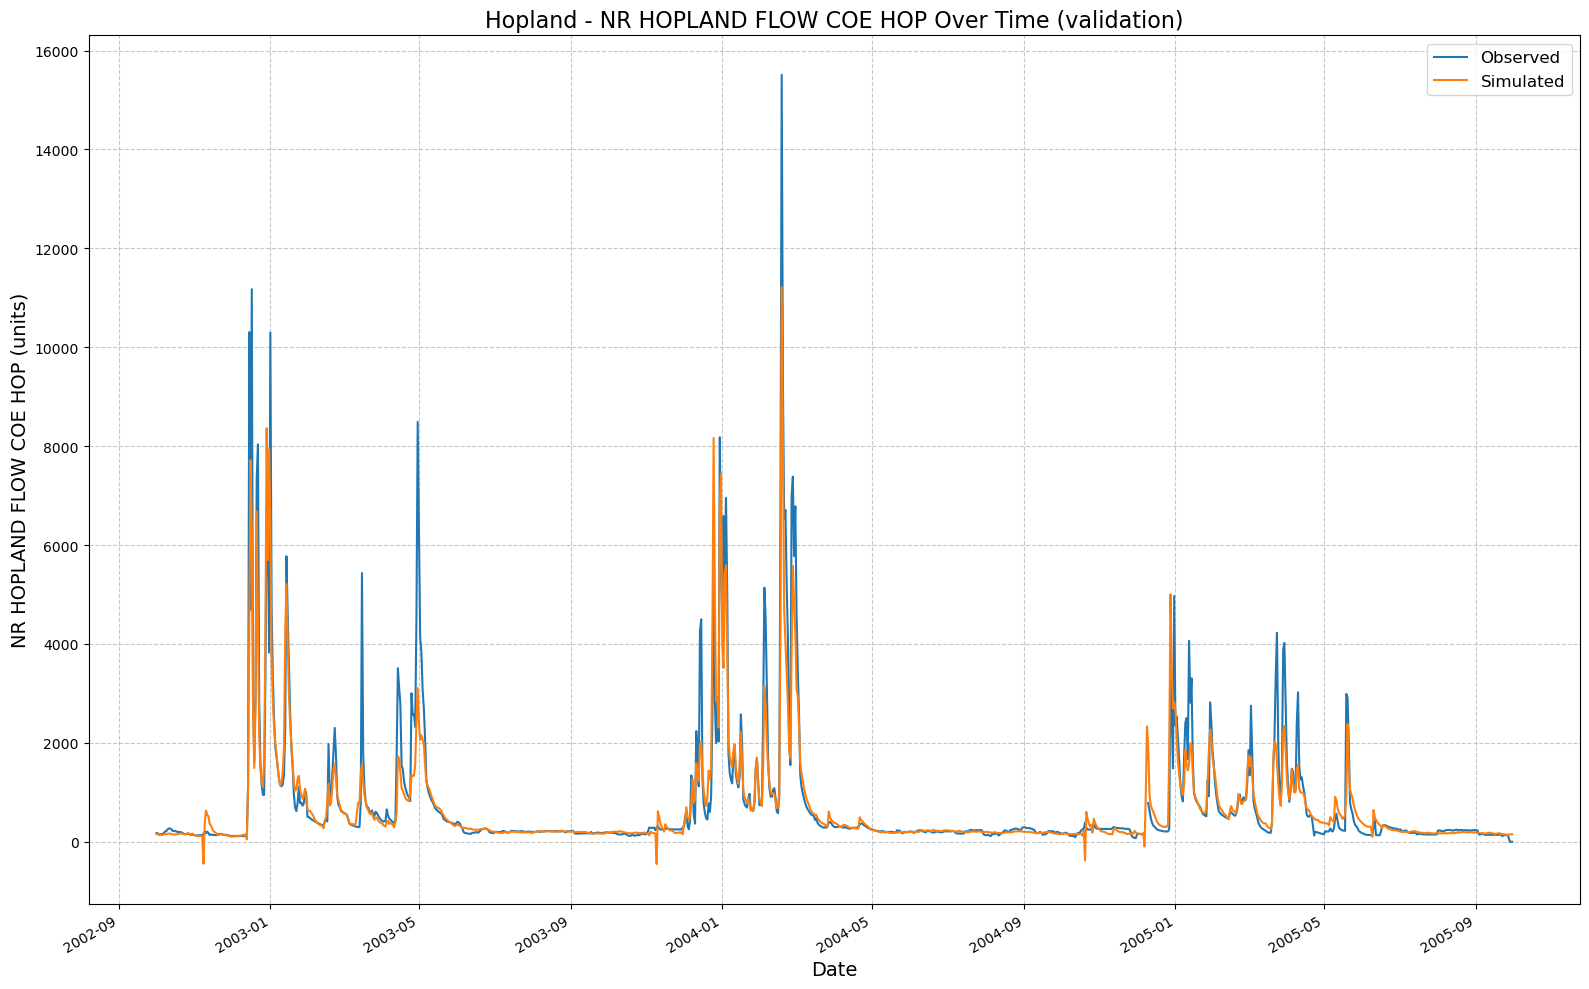

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_210955/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:10:52,587: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211052/output.log initialized.
2025-02-12 21:10:52,588: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211052
2025-02-12 21:10:52,588: ### Run configurations for testing_run
2025-02-12 21:10:52,589: experiment_name: testing_run
2025-02-12 21:10:52,589: train_basin_file: hopland
2025-02-12 21:10:52,590: validation_basin_file: hopland
2025-02-12 21:10:52,590: test_basin_file: hopland
2025-02-12 21:10:52,591: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:10:52,591: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 11.41it/s]
2025-02-12 21:10:52,712: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 963.54it/s]
2025-02-12 21:10:52,720: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.34it/s, Loss: 0.0000]
2025-02-12 21:10:54,610: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.23it/s, Loss: 0.0000]
2025-02-12 21:10:56,379: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.70it/s, Loss: 0.0000]
2025-02-12 21:10:58,021: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.76it/s, Loss: 0.0000]
2025-02-12 21:10:59,651: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.77it/s, Loss: 0.0000]
2025-02-12 21:11:01,277: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]
2025-02-12 21:11:21,273: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211052/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:11:21,273: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211052/validation/model_epoch016/validation_results.p
got predictions


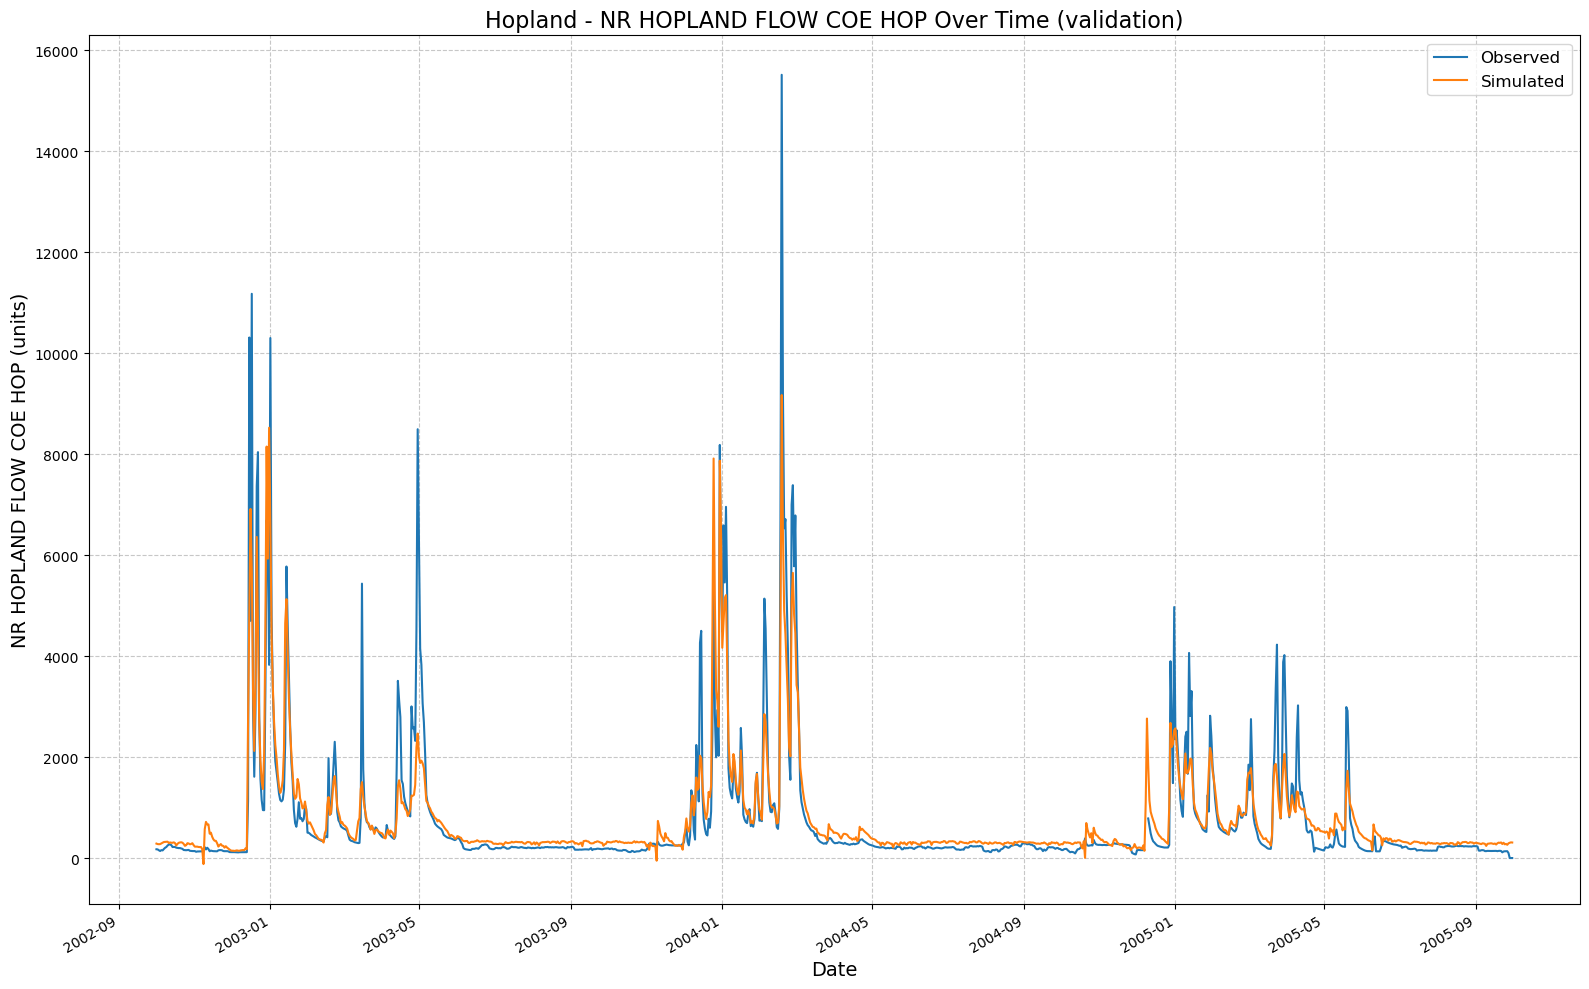

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211052/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:11:21,458: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211121/output.log initialized.
2025-02-12 21:11:21,459: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211121
2025-02-12 21:11:21,459: ### Run configurations for testing_run
2025-02-12 21:11:21,459: experiment_name: testing_run
2025-02-12 21:11:21,460: train_basin_file: hopland
2025-02-12 21:11:21,460: validation_basin_file: hopland
2025-02-12 21:11:21,460: test_basin_file: hopland
2025-02-12 21:11:21,460: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:11:21,461: train_end_date: 2002-09-30 00:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 11.74it/s]
2025-02-12 21:11:21,563: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1678.39it/s]
2025-02-12 21:11:21,567: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  5.87it/s, Loss: 0.0000]
2025-02-12 21:11:23,568: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.49it/s, Loss: 0.0000]
2025-02-12 21:11:25,264: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.26it/s, Loss: 0.0000]
2025-02-12 21:11:27,023: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.83it/s, Loss: 0.0000]
2025-02-12 21:11:28,635: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.77it/s, Loss: 0.0000]
2025-02-12 21:11:30,261: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]
2025-02-12 21:12:19,558: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211121/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:12:19,558: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211121/validation/model_epoch032/validation_results.p
got predictions


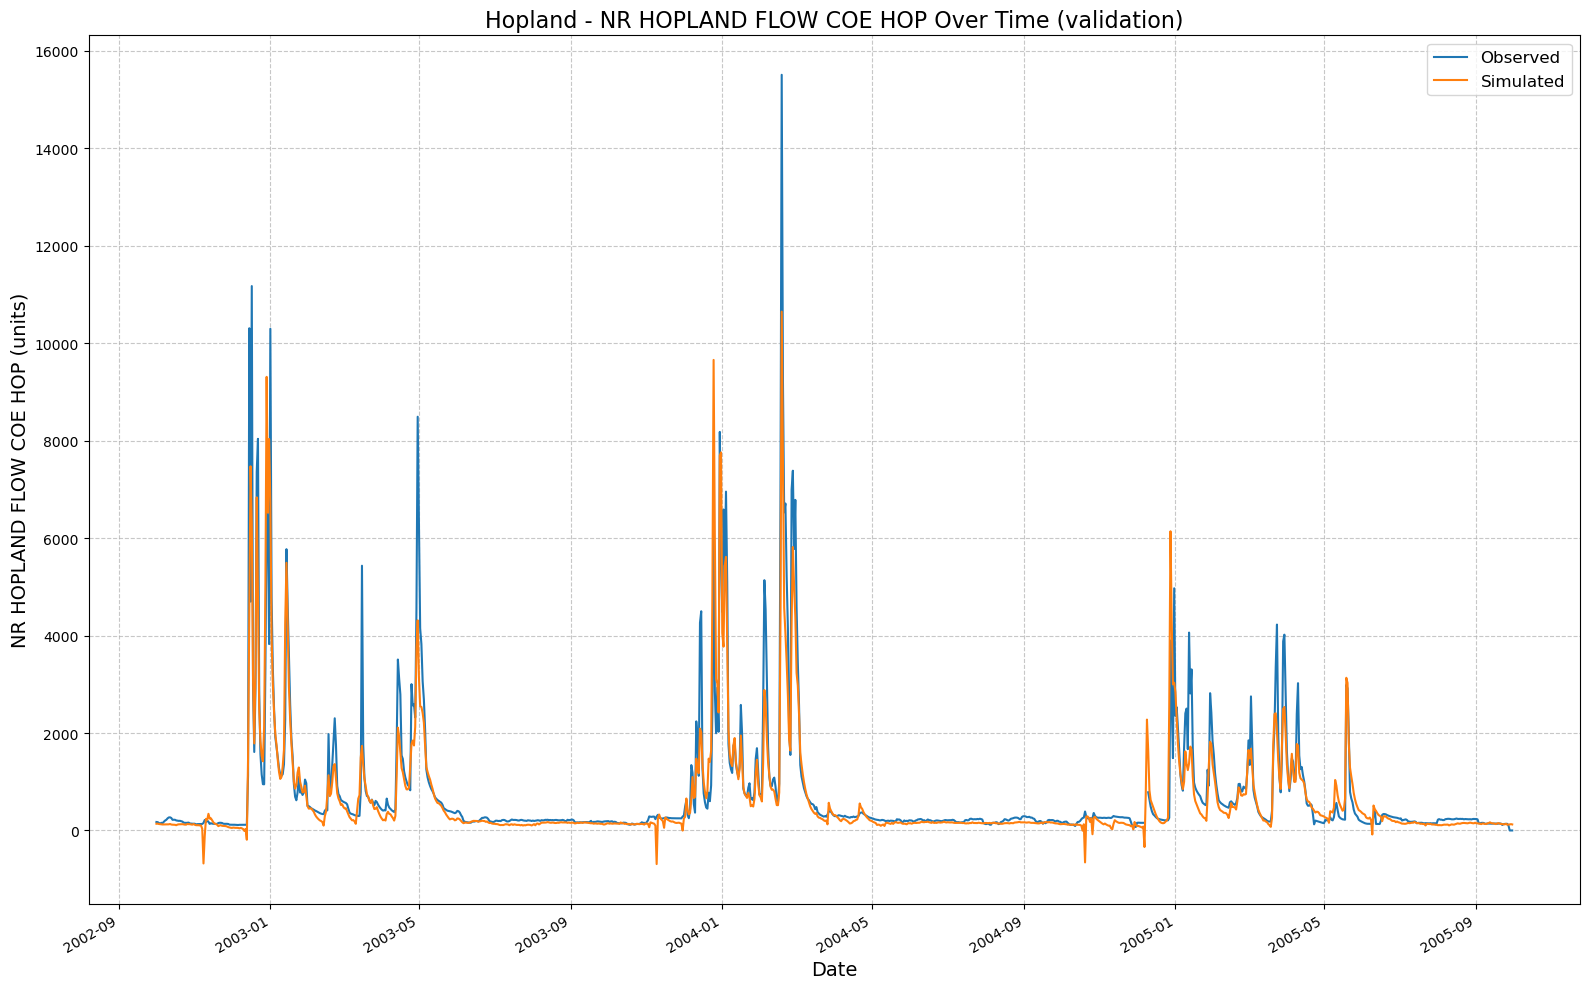

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211121/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:12:19,753: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211219/output.log initialized.
2025-02-12 21:12:19,754: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211219
2025-02-12 21:12:19,755: ### Run configurations for testing_run
2025-02-12 21:12:19,755: experiment_name: testing_run
2025-02-12 21:12:19,756: train_basin_file: hopland
2025-02-12 21:12:19,756: validation_basin_file: hopland
2025-02-12 21:12:19,756: test_basin_file: hopland
2025-02-12 21:12:19,756: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:12:19,757: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 11.92it/s]
2025-02-12 21:12:19,862: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1364.45it/s]
2025-02-12 21:12:19,867: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  2.84it/s, Loss: 0.0000]
2025-02-12 21:12:23,848: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  2.94it/s, Loss: 0.0000]
2025-02-12 21:12:27,590: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.00it/s, Loss: 0.0000]
2025-02-12 21:12:31,259: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.22it/s, Loss: 0.0000]
2025-02-12 21:12:34,680: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.24it/s, Loss: 0.0000]
2025-02-12 21:12:38,078: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]
2025-02-12 21:13:20,036: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211219/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:13:20,037: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211219/validation/model_epoch016/validation_results.p
got predictions


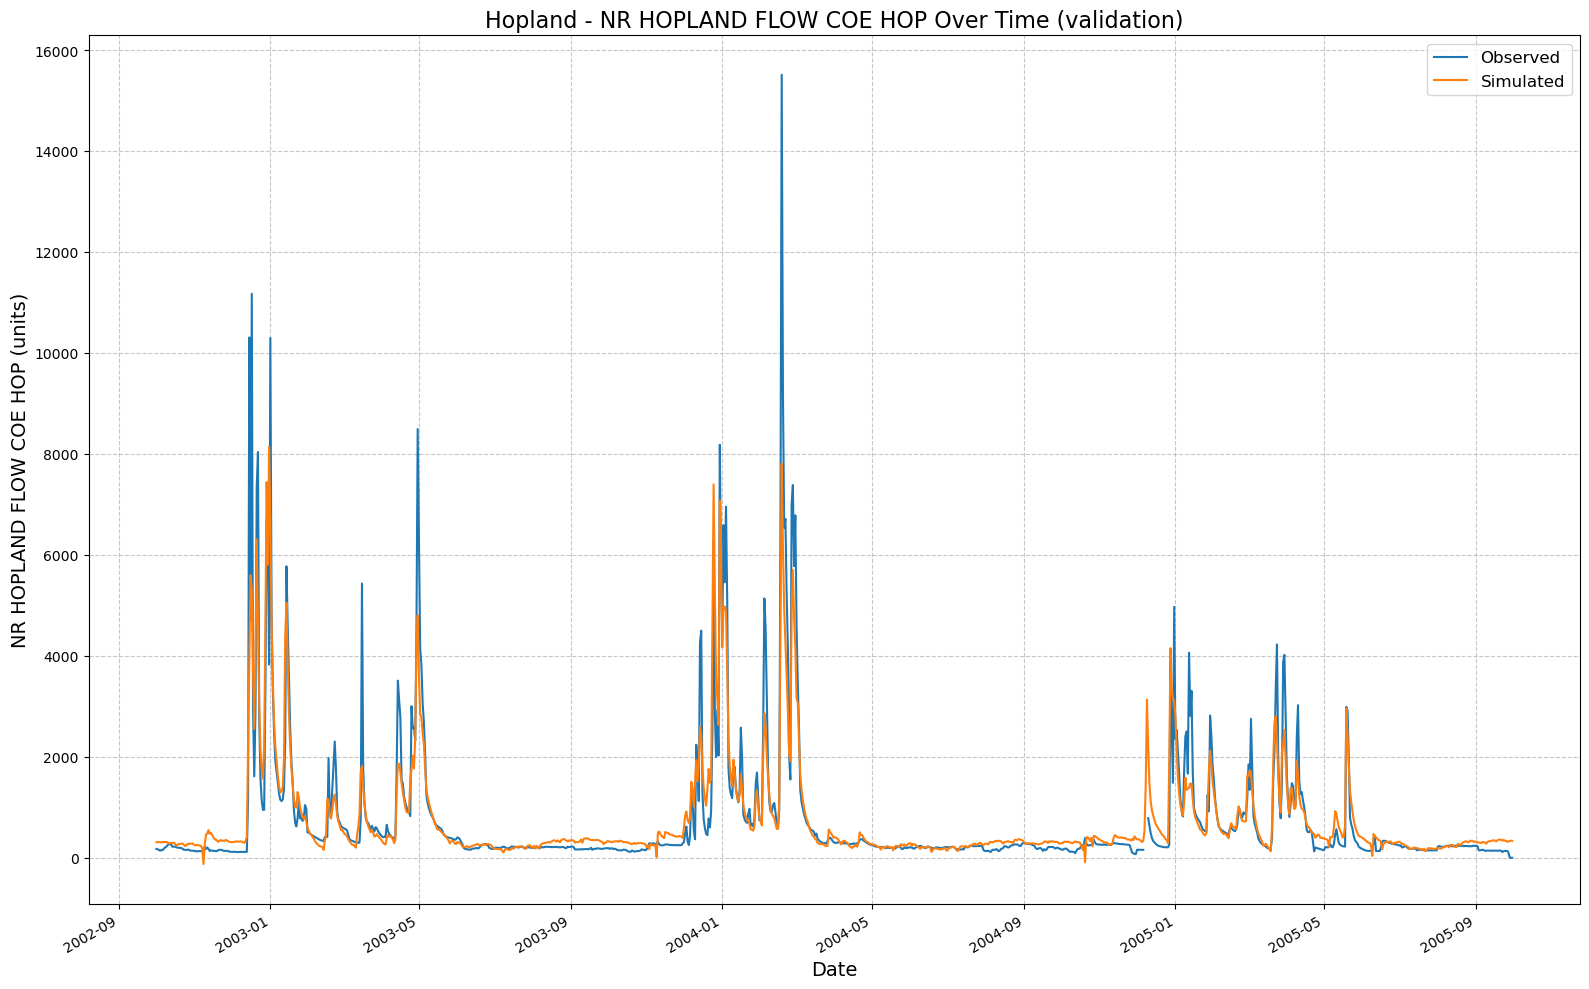

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211219/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:13:20,222: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211320/output.log initialized.
2025-02-12 21:13:20,222: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211320
2025-02-12 21:13:20,222: ### Run configurations for testing_run
2025-02-12 21:13:20,223: experiment_name: testing_run
2025-02-12 21:13:20,224: train_basin_file: hopland
2025-02-12 21:13:20,224: validation_basin_file: hopland
2025-02-12 21:13:20,224: test_basin_file: hopland
2025-02-12 21:13:20,224: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:13:20,225: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 12.24it/s]
2025-02-12 21:13:20,328: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1440.85it/s]
2025-02-12 21:13:20,333: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s, Loss: 0.0000]
2025-02-12 21:13:24,056: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  2.90it/s, Loss: 0.0000]
2025-02-12 21:13:27,852: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.31it/s, Loss: 0.0000]
2025-02-12 21:13:31,178: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.34it/s, Loss: 0.0000]
2025-02-12 21:13:34,475: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.34it/s, Loss: 0.0000]
2025-02-12 21:13:37,770: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
2025-02-12 21:15:17,484: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211320/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:15:17,485: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211320/validation/model_epoch032/validation_results.p
got predictions


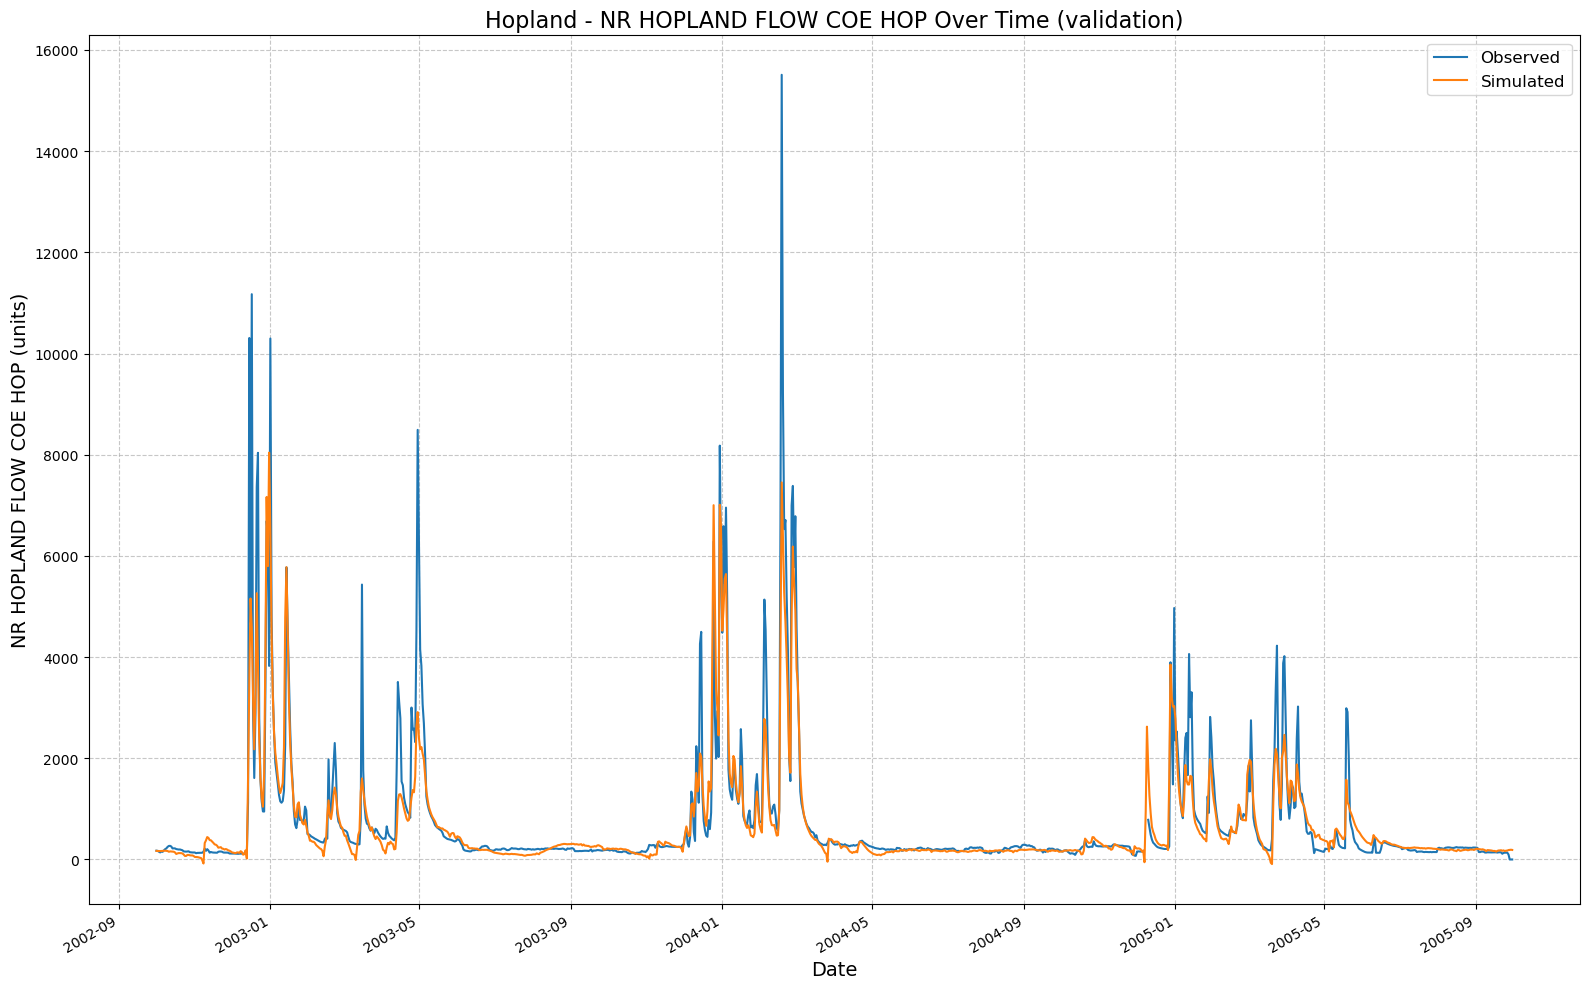

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211320/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:15:17,668: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211517/output.log initialized.
2025-02-12 21:15:17,668: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211517
2025-02-12 21:15:17,669: ### Run configurations for testing_run
2025-02-12 21:15:17,669: experiment_name: testing_run
2025-02-12 21:15:17,670: train_basin_file: hopland
2025-02-12 21:15:17,670: validation_basin_file: hopland
2025-02-12 21:15:17,670: test_basin_file: hopland
2025-02-12 21:15:17,671: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:15:17,671: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 12.45it/s]
2025-02-12 21:15:17,772: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1763.79it/s]
2025-02-12 21:15:17,776: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  3.22it/s, Loss: 0.0000]
2025-02-12 21:15:21,312: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s, Loss: 0.0000]
2025-02-12 21:15:24,850: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  2.99it/s, Loss: 0.0000]
2025-02-12 21:15:28,527: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.19it/s, Loss: 0.0000]
2025-02-12 21:15:31,975: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.34it/s, Loss: 0.0000]
2025-02-12 21:15:35,267: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]
2025-02-12 21:16:16,158: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211517/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:16:16,158: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211517/validation/model_epoch016/validation_results.p
got predictions


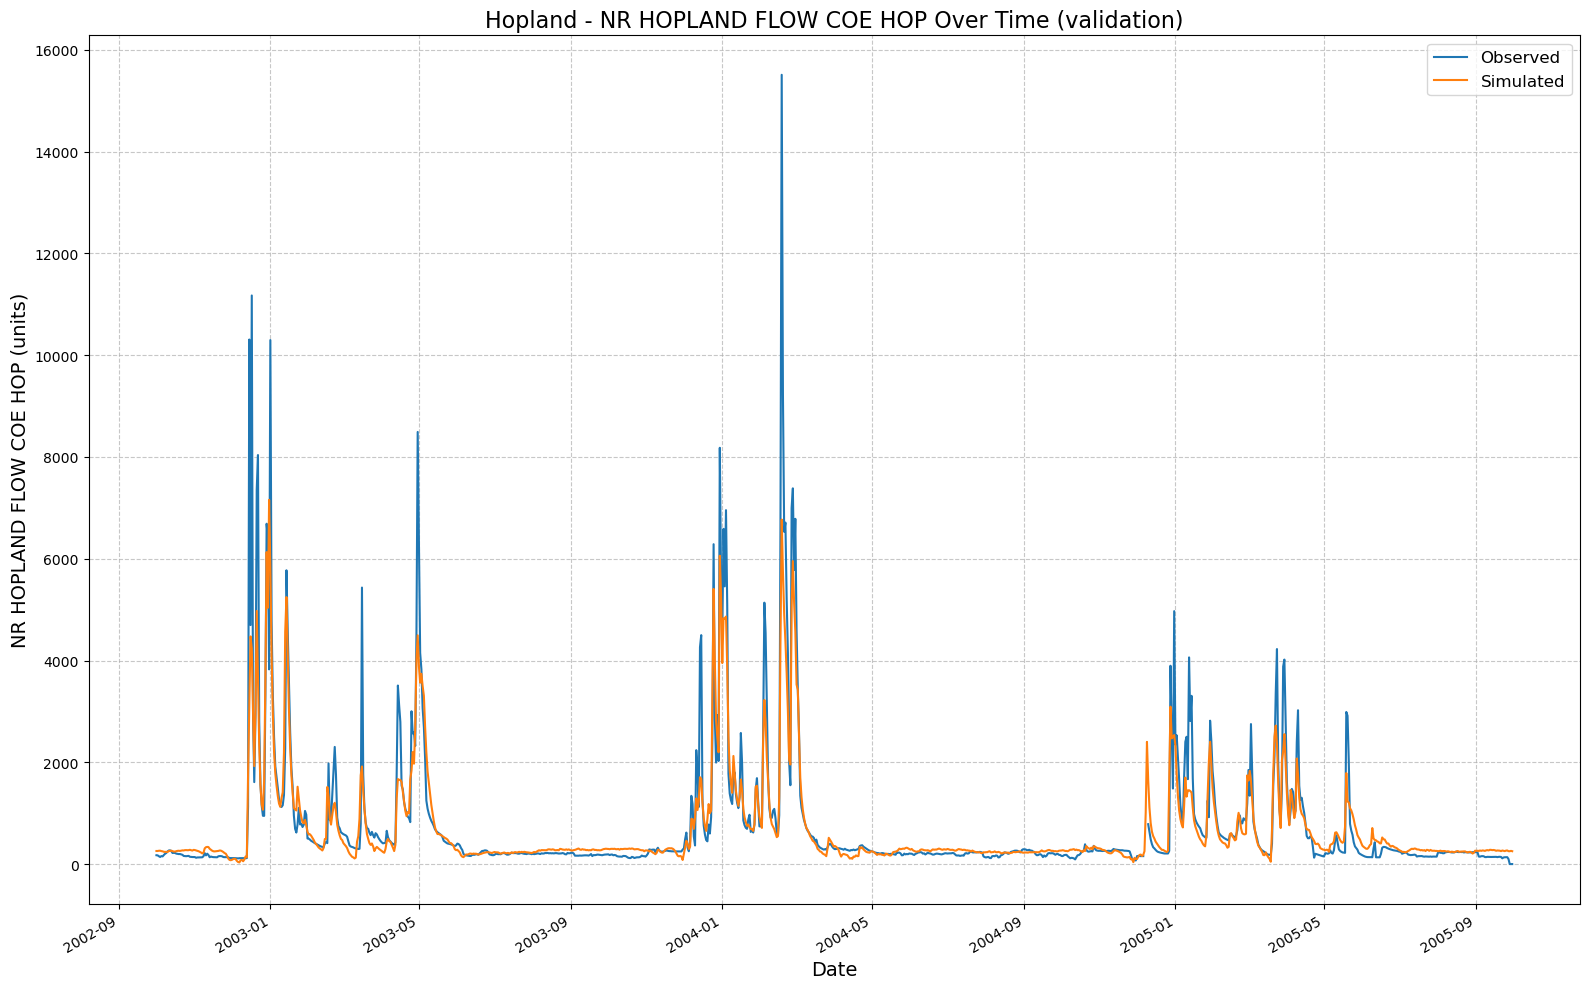

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211517/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:16:16,346: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211616/output.log initialized.
2025-02-12 21:16:16,347: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211616
2025-02-12 21:16:16,347: ### Run configurations for testing_run
2025-02-12 21:16:16,348: experiment_name: testing_run
2025-02-12 21:16:16,348: train_basin_file: hopland
2025-02-12 21:16:16,348: validation_basin_file: hopland
2025-02-12 21:16:16,348: test_basin_file: hopland
2025-02-12 21:16:16,349: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:16:16,349: train_end_date: 2002-09-30 00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 11.59it/s]
2025-02-12 21:16:16,455: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1721.09it/s]
2025-02-12 21:16:16,459: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  3.17it/s, Loss: 0.0000]
2025-02-12 21:16:20,049: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.17it/s, Loss: 0.0000]
2025-02-12 21:16:23,524: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s, Loss: 0.0000]
2025-02-12 21:16:27,124: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s, Loss: 0.0000]
2025-02-12 21:16:30,698: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.30it/s, Loss: 0.0000]
2025-02-12 21:16:34,029: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]
2025-02-12 21:18:12,555: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211616/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:18:12,556: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211616/validation/model_epoch032/validation_results.p
got predictions


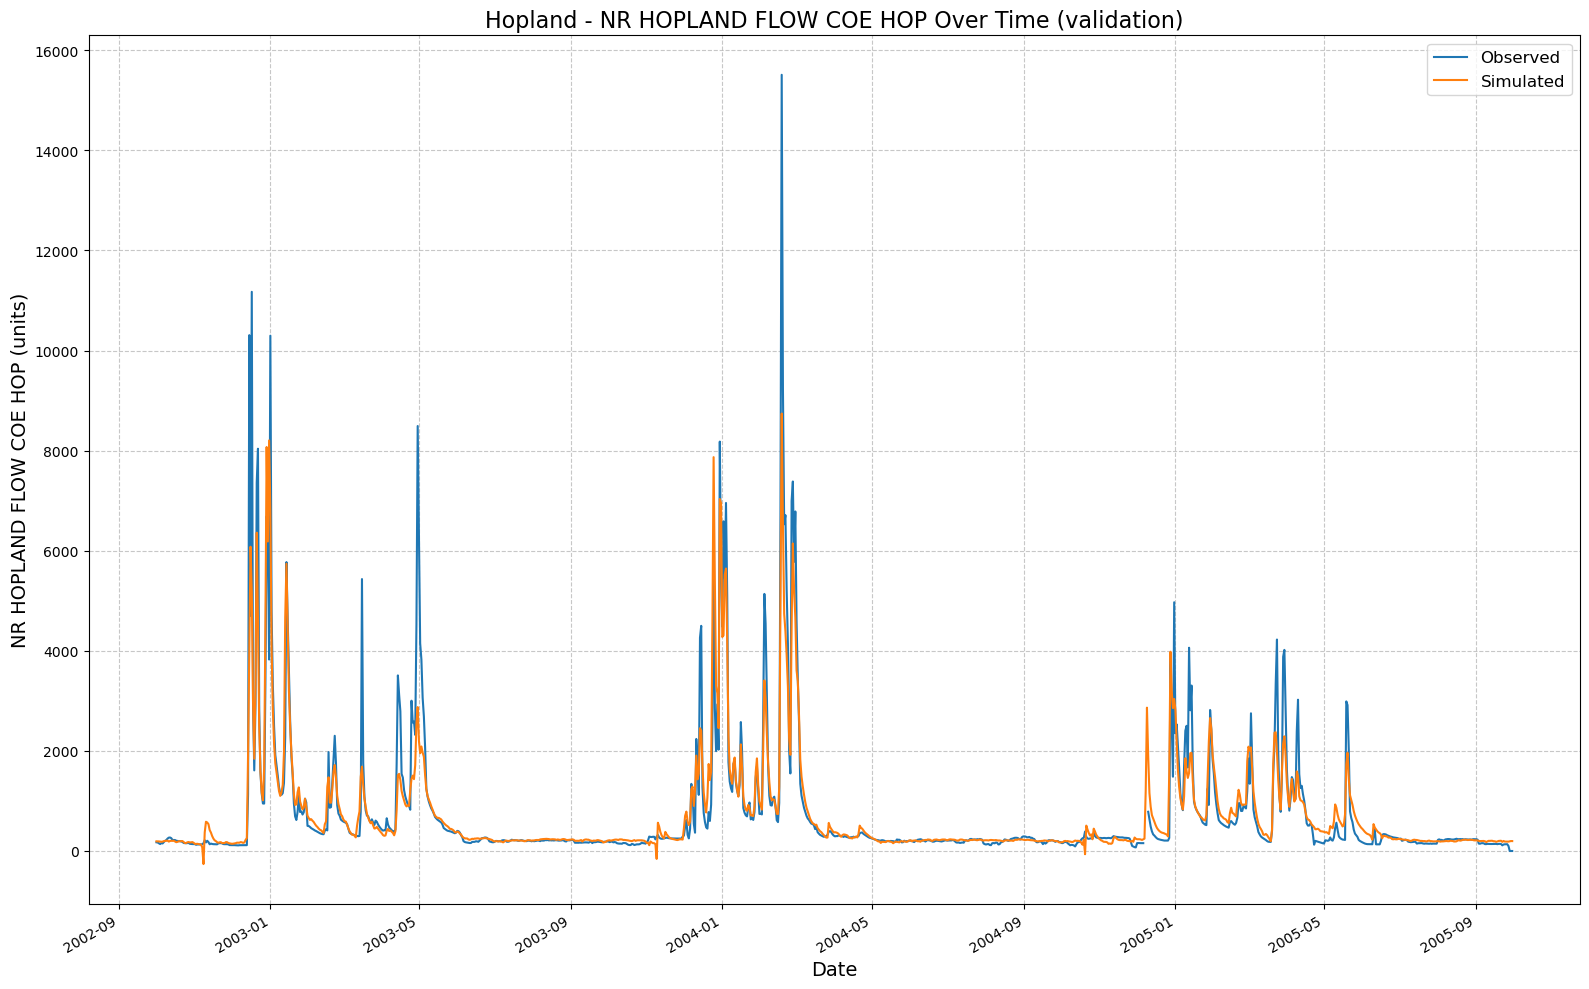

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211616/results_output_validation.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [8]:
for (hs, seq, nl, ep) in itertools.product(
        hyperparam_space["hidden_size"],
        hyperparam_space["seq_length"],
        hyperparam_space["num_layers"],
        hyperparam_space["epochs"]
):
    hp = {
        "hidden_size": hs,
        "seq_length": seq,
        "num_layers": nl,
        "epochs": ep,
        "output_dropout": fixed_dropout,
        "save_weights_every": ep
    }
    print(f"NoPhysics: {hp}")
    trainer = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=hp,
        input_features=None,
        physics_informed=False,
        physics_data_file=None,
        hourly=False,
        extend_train_period=False,
        gpu=-1
    )
    trainer.train()
    csv_path, metrics_dict = trainer.results()
    row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
    for k, v in metrics_dict.items():
        row_data[k] = v
    no_physics_results.append(row_data)

Physics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:18:12,747: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211812/output.log initialized.
2025-02-12 21:18:12,747: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211812
2025-02-12 21:18:12,748: ### Run configurations for testing_run
2025-02-12 21:18:12,748: experiment_name: testing_run
2025-02-12 21:18:12,749: train_basin_file: hopland
2025-02-12 21:18:12,749: validation_basin_file: hopland
2025-02-12 21:18:12,750: test_basin_file: hopland
2025-02-12 21:18:12,750: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:18:12,751: train_end_date: 2002-09-30 00:00:00
2025-02-12 21:18:12,751: validation_start_date: 2002-10-01 00:00:00
2025-02-12 21:18:12,751: validation_end_date: 2005-09-30 00:00:00
2025-02-12 21:18:12,75

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]
2025-02-12 21:18:28,249: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211812/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:18:28,250: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211812/validation/model_epoch016/validation_results.p
got predictions


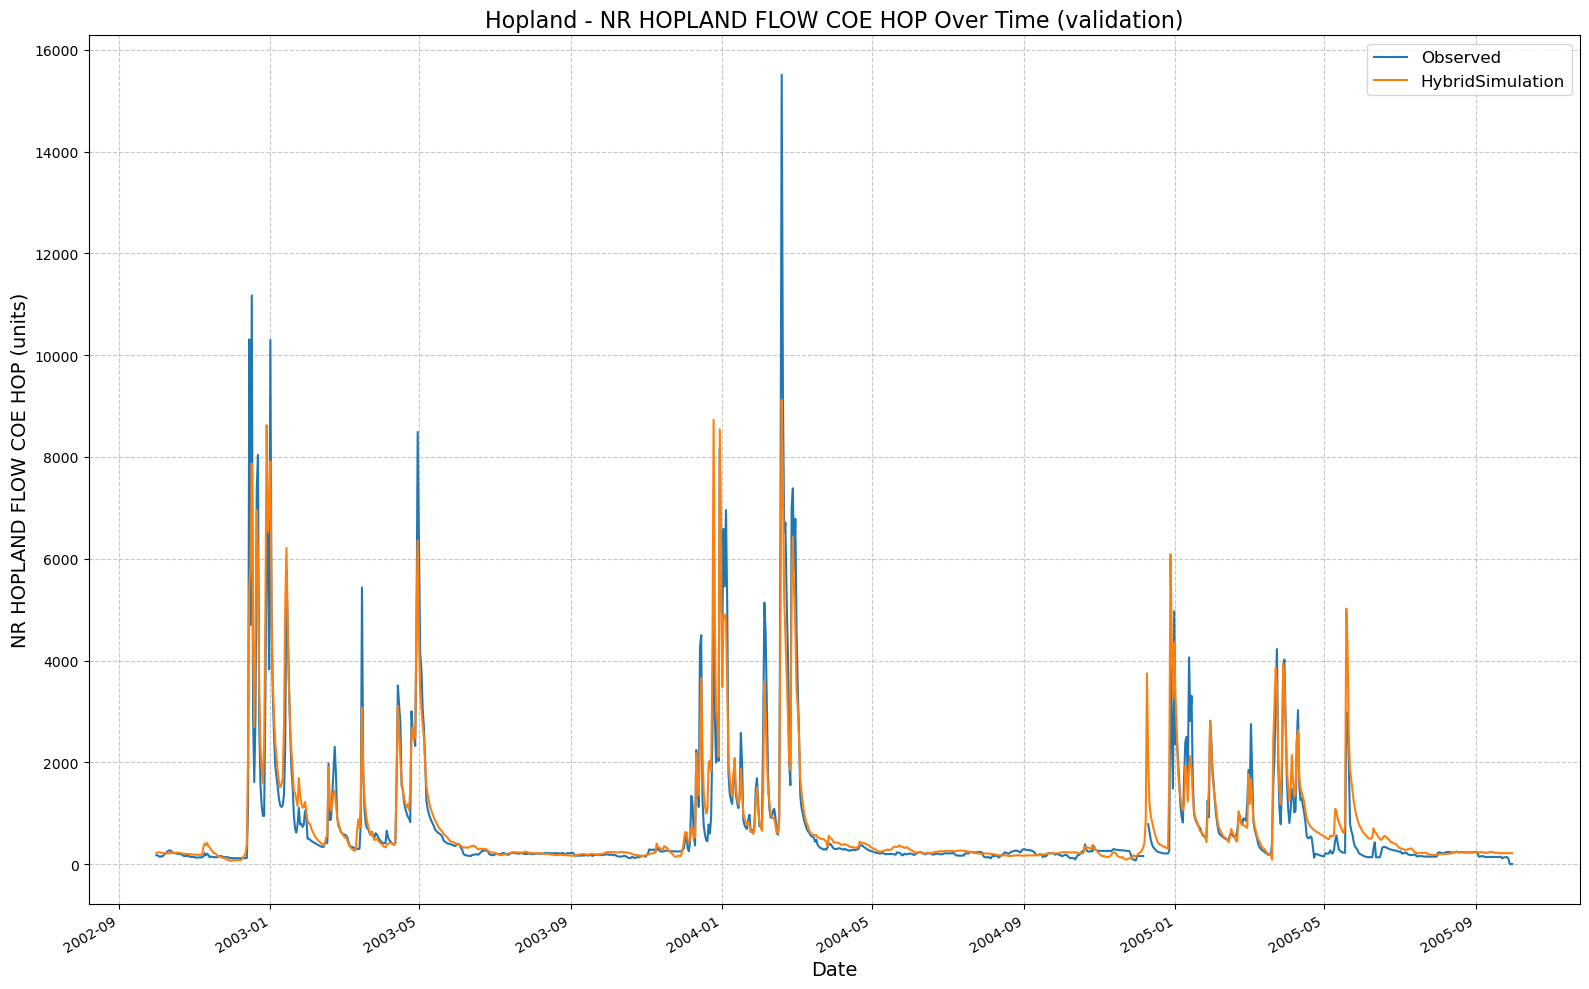

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211812/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:18:28,432: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211828/output.log initialized.
2025-02-12 21:18:28,432: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211828
2025-02-12 21:18:28,432: ### Run configurations for testing_run
2025-02-12 21:18:28,433: experiment_name: testing_run
2025-02-12 21:18:28,433: train_basin_file: hopland
2025-02-12 21:18:28,433: validation_basin_file: hopland
2025-02-12 21:18:28,433: test_basin_file: hopland
2025-02-12 21:18:28,434: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:18:28,434: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  7.52it/s]
2025-02-12 21:18:28,587: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1154.82it/s]
2025-02-12 21:18:28,593: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 13.04it/s, Loss: 0.0000]
2025-02-12 21:18:29,538: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 13.15it/s, Loss: 0.0000]
2025-02-12 21:18:30,376: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 13.31it/s, Loss: 0.0000]
2025-02-12 21:18:31,204: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 12.55it/s, Loss: 0.0000]
2025-02-12 21:18:32,082: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 12.13it/s, Loss: 0.0000]
2025-02-12 21:18:32,991: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]
2025-02-12 21:18:58,465: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211828/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:18:58,466: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211828/validation/model_epoch032/validation_results.p
got predictions


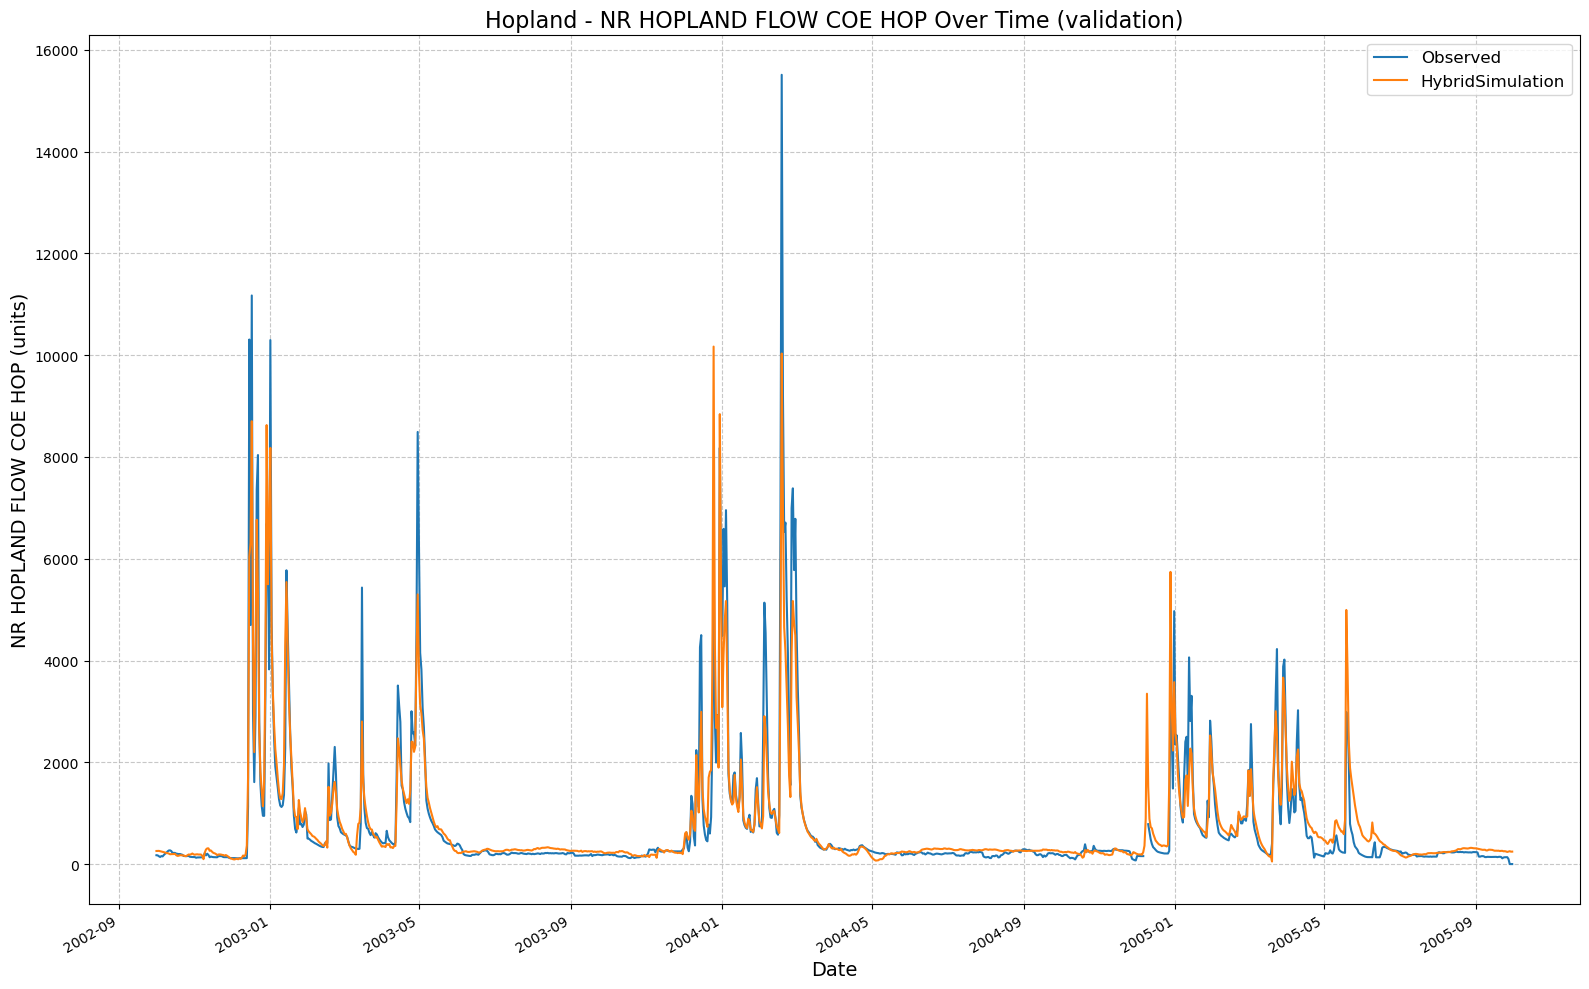

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211828/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:18:58,648: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211858/output.log initialized.
2025-02-12 21:18:58,648: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211858
2025-02-12 21:18:58,648: ### Run configurations for testing_run
2025-02-12 21:18:58,649: experiment_name: testing_run
2025-02-12 21:18:58,649: train_basin_file: hopland
2025-02-12 21:18:58,649: validation_basin_file: hopland
2025-02-12 21:18:58,650: test_basin_file: hopland
2025-02-12 21:18:58,650: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:18:58,650: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  7.56it/s]
2025-02-12 21:18:58,801: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1083.52it/s]
2025-02-12 21:18:58,807: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 12.91it/s, Loss: 0.0000]
2025-02-12 21:18:59,759: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 11.09it/s, Loss: 0.0000]
2025-02-12 21:19:00,754: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 13.10it/s, Loss: 0.0000]
2025-02-12 21:19:01,596: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 13.18it/s, Loss: 0.0000]
2025-02-12 21:19:02,432: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 13.10it/s, Loss: 0.0000]
2025-02-12 21:19:03,273: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]
2025-02-12 21:19:14,065: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211858/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:19:14,065: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211858/validation/model_epoch016/validation_results.p
got predictions


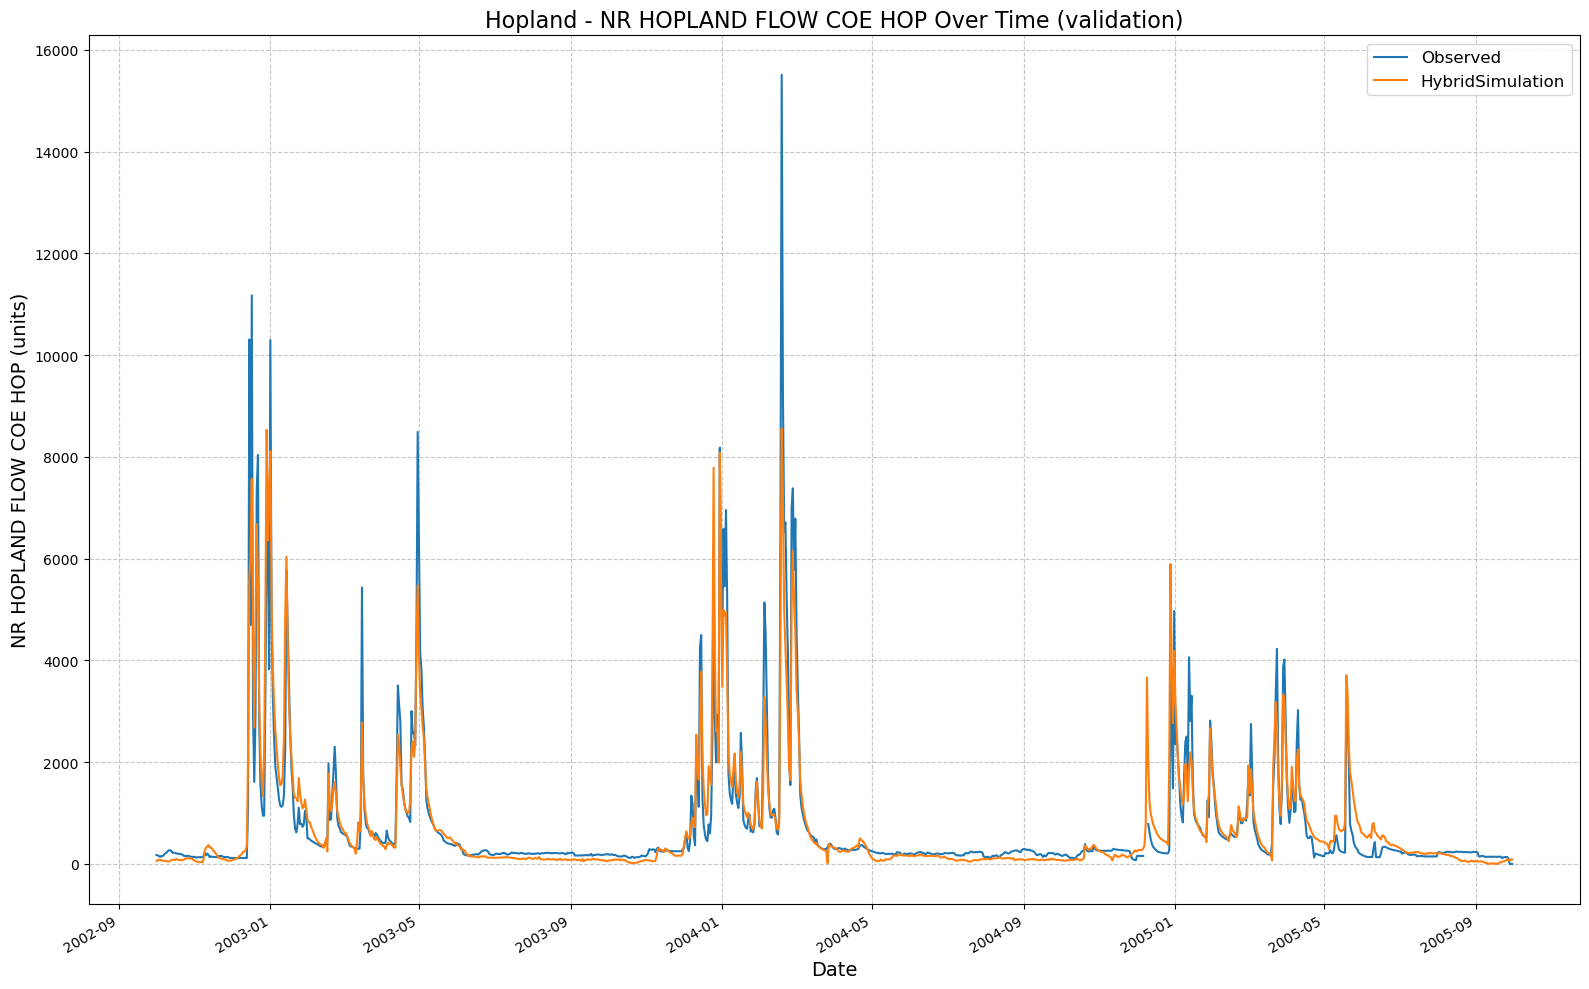

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211858/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:19:14,245: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211914/output.log initialized.
2025-02-12 21:19:14,246: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211914
2025-02-12 21:19:14,246: ### Run configurations for testing_run
2025-02-12 21:19:14,247: experiment_name: testing_run
2025-02-12 21:19:14,247: train_basin_file: hopland
2025-02-12 21:19:14,247: validation_basin_file: hopland
2025-02-12 21:19:14,247: test_basin_file: hopland
2025-02-12 21:19:14,248: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:19:14,248: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  7.43it/s]
2025-02-12 21:19:14,401: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1266.01it/s]
2025-02-12 21:19:14,407: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 12.86it/s, Loss: 0.0000]
2025-02-12 21:19:15,365: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 13.18it/s, Loss: 0.0000]
2025-02-12 21:19:16,202: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 13.00it/s, Loss: 0.0000]
2025-02-12 21:19:17,050: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 13.18it/s, Loss: 0.0000]
2025-02-12 21:19:17,886: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 13.19it/s, Loss: 0.0000]
2025-02-12 21:19:18,722: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]
2025-02-12 21:19:44,139: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211914/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:19:44,140: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211914/validation/model_epoch032/validation_results.p
got predictions


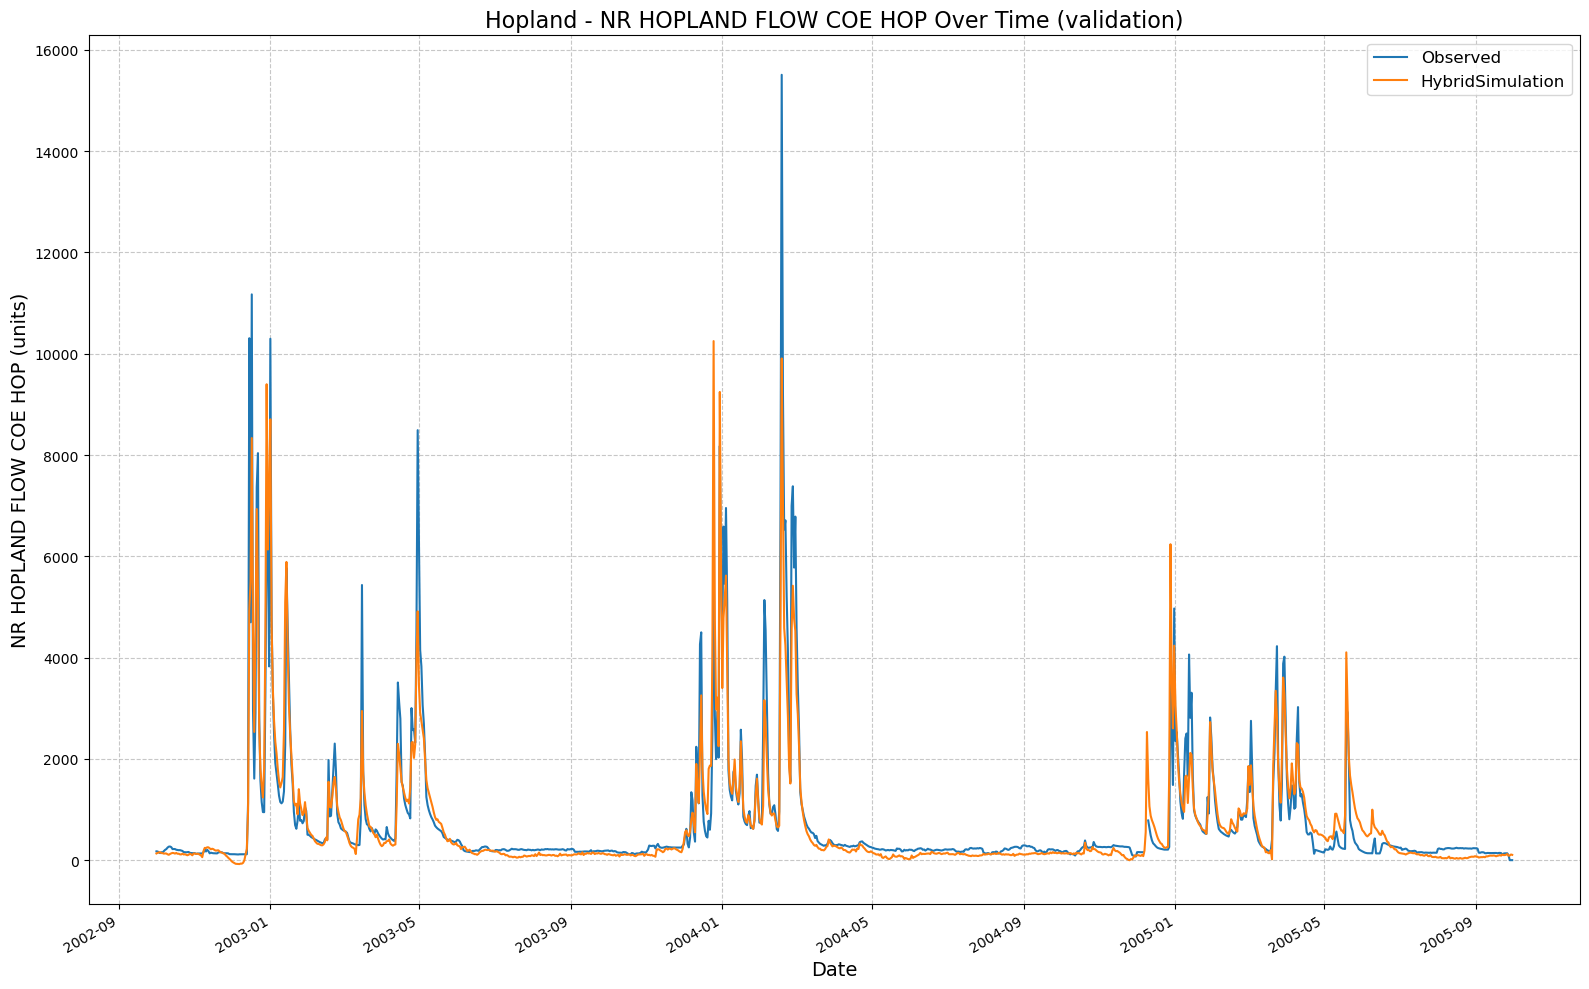

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211914/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:19:44,320: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211944/output.log initialized.
2025-02-12 21:19:44,320: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211944
2025-02-12 21:19:44,321: ### Run configurations for testing_run
2025-02-12 21:19:44,321: experiment_name: testing_run
2025-02-12 21:19:44,322: train_basin_file: hopland
2025-02-12 21:19:44,322: validation_basin_file: hopland
2025-02-12 21:19:44,322: test_basin_file: hopland
2025-02-12 21:19:44,323: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:19:44,323: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-02-12 21:19:44,494: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1071.89it/s]
2025-02-12 21:19:44,501: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.37it/s, Loss: 0.0000]
2025-02-12 21:19:46,376: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.80it/s, Loss: 0.0000]
2025-02-12 21:19:47,996: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.87it/s, Loss: 0.0000]
2025-02-12 21:19:49,599: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.86it/s, Loss: 0.0000]
2025-02-12 21:19:51,205: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  5.90it/s, Loss: 0.0000]
2025-02-12 21:19:53,072: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]
2025-02-12 21:20:13,696: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211944/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:20:13,697: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211944/validation/model_epoch016/validation_results.p
got predictions


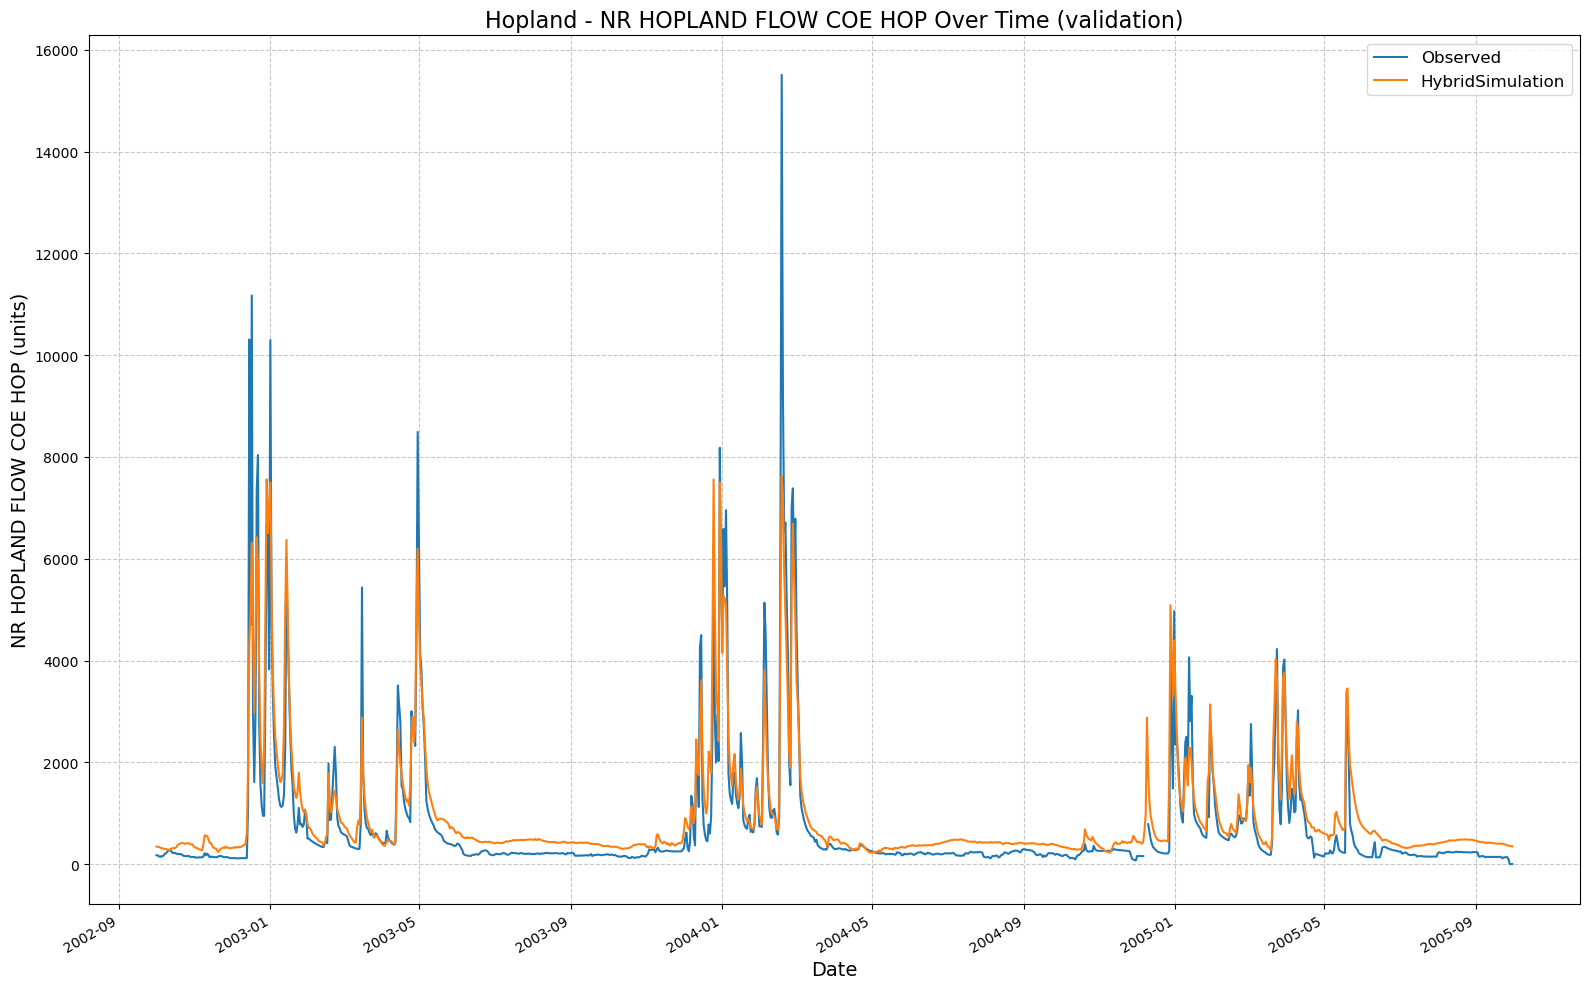

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_211944/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:20:13,878: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212013/output.log initialized.
2025-02-12 21:20:13,878: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212013
2025-02-12 21:20:13,878: ### Run configurations for testing_run
2025-02-12 21:20:13,879: experiment_name: testing_run
2025-02-12 21:20:13,879: train_basin_file: hopland
2025-02-12 21:20:13,879: validation_basin_file: hopland
2025-02-12 21:20:13,880: test_basin_file: hopland
2025-02-12 21:20:13,880: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:20:13,880: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  7.58it/s]
2025-02-12 21:20:14,034: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1166.70it/s]
2025-02-12 21:20:14,040: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.64it/s, Loss: 0.0000]
2025-02-12 21:20:15,814: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.83it/s, Loss: 0.0000]
2025-02-12 21:20:17,426: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.91it/s, Loss: 0.0000]
2025-02-12 21:20:19,021: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.90it/s, Loss: 0.0000]
2025-02-12 21:20:20,618: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.77it/s, Loss: 0.0000]
2025-02-12 21:20:22,245: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]
2025-02-12 21:21:10,523: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212013/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:21:10,523: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212013/validation/model_epoch032/validation_results.p
got predictions


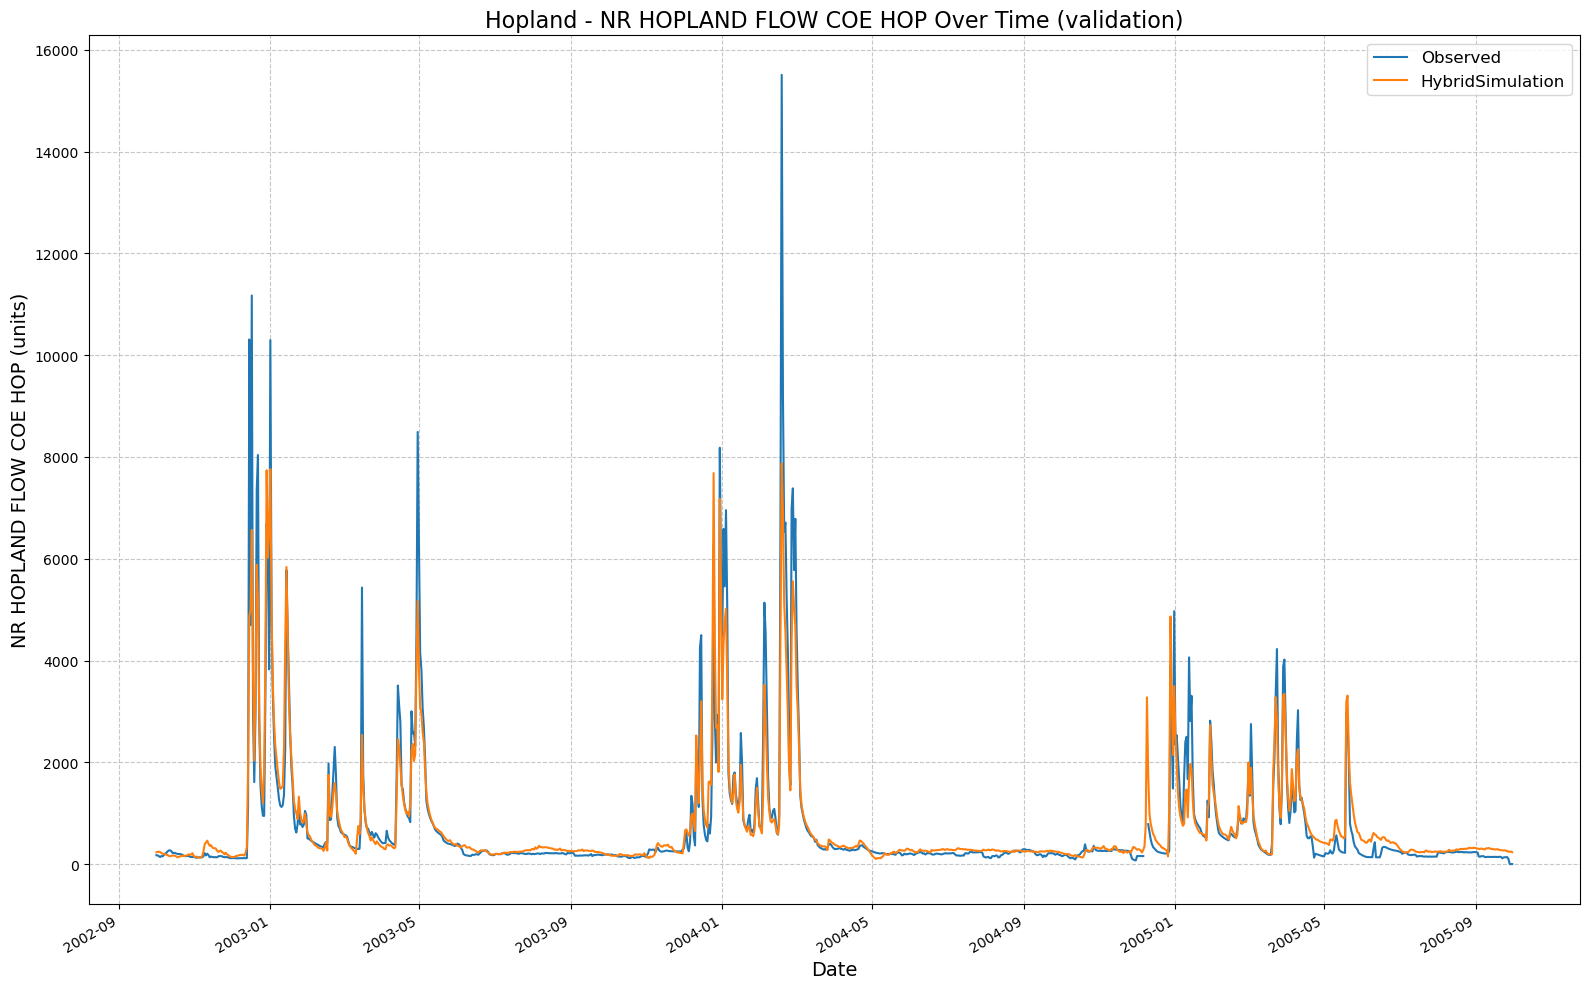

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212013/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:21:10,705: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212110/output.log initialized.
2025-02-12 21:21:10,706: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212110
2025-02-12 21:21:10,706: ### Run configurations for testing_run
2025-02-12 21:21:10,706: experiment_name: testing_run
2025-02-12 21:21:10,706: train_basin_file: hopland
2025-02-12 21:21:10,707: validation_basin_file: hopland
2025-02-12 21:21:10,707: test_basin_file: hopland
2025-02-12 21:21:10,707: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:21:10,708: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  7.50it/s]
2025-02-12 21:21:10,861: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1485.76it/s]
2025-02-12 21:21:10,867: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.32it/s, Loss: 0.0000]
2025-02-12 21:21:12,746: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.90it/s, Loss: 0.0000]
2025-02-12 21:21:14,343: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.85it/s, Loss: 0.0000]
2025-02-12 21:21:15,950: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.66it/s, Loss: 0.0000]
2025-02-12 21:21:17,604: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.79it/s, Loss: 0.0000]
2025-02-12 21:21:19,226: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]
2025-02-12 21:21:39,911: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212110/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:21:39,912: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212110/validation/model_epoch016/validation_results.p
got predictions


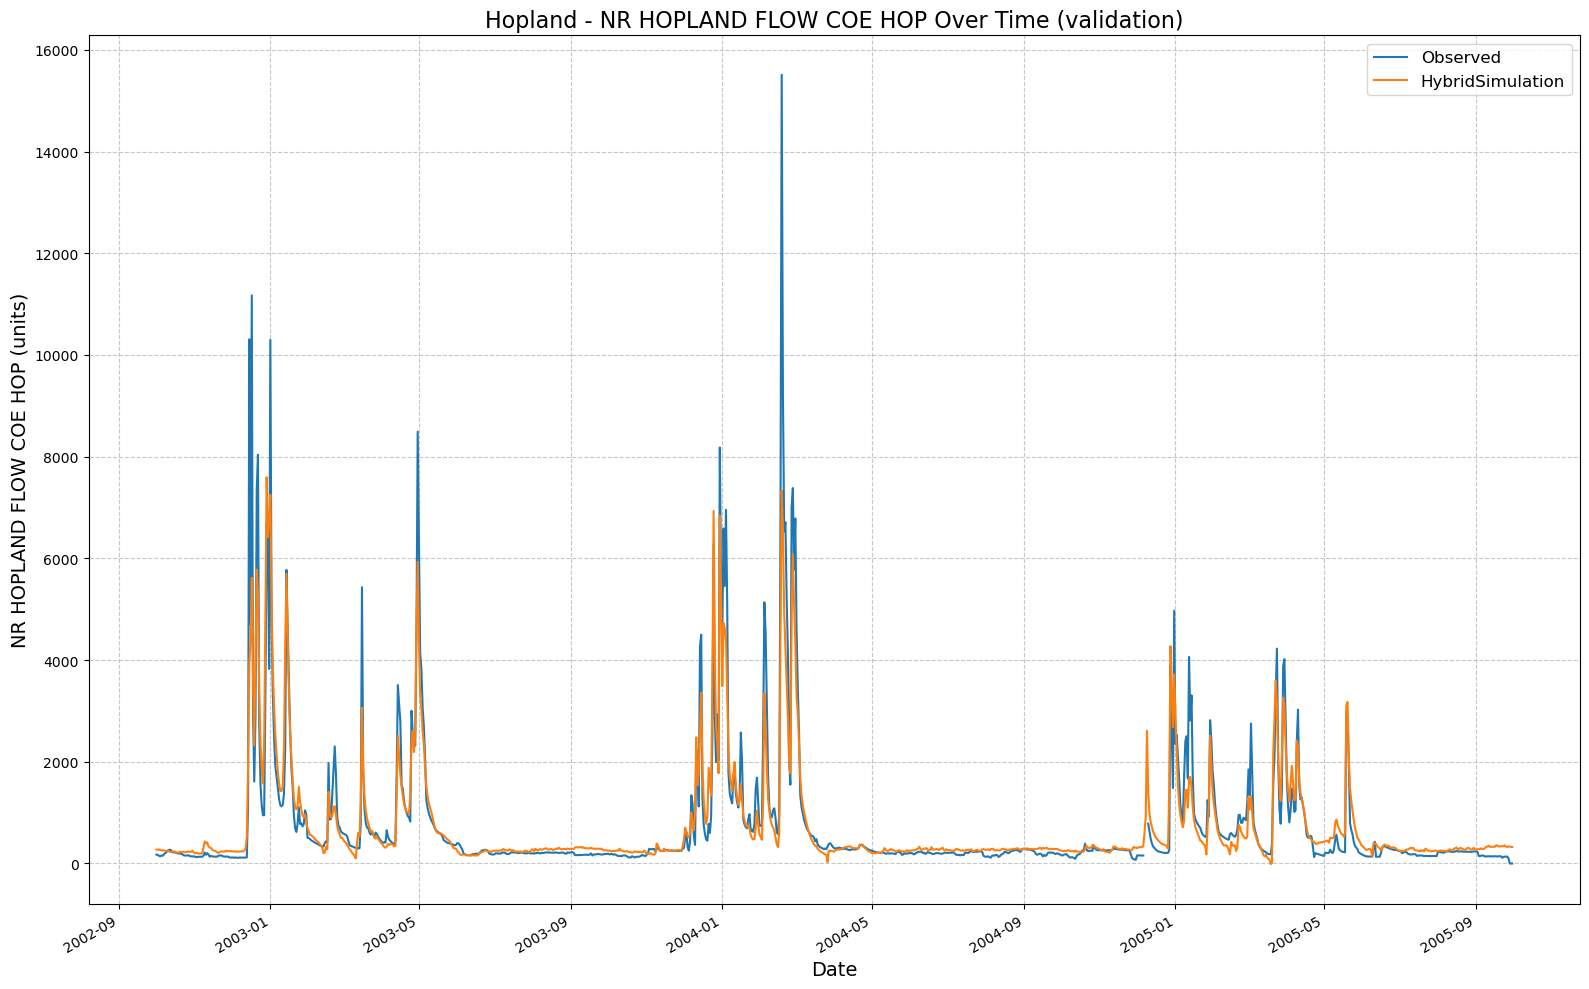

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212110/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:21:40,099: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212140/output.log initialized.
2025-02-12 21:21:40,100: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212140
2025-02-12 21:21:40,100: ### Run configurations for testing_run
2025-02-12 21:21:40,101: experiment_name: testing_run
2025-02-12 21:21:40,101: train_basin_file: hopland
2025-02-12 21:21:40,101: validation_basin_file: hopland
2025-02-12 21:21:40,102: test_basin_file: hopland
2025-02-12 21:21:40,102: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:21:40,102: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.56it/s]
2025-02-12 21:21:40,275: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1179.17it/s]
2025-02-12 21:21:40,282: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.30it/s, Loss: 0.0000]
2025-02-12 21:21:42,335: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.74it/s, Loss: 0.0000]
2025-02-12 21:21:43,969: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.68it/s, Loss: 0.0000]
2025-02-12 21:21:45,619: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.79it/s, Loss: 0.0000]
2025-02-12 21:21:47,242: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.77it/s, Loss: 0.0000]
2025-02-12 21:21:48,868: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]
2025-02-12 21:22:37,373: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212140/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:22:37,374: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212140/validation/model_epoch032/validation_results.p
got predictions


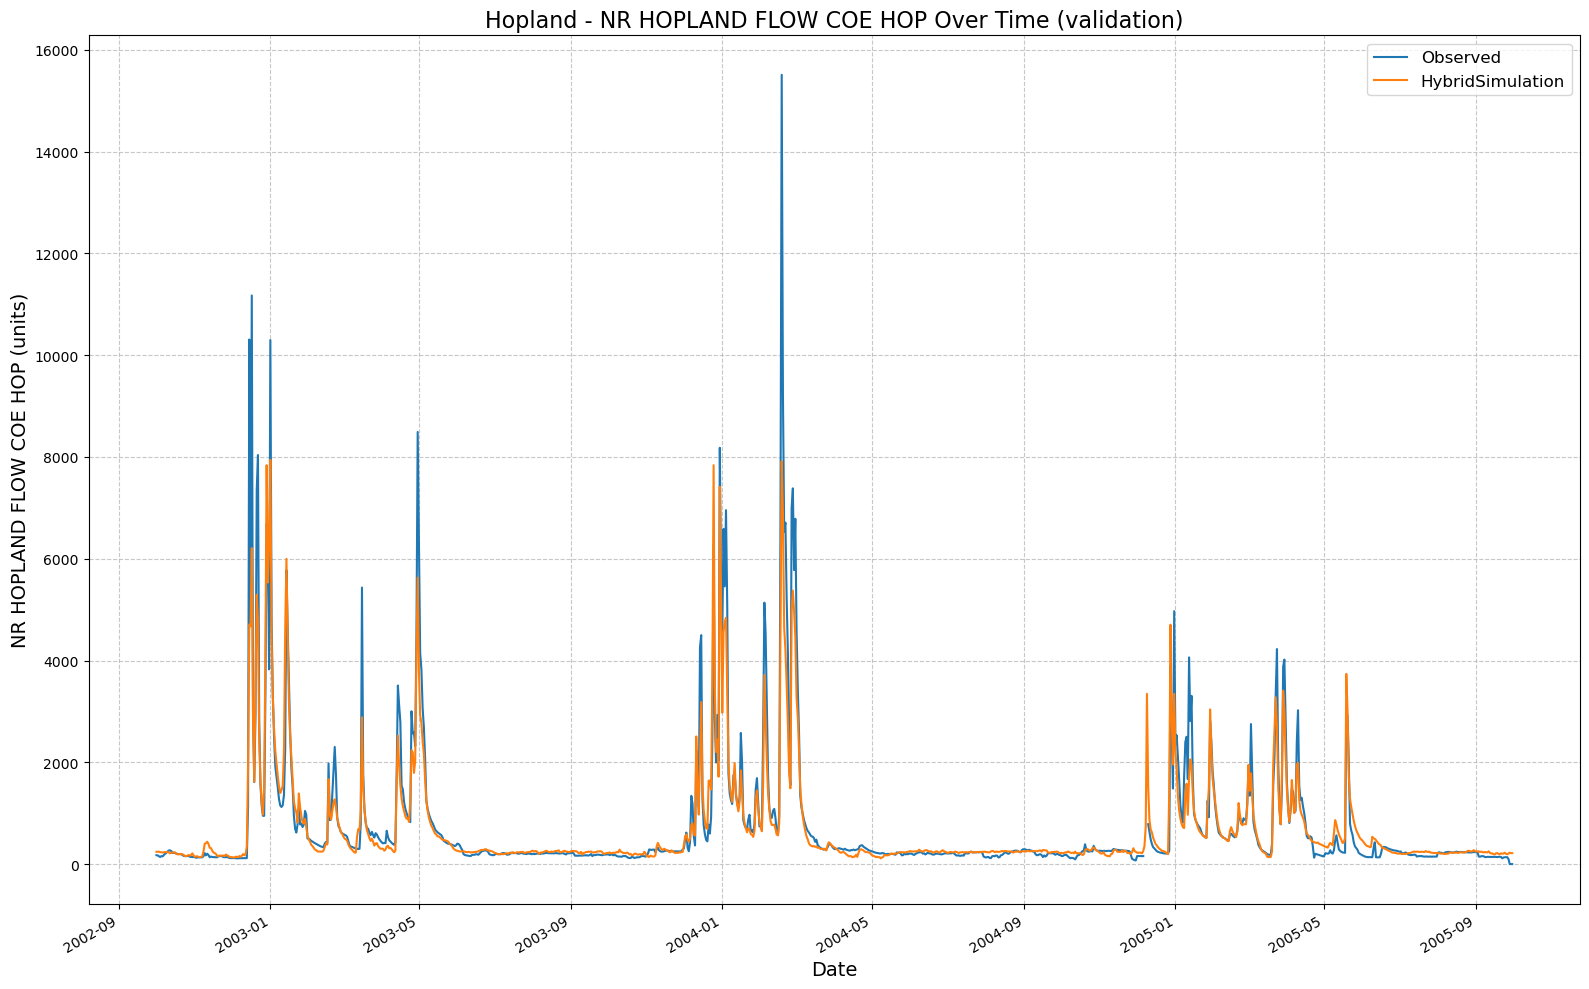

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212140/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:22:37,558: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212237/output.log initialized.
2025-02-12 21:22:37,558: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212237
2025-02-12 21:22:37,559: ### Run configurations for testing_run
2025-02-12 21:22:37,559: experiment_name: testing_run
2025-02-12 21:22:37,559: train_basin_file: hopland
2025-02-12 21:22:37,560: validation_basin_file: hopland
2025-02-12 21:22:37,560: test_basin_file: hopland
2025-02-12 21:22:37,560: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:22:37,561: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.54it/s]
2025-02-12 21:22:37,739: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1296.94it/s]
2025-02-12 21:22:37,745: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.34it/s, Loss: 0.0000]
2025-02-12 21:22:39,633: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  5.74it/s, Loss: 0.0000]
2025-02-12 21:22:41,551: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.20it/s, Loss: 0.0000]
2025-02-12 21:22:43,329: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s, Loss: 0.0000]
2025-02-12 21:22:45,020: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.59it/s, Loss: 0.0000]
2025-02-12 21:22:46,690: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]
2025-02-12 21:23:08,086: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212237/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:23:08,087: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212237/validation/model_epoch016/validation_results.p
got predictions


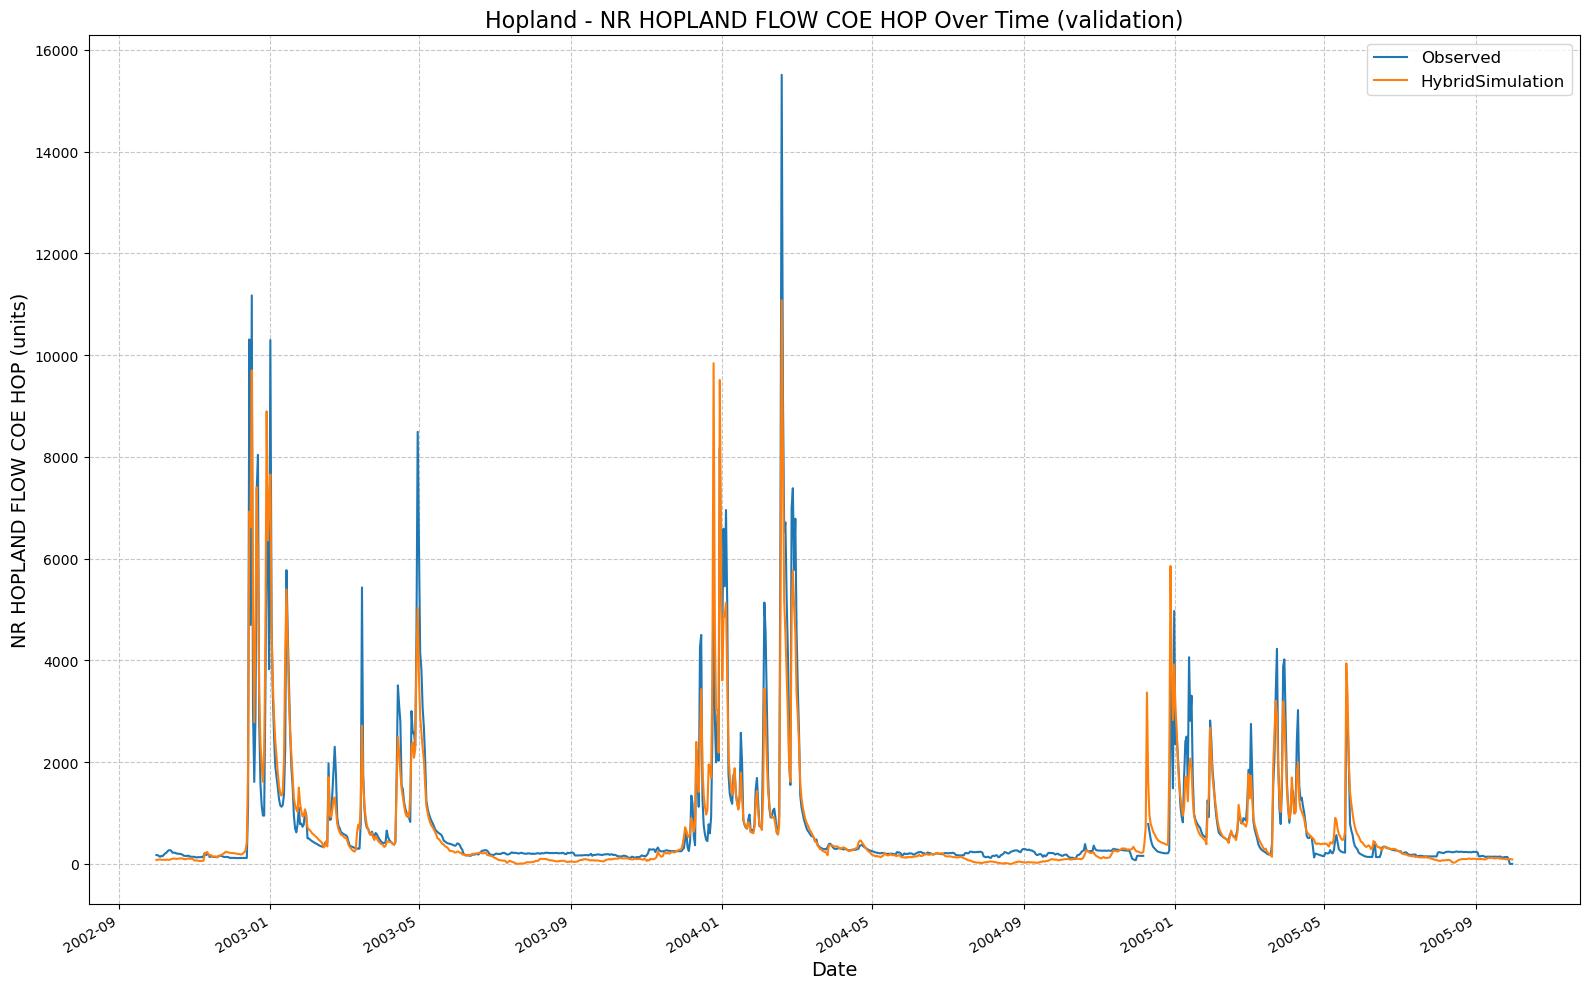

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212237/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:23:08,274: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212308/output.log initialized.
2025-02-12 21:23:08,274: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212308
2025-02-12 21:23:08,274: ### Run configurations for testing_run
2025-02-12 21:23:08,275: experiment_name: testing_run
2025-02-12 21:23:08,275: train_basin_file: hopland
2025-02-12 21:23:08,275: validation_basin_file: hopland
2025-02-12 21:23:08,275: test_basin_file: hopland
2025-02-12 21:23:08,276: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:23:08,276: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  7.43it/s]
2025-02-12 21:23:08,429: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1461.94it/s]
2025-02-12 21:23:08,436: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.42it/s, Loss: 0.0000]
2025-02-12 21:23:10,286: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.21it/s, Loss: 0.0000]
2025-02-12 21:23:12,060: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.49it/s, Loss: 0.0000]
2025-02-12 21:23:13,758: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s, Loss: 0.0000]
2025-02-12 21:23:15,452: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.44it/s, Loss: 0.0000]
2025-02-12 21:23:17,163: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]
2025-02-12 21:24:07,938: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212308/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:24:07,939: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212308/validation/model_epoch032/validation_results.p
got predictions


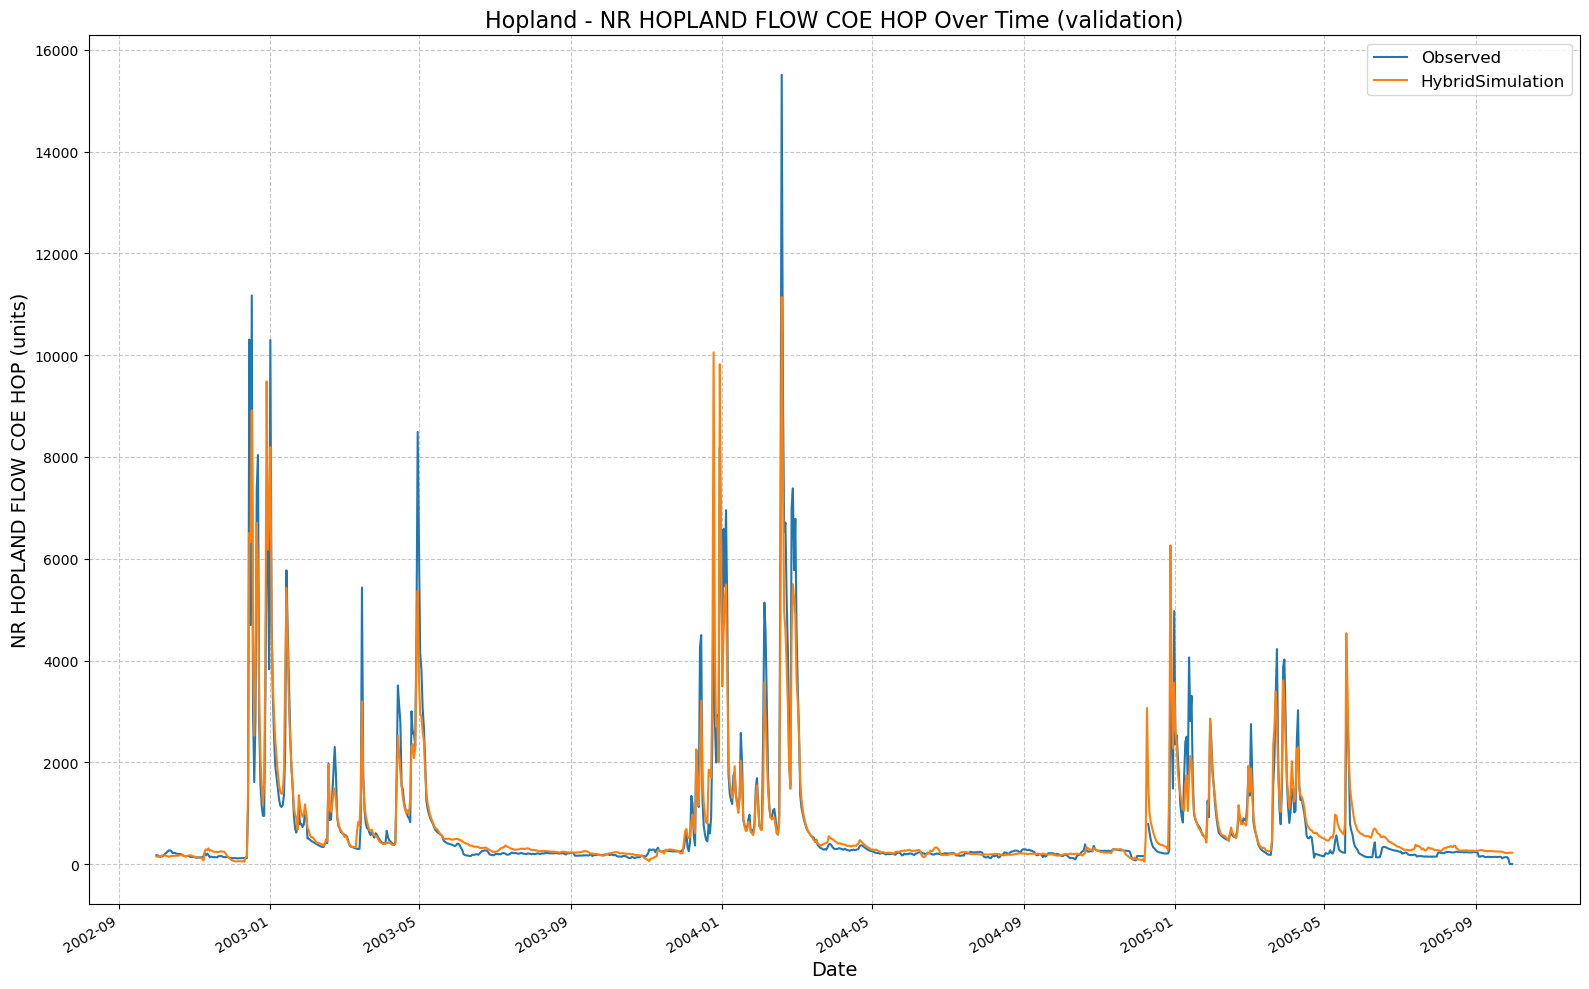

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212308/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:24:08,121: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212408/output.log initialized.
2025-02-12 21:24:08,121: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212408
2025-02-12 21:24:08,122: ### Run configurations for testing_run
2025-02-12 21:24:08,122: experiment_name: testing_run
2025-02-12 21:24:08,122: train_basin_file: hopland
2025-02-12 21:24:08,123: validation_basin_file: hopland
2025-02-12 21:24:08,123: test_basin_file: hopland
2025-02-12 21:24:08,123: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:24:08,124: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.91it/s]
2025-02-12 21:24:08,288: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1052.79it/s]
2025-02-12 21:24:08,295: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.33it/s, Loss: 0.0000]
2025-02-12 21:24:10,155: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.31it/s, Loss: 0.0000]
2025-02-12 21:24:11,900: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  5.99it/s, Loss: 0.0000]
2025-02-12 21:24:13,738: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.46it/s, Loss: 0.0000]
2025-02-12 21:24:15,444: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.46it/s, Loss: 0.0000]
2025-02-12 21:24:17,149: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]
2025-02-12 21:24:38,450: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212408/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:24:38,450: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212408/validation/model_epoch016/validation_results.p
got predictions


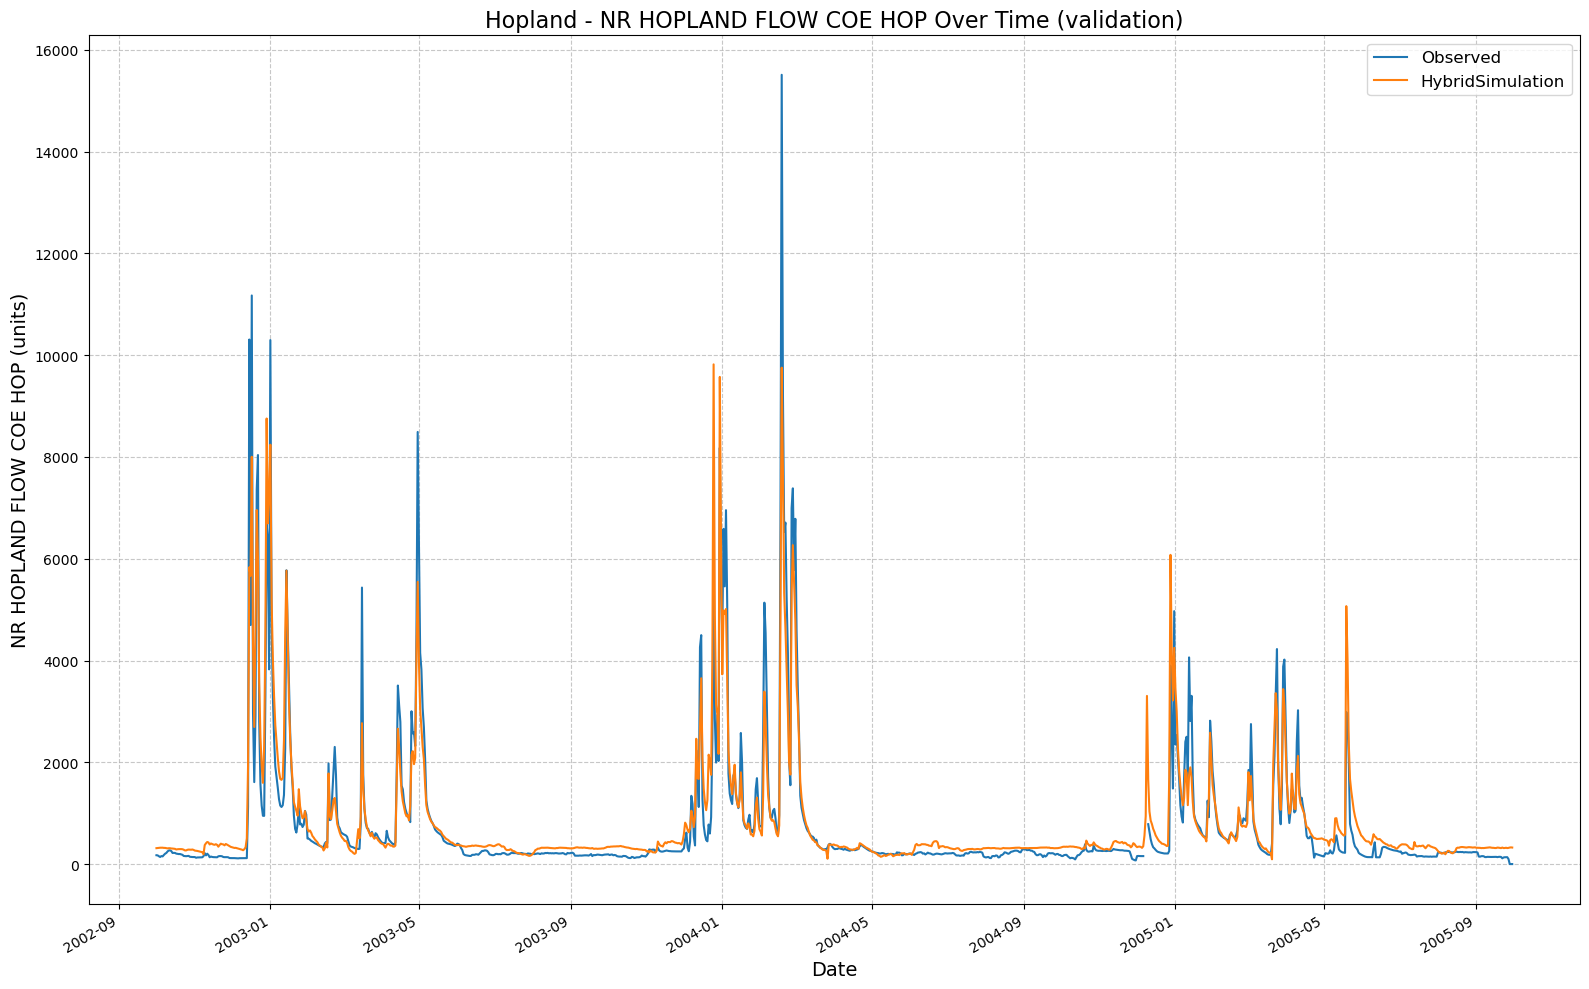

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212408/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:24:38,632: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212438/output.log initialized.
2025-02-12 21:24:38,633: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212438
2025-02-12 21:24:38,633: ### Run configurations for testing_run
2025-02-12 21:24:38,634: experiment_name: testing_run
2025-02-12 21:24:38,634: train_basin_file: hopland
2025-02-12 21:24:38,635: validation_basin_file: hopland
2025-02-12 21:24:38,635: test_basin_file: hopland
2025-02-12 21:24:38,636: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:24:38,636: train_end_date: 2002-09-30 00:00:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
2025-02-12 21:24:38,808: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 978.61it/s]
2025-02-12 21:24:38,815: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.39it/s, Loss: 0.0000]
2025-02-12 21:24:40,686: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.26it/s, Loss: 0.0000]
2025-02-12 21:24:42,446: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.55it/s, Loss: 0.0000]
2025-02-12 21:24:44,128: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.53it/s, Loss: 0.0000]
2025-02-12 21:24:45,814: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.55it/s, Loss: 0.0000]
2025-02-12 21:24:47,495: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]
2025-02-12 21:25:38,168: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212438/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:25:38,169: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212438/validation/model_epoch032/validation_results.p
got predictions


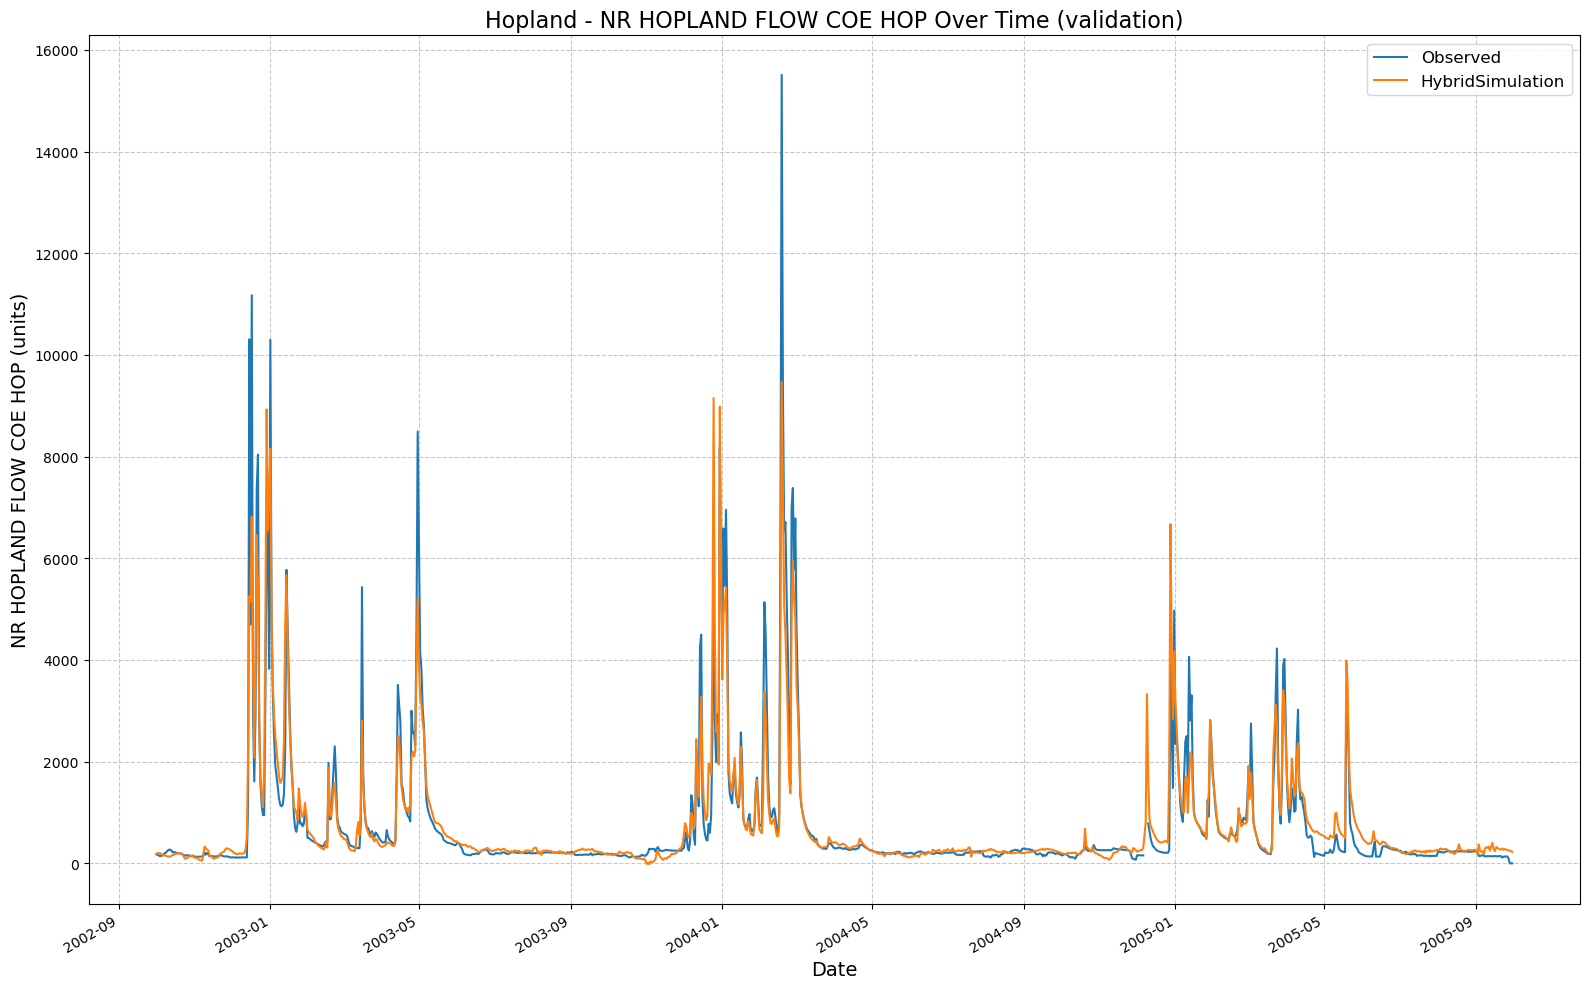

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212438/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:25:38,355: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212538/output.log initialized.
2025-02-12 21:25:38,355: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212538
2025-02-12 21:25:38,355: ### Run configurations for testing_run
2025-02-12 21:25:38,355: experiment_name: testing_run
2025-02-12 21:25:38,356: train_basin_file: hopland
2025-02-12 21:25:38,356: validation_basin_file: hopland
2025-02-12 21:25:38,356: test_basin_file: hopland
2025-02-12 21:25:38,356: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:25:38,357: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.52it/s]
2025-02-12 21:25:38,533: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 956.08it/s]
2025-02-12 21:25:38,540: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s, Loss: 0.0000]
2025-02-12 21:25:42,310: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.15it/s, Loss: 0.0000]
2025-02-12 21:25:45,804: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.22it/s, Loss: 0.0000]
2025-02-12 21:25:49,223: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.21it/s, Loss: 0.0000]
2025-02-12 21:25:52,650: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s, Loss: 0.0000]
2025-02-12 21:25:56,154: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]
2025-02-12 21:26:37,674: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212538/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:26:37,674: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212538/validation/model_epoch016/validation_results.p
got predictions


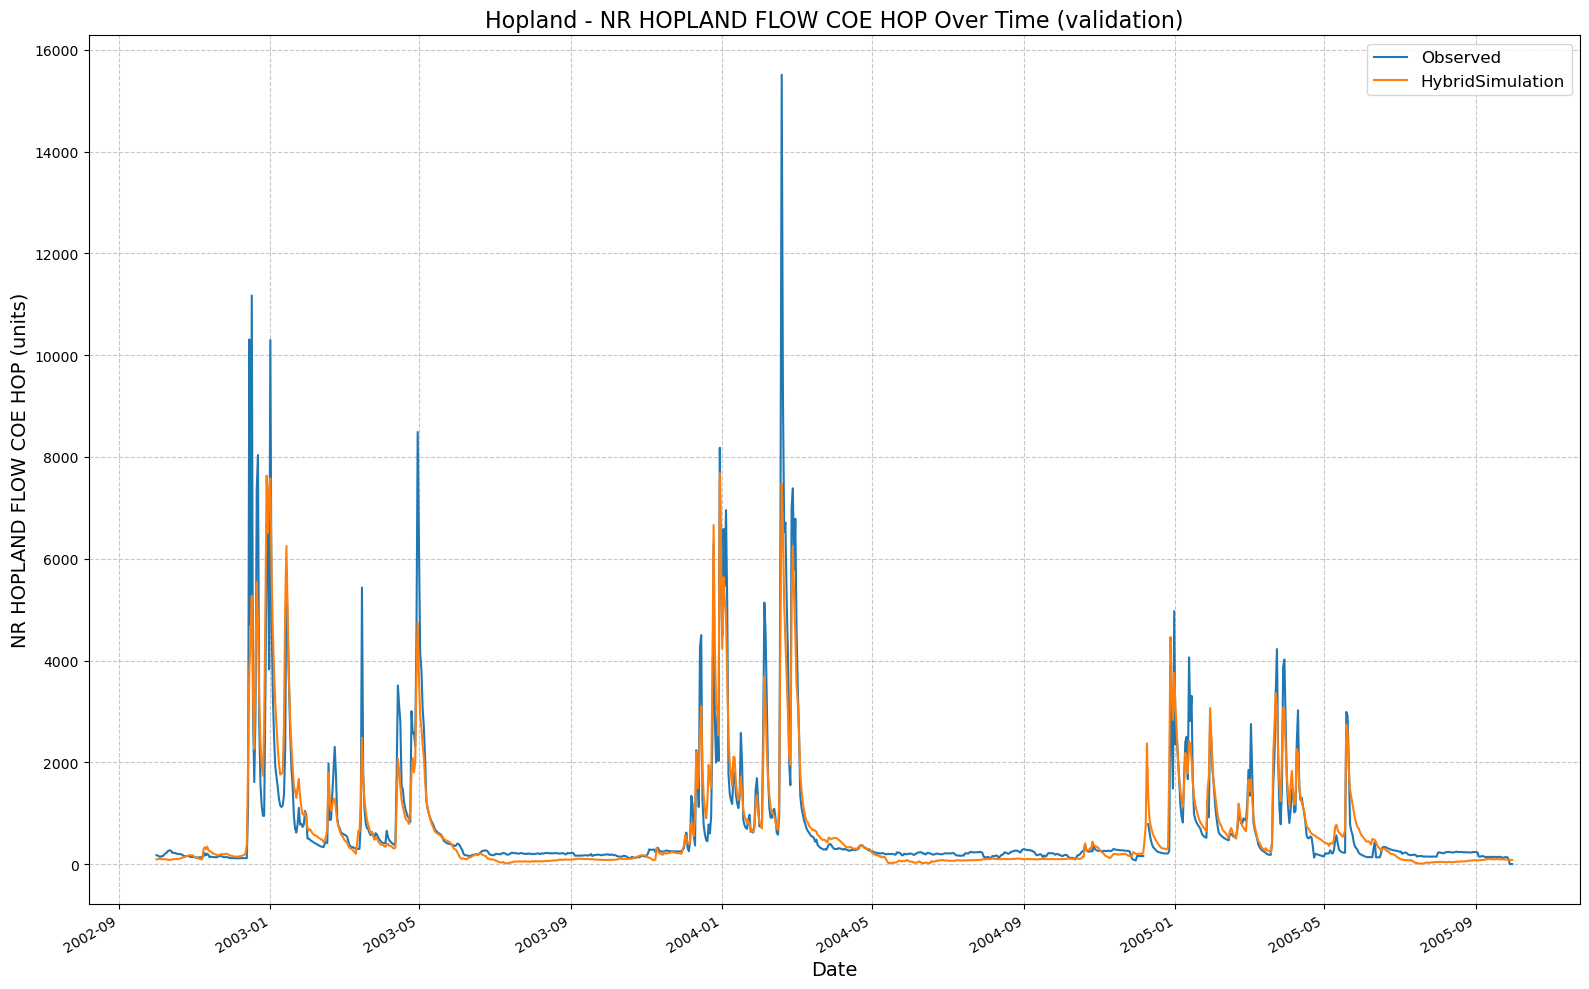

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212538/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:26:37,859: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212637/output.log initialized.
2025-02-12 21:26:37,860: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212637
2025-02-12 21:26:37,860: ### Run configurations for testing_run
2025-02-12 21:26:37,861: experiment_name: testing_run
2025-02-12 21:26:37,861: train_basin_file: hopland
2025-02-12 21:26:37,861: validation_basin_file: hopland
2025-02-12 21:26:37,862: test_basin_file: hopland
2025-02-12 21:26:37,862: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:26:37,862: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.99it/s]
2025-02-12 21:26:38,053: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1151.02it/s]
2025-02-12 21:26:38,061: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s, Loss: 0.0000]
2025-02-12 21:26:41,789: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  2.88it/s, Loss: 0.0000]
2025-02-12 21:26:45,616: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.22it/s, Loss: 0.0000]
2025-02-12 21:26:49,039: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.22it/s, Loss: 0.0000]
2025-02-12 21:26:52,461: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s, Loss: 0.0000]
2025-02-12 21:26:56,026: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
2025-02-12 21:28:35,798: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212637/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:28:35,798: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212637/validation/model_epoch032/validation_results.p
got predictions


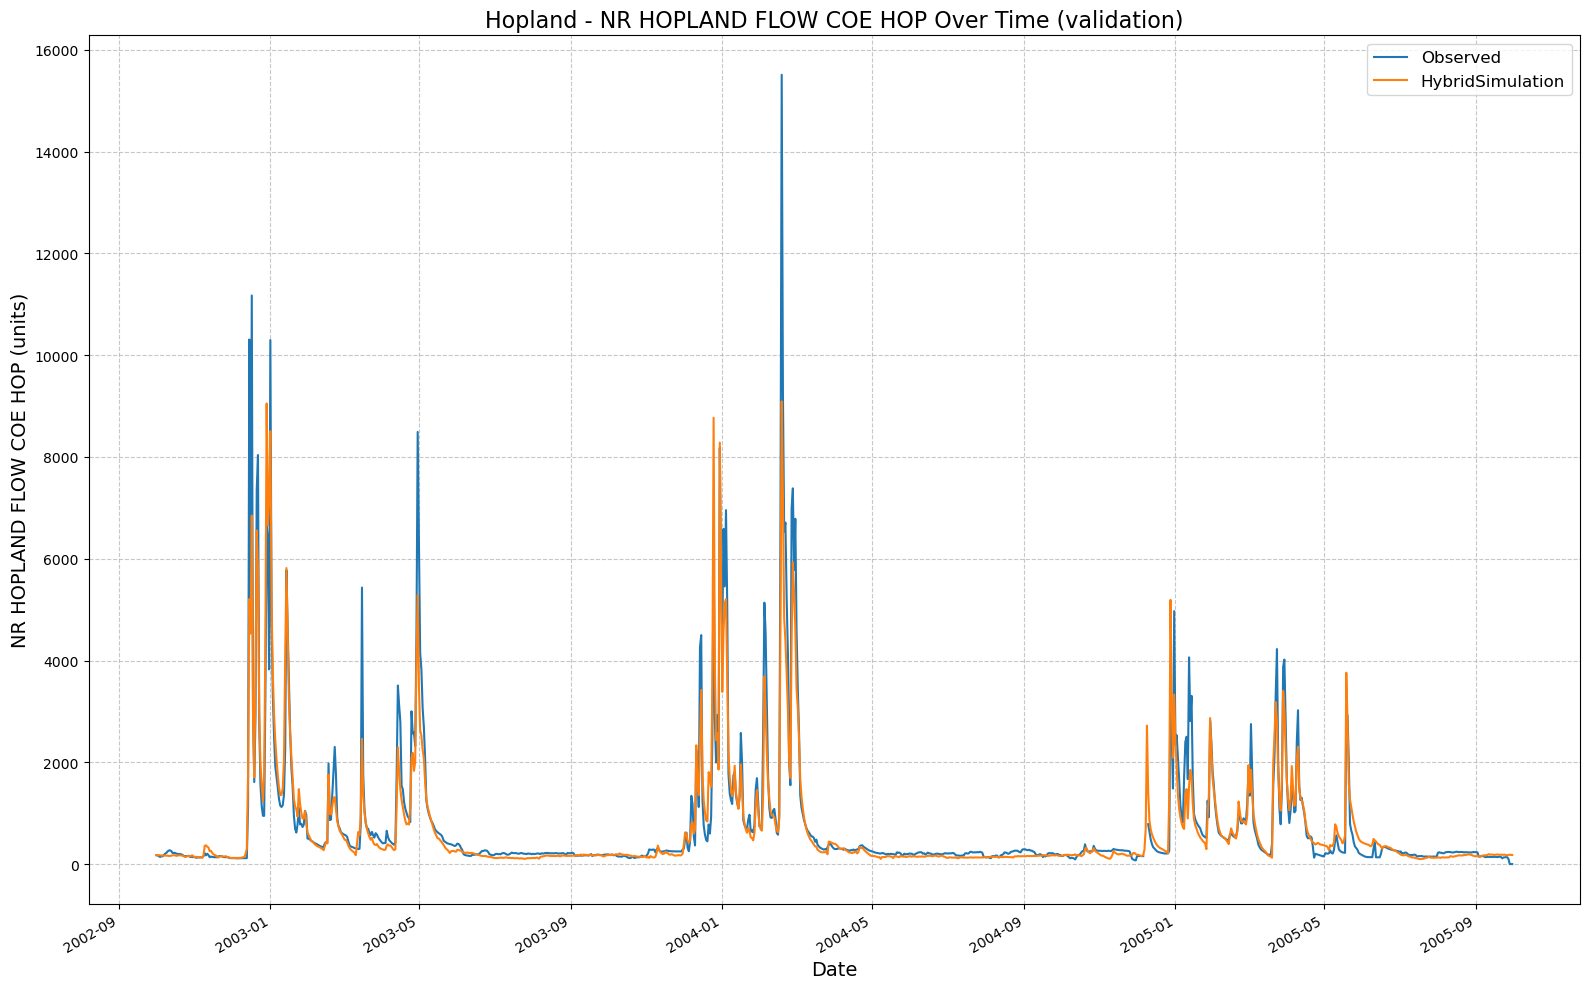

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212637/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:28:35,985: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212835/output.log initialized.
2025-02-12 21:28:35,985: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212835
2025-02-12 21:28:35,986: ### Run configurations for testing_run
2025-02-12 21:28:35,986: experiment_name: testing_run
2025-02-12 21:28:35,986: train_basin_file: hopland
2025-02-12 21:28:35,987: validation_basin_file: hopland
2025-02-12 21:28:35,987: test_basin_file: hopland
2025-02-12 21:28:35,987: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:28:35,988: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.67it/s]
2025-02-12 21:28:36,161: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1007.28it/s]
2025-02-12 21:28:36,168: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s, Loss: 0.0000]
2025-02-12 21:28:39,899: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.04it/s, Loss: 0.0000]
2025-02-12 21:28:43,522: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.18it/s, Loss: 0.0000]
2025-02-12 21:28:46,986: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.25it/s, Loss: 0.0000]
2025-02-12 21:28:50,371: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s, Loss: 0.0000]
2025-02-12 21:28:53,907: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]
2025-02-12 21:29:35,390: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212835/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:29:35,391: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212835/validation/model_epoch016/validation_results.p
got predictions


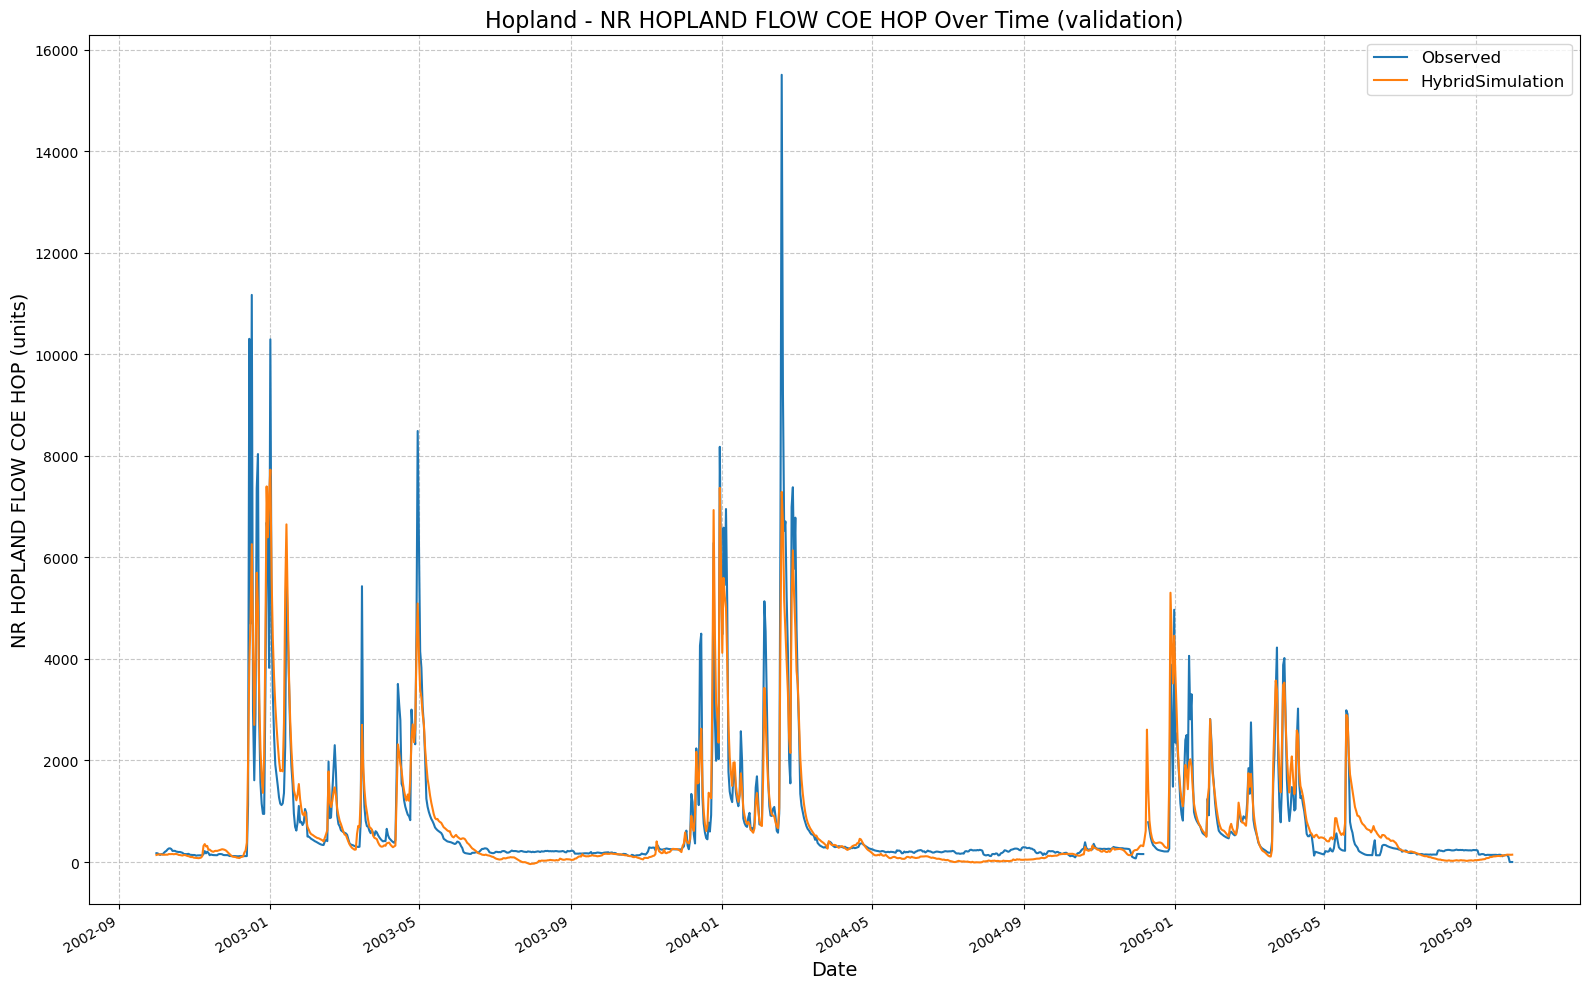

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212835/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:29:35,578: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212935/output.log initialized.
2025-02-12 21:29:35,578: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212935
2025-02-12 21:29:35,578: ### Run configurations for testing_run
2025-02-12 21:29:35,579: experiment_name: testing_run
2025-02-12 21:29:35,579: train_basin_file: hopland
2025-02-12 21:29:35,580: validation_basin_file: hopland
2025-02-12 21:29:35,580: test_basin_file: hopland
2025-02-12 21:29:35,580: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:29:35,581: train_end_date: 2002-09-30 00:00:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.75it/s]
2025-02-12 21:29:35,758: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 543.51it/s]
2025-02-12 21:29:35,770: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  3.13it/s, Loss: 0.0000]
2025-02-12 21:29:39,417: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.03it/s, Loss: 0.0000]
2025-02-12 21:29:43,051: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s, Loss: 0.0000]
2025-02-12 21:29:46,558: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.27it/s, Loss: 0.0000]
2025-02-12 21:29:49,929: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.21it/s, Loss: 0.0000]
2025-02-12 21:29:53,356: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]
2025-02-12 21:31:32,890: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212935/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:31:32,891: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212935/validation/model_epoch032/validation_results.p
got predictions


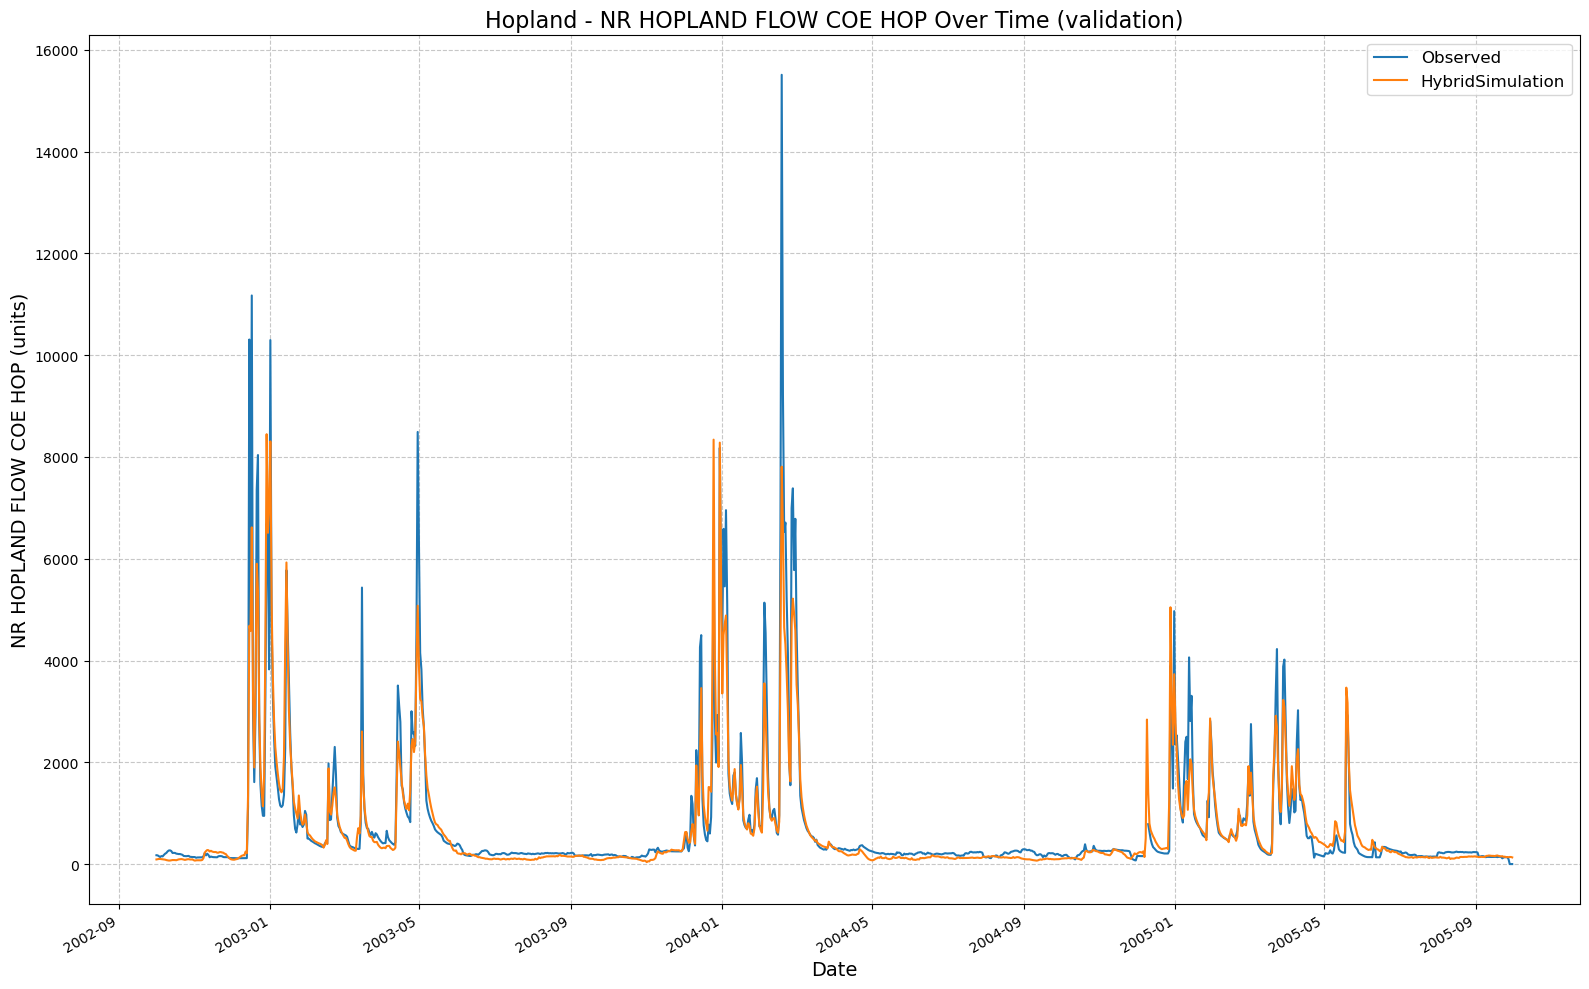

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_212935/results_output_validation.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [9]:
for (hs, seq, nl, ep) in itertools.product(
        hyperparam_space["hidden_size"],
        hyperparam_space["seq_length"],
        hyperparam_space["num_layers"],
        hyperparam_space["epochs"]
):
    hp = {
        "hidden_size": hs,
        "seq_length": seq,
        "num_layers": nl,
        "epochs": ep,
        "output_dropout": fixed_dropout,
        "save_weights_every": ep
    }
    print(f"Physics: {hp}")
    trainer = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=hp,
        input_features=features_with_physics,
        physics_informed=True,
        physics_data_file=path_to_physics_data,
        hourly=False,
        extend_train_period=False,
        gpu=-1
    )
    trainer.train()
    csv_path, metrics_dict = trainer.results()
    row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
    for k, v in metrics_dict.items():
        row_data[k] = v
    physics_results.append(row_data)

In [10]:
df_no_physics = pd.DataFrame(no_physics_results)
df_physics = pd.DataFrame(physics_results)
df_no_physics.sort_values(by="NSE", ascending=False, inplace=True)
df_physics.sort_values(by="NSE", ascending=False, inplace=True)
df_no_physics.reset_index(drop=True, inplace=True)
df_physics.reset_index(drop=True, inplace=True)

In [ ]:
best_no_phys = df_no_physics.iloc[0].to_dict()
best_phys = df_physics.iloc[0].to_dict()

In [11]:
df_no_physics

hidden_size  seq_length  num_layers  epochs  output_dropout       NSE  \
0           128          90           2      16             0.4  0.821965   
1           256          90           2      32             0.4  0.817292   
2           128         180           2      32             0.4  0.817171   
3           256          90           1      32             0.4  0.813280   
4           256         180           1      16             0.4  0.806720   
5           256         180           2      32             0.4  0.806700   
6           128         180           1      32             0.4  0.802393   
7           128          90           1      32             0.4  0.795030   
8           256          90           2      16             0.4  0.791527   
9           128          90           2      32             0.4  0.790008   
10          256         180           2      16             0.4  0.788893   
11          128          90           1      16             0.4  0.788656   
12          256         180           1      32             0.4  0.785465   
13          256          90           1      16             0.4  0.767887   
14          128         180           1      16             0.4  0.763774   
15          128         180           2      16             0.4  0.730853   

             MSE        RMSE       KGE  Alpha-NSE  Beta-KGE  Beta-NSE  \
0   342196.59375  584.975721  0.765173   0.782653  0.969151 -0.016793   
1   351178.71875  592.603340  0.768230   0.841364  0.857004 -0.077840   
2   351411.18750  592.799450  0.735369   0.758841  0.927253 -0.039600   
3   358889.81250  599.074129  0.748219   0.782535  0.908084 -0.050034   
4   371497.65625  609.506076  0.742458   0.758479  0.990814 -0.005000   
5   371536.28125  609.537760  0.755641   0.777862  0.956761 -0.023537   
6   379813.81250  616.290364  0.679066   0.713701  0.877682 -0.066583   
7   393967.84375  627.668578  0.738874   0.773749  0.913966 -0.046832   
8   400699.78125  633.008516  0.734066   0.753562  1.019860  0.010811   
9   403620.09375  635.311021  0.749738   0.777258  0.950300 -0.027054   
10  405762.25000  636.994702  0.677118   0.700747  0.913693 -0.046981   
11  406218.90625  637.353047  0.732804   0.754818  0.964013 -0.019590   
12  412352.28125  642.146620  0.708801   0.754017  0.879883 -0.065385   
13  446137.93750  667.935579  0.673818   0.759352  0.807835 -0.104604   
14  454043.09375  673.827199  0.657437   0.691956  0.887882 -0.061031   
15  517319.37500  719.249174  0.582108   0.605056  0.898136 -0.055450   

    Pearson-r        FHV        FMS        FLV  Peak-Timing  Peak-MAPE  
0    0.916621 -24.062209  11.139416        NaN          0.4  44.845800  
1    0.909977 -14.843009  23.887289        NaN          0.4  41.056433  
2    0.918887 -25.877813  18.749640  -0.441135          0.4  45.774450  
3    0.912511 -19.288611   9.665216        NaN          0.2  45.131302  
4    0.911057 -25.552315 -16.579490  -2.114355          1.0  45.744257  
5    0.907824 -21.728845   7.551166  -1.004083          0.4  50.538363  
6    0.922092 -28.181410 -16.558660   0.509449          0.4  47.624555  
7    0.902043 -20.293339  -7.194136        NaN          0.4  46.107769  
8    0.902049 -21.789935 -18.144995        NaN          1.0  53.360491  
9    0.897302 -20.261151  17.211013        NaN          0.2  53.032236  
10   0.914843 -32.775262 -11.248731  90.282675          0.4  51.290464  
11   0.900078 -26.714194  -1.692218        NaN          0.6  46.255670  
12   0.900697 -25.071892   9.657740   1.698541          0.4  51.935983  
13   0.892501 -24.784760 -15.146745        NaN          1.0  50.258965  
14   0.900565 -34.039700  17.860886   0.701940          0.4  55.805540  
15   0.909024 -37.887016 -33.176071  -2.219556          0.4  58.579149

In [12]:
df_physics

hidden_size  seq_length  num_layers  epochs  output_dropout       NSE  \
0           256          90           1      32             0.4  0.888364   
1           256          90           1      16             0.4  0.883774   
2           256         180           1      32             0.4  0.871517   
3           128          90           1      16             0.4  0.868566   
4           256          90           2      32             0.4  0.867229   
5           128          90           1      32             0.4  0.866274   
6           256          90           2      16             0.4  0.865456   
7           128          90           2      16             0.4  0.864167   
8           128         180           1      32             0.4  0.861525   
9           256         180           2      32             0.4  0.859499   
10          128         180           2      32             0.4  0.858142   
11          128          90           2      32             0.4  0.855976   
12          128         180           1      16             0.4  0.839924   
13          128         180           2      16             0.4  0.839003   
14          256         180           2      16             0.4  0.835374   
15          256         180           1      16             0.4  0.829586   

              MSE        RMSE       KGE  Alpha-NSE  Beta-KGE  Beta-NSE  \
0   214571.750000  463.218901  0.858910   0.873060  1.028549  0.015540   
1   223394.921875  472.646720  0.861032   0.897871  0.925721 -0.040434   
2   246954.421875  496.945089  0.796475   0.828659  0.906885 -0.050687   
3   252625.796875  502.618938  0.849861   0.882161  1.065673  0.035749   
4   255195.281250  505.168567  0.836638   0.850311  1.008401  0.004573   
5   257031.375000  506.982618  0.820459   0.832372  1.010615  0.005778   
6   258604.000000  508.531218  0.828473   0.868612  1.088194  0.048008   
7   261080.296875  510.960172  0.844204   0.862927  0.969914 -0.016377   
8   266158.156250  515.905181  0.767687   0.775277  0.984025 -0.008696   
9   270053.281250  519.666510  0.780419   0.812916  0.903980 -0.052268   
10  272661.250000  522.169752  0.745451   0.763787  0.922841 -0.042001   
11  276825.000000  526.141616  0.845558   0.880060  0.935625 -0.035042   
12  307677.250000  554.686623  0.705023   0.832412  1.232537  0.126581   
13  309447.187500  556.279774  0.760915   0.773092  0.973987 -0.014160   
14  316422.781250  562.514694  0.828377   0.852719  0.972418 -0.015014   
15  327547.593750  572.317738  0.798433   0.828339  0.936389 -0.034626   

    Pearson-r        FHV        FMS        FLV  Peak-Timing  Peak-MAPE  
0    0.945433 -12.039239  -3.153336        NaN          0.0  27.473774  
1    0.941996 -11.972786  49.088120        NaN          0.0  27.521102  
2    0.941739 -18.138567  19.898786  98.158001          0.0  34.885473  
3    0.934099 -15.058196  10.368030        NaN          0.0  24.229298  
4    0.935116 -16.740744  -0.592038        NaN          0.0  30.862908  
5    0.936571 -16.904551  -4.814530        NaN          0.0  29.720170  
6    0.933816 -13.139328 -23.655476        NaN          0.0  28.878164  
7    0.932338 -18.139143  58.374320        NaN          0.0  30.804617  
8    0.943312 -24.225824 -11.071048  96.184844          0.0  36.891932  
9    0.936790 -22.506242  39.513938  94.736004          0.0  36.171904  
10   0.944816 -25.584218  -9.433028  96.974624          0.0  38.777859  
11   0.927044 -15.250152  52.636647        NaN          0.2  28.613129  
12   0.930343 -19.792868 -25.657968  97.600115          0.2  28.907015  
13   0.929304 -25.736371 -15.095095  -2.528457          0.2  36.222653  
14   0.916321 -22.406675  52.802505  11.687585          0.2  32.865715  
15   0.915646 -23.363826  64.818035  89.306198          0.2  40.132933

2025-02-12 23:06:09,626: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230609/output.log initialized.
2025-02-12 23:06:09,628: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230609
2025-02-12 23:06:09,628: ### Run configurations for testing_run
2025-02-12 23:06:09,628: experiment_name: testing_run
2025-02-12 23:06:09,629: train_basin_file: hopland
2025-02-12 23:06:09,629: validation_basin_file: hopland
2025-02-12 23:06:09,630: test_basin_file: hopland
2025-02-12 23:06:09,630: train_start_date: 1994-10-01 00:00:00
2025-02-12 23:06:09,630: train_end_date: 2005-09-30 00:00:00
2025-02-12 23:06:09,631: validation_start_date: 2002-10-01 00:00:00
2025-02-12 23:06:09,631: validation_end_date: 2005-09-30 00:00:00
2025-02-12 23:06:09,631: test_start_date: 2005-10-01 00:00:00
2025-02-12 23:06:09,632: test_end_date: 2009-09-29 00:00:00
2025-02-12 23:06:09,632: dev

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]
2025-02-12 23:06:40,620: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230609/validation/model_epoch016/validation_metrics.csv
2025-02-12 23:06:40,621: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230609/validation/model_epoch016/validation_results.p
2025-02-12 23:06:40,630: Using the model weights from /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230609/model_epoch016.pt


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]
2025-02-12 23:06:41,076: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230609/test/model_epoch016/test_metrics.csv
2025-02-12 23:06:41,076: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230609/test/model_epoch016/test_results.p
got predictions


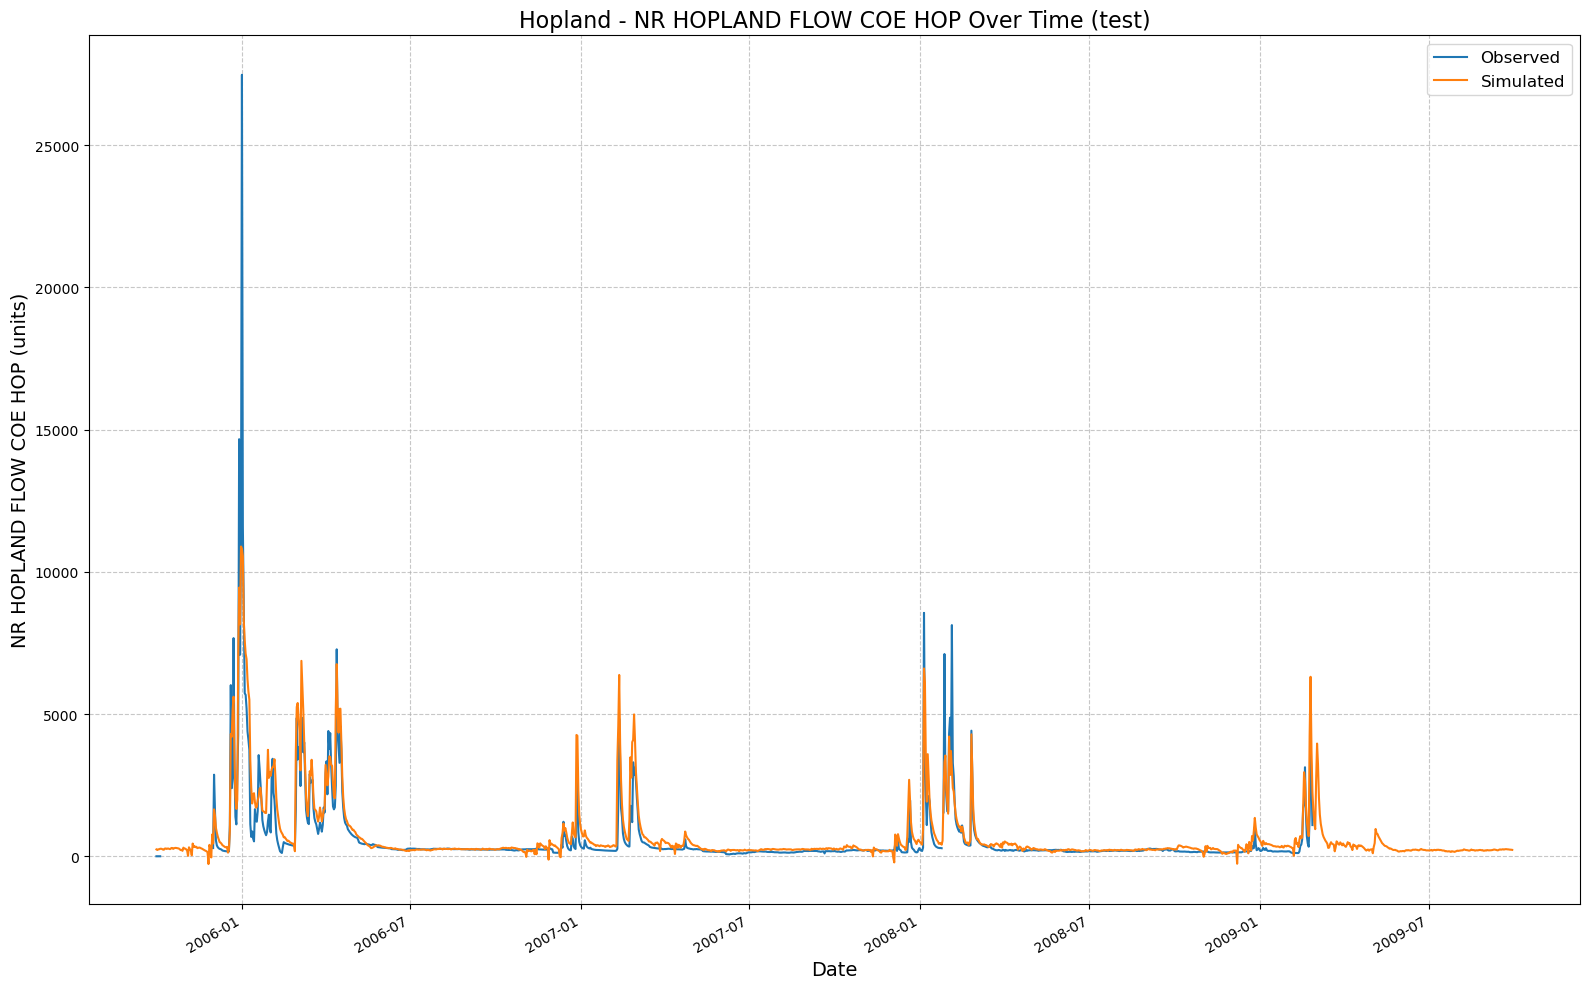

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230609/results_output_test.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.7415004372596741,
 'MSE': 511612.34375,
 'RMSE': 715.270818466684,
 'KGE': 0.6974706666757888,
 'Alpha-NSE': 0.9056776544063008,
 'Beta-KGE': 1.2558132410049438,
 'Beta-NSE': 0.11016545819231767,
 'Pearson-r': 0.8689012648045721,
 'FHV': -7.101736962795258,
 'FMS': 30.687176735125814,
 'FLV': -28.41194007631388,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 38.086700439453125}

In [13]:
best_no_physics_params = {
    "epochs": int(best_no_phys["epochs"]),
    "hidden_size": int(best_no_phys["hidden_size"]),
    "seq_length": int(best_no_phys["seq_length"]),
    "num_layers": int(best_no_phys["num_layers"]),
    "output_dropout": fixed_dropout,
}

hoplandNoPhysicsExtBest = UCB_trainer(
    path_to_csv_folder=path_to_csv,
    yaml_path=path_to_yaml,  
    hyperparams=best_no_physics_params,
    input_features=None,
    physics_informed=False,
    physics_data_file=None,
    hourly=False,
    extend_train_period=True, 
    gpu=-1
)

hoplandNoPhysicsExtBest.train()
hopland_no_physics_test_csv, hopland_no_physics_test_metrics = hoplandNoPhysicsExtBest.results('test')
hopland_no_physics_test_metrics

2025-02-12 23:07:10,425: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230710/output.log initialized.
2025-02-12 23:07:10,426: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230710
2025-02-12 23:07:10,426: ### Run configurations for testing_run
2025-02-12 23:07:10,426: experiment_name: testing_run
2025-02-12 23:07:10,427: train_basin_file: hopland
2025-02-12 23:07:10,427: validation_basin_file: hopland
2025-02-12 23:07:10,428: test_basin_file: hopland
2025-02-12 23:07:10,428: train_start_date: 1994-10-01 00:00:00
2025-02-12 23:07:10,428: train_end_date: 2005-09-30 00:00:00
2025-02-12 23:07:10,429: validation_start_date: 2002-10-01 00:00:00
2025-02-12 23:07:10,429: validation_end_date: 2005-09-30 00:00:00
2025-02-12 23:07:10,431: test_start_date: 2005-10-01 00:00:00
2025-02-12 23:07:10,431: test_end_date: 2009-09-29 00:00:00
2025-02-12 23:07:10,432: dev

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]
2025-02-12 23:09:12,320: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230710/validation/model_epoch032/validation_metrics.csv
2025-02-12 23:09:12,320: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230710/validation/model_epoch032/validation_results.p
2025-02-12 23:09:12,336: Using the model weights from /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230710/model_epoch032.pt


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]
2025-02-12 23:09:13,181: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230710/test/model_epoch032/test_metrics.csv
2025-02-12 23:09:13,182: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230710/test/model_epoch032/test_results.p
got predictions


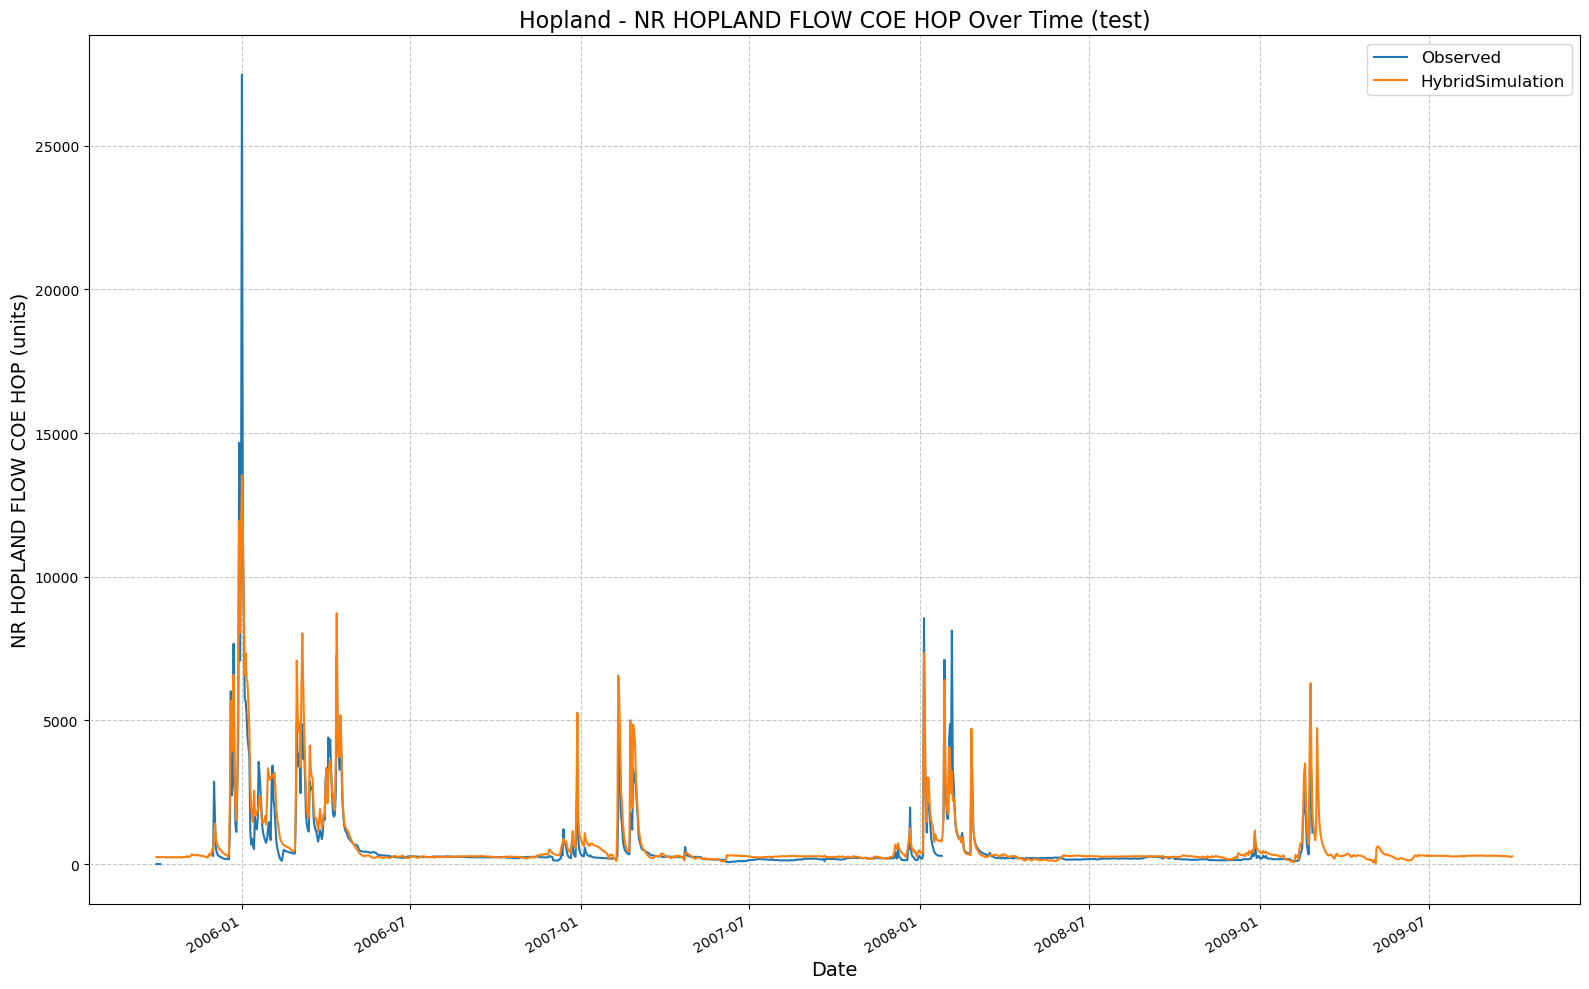

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_230710/results_output_test.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/hopland_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.8137456178665161,
 'MSE': 368627.46875,
 'RMSE': 607.1469910573551,
 'KGE': 0.7563939563746104,
 'Alpha-NSE': 0.9517382802399432,
 'Beta-KGE': 1.2203866243362427,
 'Beta-NSE': 0.0949090841568093,
 'Pearson-r': 0.9081063293240887,
 'FHV': 0.4397186916321516,
 'FMS': 17.539275066882748,
 'FLV': 91.62529940211037,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 34.40757751464844}

In [14]:
best_physics_params = {
    "epochs": int(best_phys["epochs"]),
    "hidden_size": int(best_phys["hidden_size"]),
    "seq_length": int(best_phys["seq_length"]),
    "num_layers": int(best_phys["num_layers"]),
    "output_dropout": fixed_dropout,
}

hoplandPhysicsExtBest = UCB_trainer(
    path_to_csv_folder=path_to_csv,
    yaml_path=path_to_yaml,  
    hyperparams=best_physics_params,
    input_features=features_with_physics,
    physics_informed=True,
    physics_data_file=path_to_physics_data,
    hourly=False,
    extend_train_period=True,
    gpu=-1
)

hoplandPhysicsExtBest.train()
hopland_physics_test_csv, hopland_physics_test_metrics = hoplandPhysicsExtBest.results('test')
hopland_physics_test_metrics

In [ ]:
fancyCombinedPlot(lstm_results=hopland_no_physics_test_csv, lstmPhysics_results= hopland_physics_test_csv, HMS_results=path_to_physics_data, title='Hopland Basin Daily Model Comparison', fName = "hopland_daily_metrics.csv")